In [1]:
import pandas as pd
import geopandas as gp
import pdv_functions as pdv
import numpy as np
import re
from collections import Counter
from matplotlib.lines import Line2D
import os

# VEST PA 2020
---

## VEST Documentation

### Sources

#### Election Results
Election results primarily from individual county precinct reports as processed via OpenElections (https://github.com/openelections/openelections-data-pa/). Precinct data was corrected with canvass reports for the following counties: Cambria, Crawford, Forest, Juniata, York. The Susquehanna County precinct results were provided by the Pennsylvania Secretary of State Bureau of Elections.

Due to court orders involving ballots that were segregated until legal challenges were resolved the certified results from nearly all counties differ from the official results certified by the state. State courts ordered segregated ballots to be included for state offices whereas federal courts ordered that they be excluded for federal offices. As the orders were issued after the county certification deadline these votes were added to the state offices for 57 counties that did not include them in precinct reports and removed from federal offices in 10 counties that did include them in precinct reports. The precinct results in the VEST shapefiles are those that were certified by the respective counties.

Federal ballots in Philadelphia were reported at the citywide level. These are distributed by candidate to precincts based on their share of the precinct-level reported vote.

#### Shapefiles
Precinct shapefiles primarily from the U.S. Census Bureau's 2020 Redistricting Data Program Phase 2 release. The shapefiles from Delaware County and the City of Pittsburgh are from the respective jurisdictions. Precinct numbers were corrected to match the 2020 voter file in the following locales: Allegheny (Elizabeth, Pittsburgh W12), Blair (Greenfield), Bradford (Athens), Greene (Dunkard, Monongahela), Monroe (Smithfield), Montgomery (Hatfield), Northampton (Bethlehem Twp), Perry (Toboyne), Union (Union), Washington (New Eagle, Somerset), York (Fairview). VTD codes in Philadelphia were edited to match the city ward/division numbers.

The U.S. Census Bureau's final VTD release was used for all of Crawford, Jefferson, McKean, Northumberland. A number of precincts statewide were also replaced with the final VTDs due to updated municipal boundaries. 

The final VTD release was also used for precincts that were altered before the 2020 general election in the following locales: Adams (Reading), Allegheny (Marshall), Armstrong (Ford City), Cambria (N Cambria), Centre (State College), Chester (Valley N), Clearfield (Bradford), Franklin (Montgomery, Peters), Greene (Dunkard), Lebanon (Cornwall, Jackson, N Cornwall, S Londonderry, Swatara), Luzerne (Butler, Dallas, Fairview, Kingston Boro, Kingston Twp, Rice, Salem, Sugarloaf, Wright), Lycoming (Williamsport), Mercer (S Pymatuning), Monroe (Jackson), Montgomery (New Hanover, Upper Merion), Northampton (Allen), Philadelphia (Wards 2, 5, 8, 18, 21, 40, 63), Venango (Cranberry), Washington (Amwell, Cecil, Donegal, N Strabane, S Strabane); Westmoreland: (Murrysville), York (W Manheim).

Precinct boundaries throughout the state were edited to match voter assignments in the PA Secretary of State voter file from the 2020 election cycle. While some edits reflect official updates to wards or divisions the majority involve voters incorrectly assigned to voting districts by the counties. As such the VEST shapefile endeavors to reflect the de facto precinct boundaries and these often differ from the official voting district boundaries in some cases quite drastically. Wherever possible edits were made using census boundaries or alternatively using the parcel shapefiles from the respective counties. 

### Processing
In certain areas voter assignments appear so erratic that it is impractical to place all voters within their assigned precinct. These areas were edited so as to place as many voters as possible within their assigned precinct without displacing a greater number from their assigned precinct. In general, municipal boundaries were retained except where a significant number of voters were misassigned to the wrong municipality. In cases where the odd/even split was incorrectly reversed for precinct boundary streets the official boundary was retained. All such cases involved near equal number of voters swapped between voting districts.

The following revisions were made to the base shapefiles to match the de facto 2020 precinct boundaries consistent with the voter file. Individual precincts are noted in cases of splits or merges. Due to the sheer number of edits boundary adjustments are listed at the borough/township level. There may be as many as two dozen individual precincts that were revised within a given municipality.

In some cases the edited precinct boundaries noted below match those of the final Census VTD release.

- Adams: Adjust Cumberland, Franklin
- Allegheny: Split Pittsburgh W5 11/17; Merge Pittsburgh W16 9/11/12; Align McCandless with municipal boundary; Adjust Baldwin, Bethel Park, Braddock, Brentwood, Castle Shannon, Clairton, Collier, Coraopolis, Crescent, Dormont, Dravosburg, Duquesne, E Deer, E McKeesport, E Pittsburgh, Elizabeth, Emsworth, Forward, Glassport, Hampton, Harmar, Ingram, Jefferson Hills, Kennedy, Leet, Liberty, Marshall, McCandless, McKees Rocks, McKeesport, Monroeville, Moon, Mount Lebanon, Munhall, N Fayette, N Versailles, O'Hara, Oakdale, Penn Hills, Pine, Pittsburgh (nearly all wards), Pleasant Hills, Reserve, Richland, Ross, Scott, Sewickley, Shaler, S Fayette, S Park, Stowe, Swissvale, Upper St. Clair, W Deer, W Homestead, W Mifflin, W View, Whitaker, Whitehall, Wilkins, Wilkinsburg
- Armstrong: Align Dayton, Elderton, Ford City, Kittanning, N Apollo with municipal boundaries; Adjust Cowanshannock, Ford City, Gilpin, Kiskiminetas, Kittanning, Manor, N Buffalo, Parks, Parker City, S Buffalo
- Beaver: Adjust Aliquippa, Ambridge, Baden, Beaver, Brighton, Center, Chippewa, Conway, Economy, Franklin, Hanover, Harmony, Hopewell, Midland, Monaca, N Sewickley
- Bedford: Adjust Bedford Boro, Bedford Twp
- Berks: Adjust Cumru, Douglass, Earl, Oley, Maxatawny, Robeson, Sinking Spring, Union
- Blair: Merge Tunnelhill/Allegheny Twp 4; Align Altoona, Bellwood, Duncansville, Hollidaysburg, Newry, Roaring Spring, Tyrone, Williamsburg with municipal boundaries; Adjust Allegheny, Altoona, Antis, Frankstown, Freedom, Greenfield, Huston, Juniata, N Woodbury, Logan, Snyder, Tyrone Boro, Tyrone Twp
- Bucks: Align Sellersville, Tullytown with municipal boundaries; Adjust Bensalem, Bristol Boro, Bristol Twp, Buckingham, Doylestown Twp, Falls, Hilltown, Lower Makefield N, Lower Southampton E, Middletown, Milford, Morrissville, Newtown Twp, Northampton, Solebury Lower, Solebury, Springfield, Tinicum, Upper Makefield, Upper Southampton E, Warminster, Warrington, W Rockhill
- Butler: Align Butler Twp, Valencia with municipal boundaries; Adjust Adams, Buffalo, Butler Boro, Butler Twp, Center, Cranberry E, Cranberry W, Jackson, Jefferson, Zelienople
- Cambria: Align Daisytown, Sankertown, W Taylor, Wilmore with municipal boundaries; Adjust Cambria, Conemaugh, Croyle, E Taylor, Ebensburg, E Carroll, Geistown, Jackson, Johnstown W8, W17, W20, Lower Yoder, Northern Cambria, Portage Boro, Portage Twp, Richland, Southmont, Stonycreek, Summerhill, Susquehanna, Upper Yoder, W Carroll, Westmont
- Cameron: Adjust Emporium, Shippen
- Carbon: Adjust Jim Thorpe, Kidder, Mahoning, New Mahoning, Summit Hill
- Centre: Merge Ferguson Northeast 1 A/B; Adjust Benner,  Ferguson, Patton
- Chester: Adjust Birmingham, E Bradford S, E Fallowfield, E Goshen, E Marlborough, Easttown, N Coventry, Spring City, Tredyffrin M, Uwchlan, Valley N, W Bradford, W Caln, W Goshen N, W Goshen S, Westtown
- Clarion: Align Shippenville with municipal boundary; Merge Emlenton/Richland; Adjust Clarion, Highland, Farmington, Knox
- Clearfield: Adjust Decatur, Woodward
- Columbia: Merge Ashland/Conyngham; Adjust Orange, Scott West
- Crawford: Align Cochranton, Richmond with municipal boundaries
- Cumberland: Split Lower Allen 1/Annex; Align Carlisle, E Pennsboro, Hampton, Lemoyne, Lower Allen, Mechanisburg, Middlesex, Mount Holly Springs, N Middleton, Shiremanstown, Silver Spring, W Pennsboro, Wormsleysburg with municipal boundaries
- Dauphin: Align Middletown with municipal boundary; Adjust Derry, Harrisburg W1, W7, W8, W9, Hummelstown, Lower Paxton, Lykens, Middletown
- Delaware: Adjust Chester, Concord, Darby Boro, Darby Twp, Haverford, Marple, Nether Providence, Newtown, Radnor, Ridley, Sharon Hill, Thornbury, Tinicum, Trainer, Upper Chichester, Upper Darby, Upper Providence
- Elk: Adjust Johnsonburg, Ridgeway Boro, Ridgeway Twp, St. Marys
- Erie: Adjust Erie W1, W4, W5, W6, Greene, Lawrence Park, McKean, Millcreek, North East
- Fayette: Align Dunbar, Uniontown with municipal boundaries; Adjust Brownsville, Bullskin, Dunbar, Georges, German, Luzerne, N Union, Redstone
- Franklin: Align Mercersburg with municipal boundary; Adjust Antrim, Fannett, Greene, Guilford, Hamilton, Metal, Peters, Quincy, St. Thomas, Southampton, Washington
- Fulton: Align McConnellsburg with municipal boundary
- Greene: Align Carmichaels with municipal boundary; Adjust Cumberland, Franklin, Jefferson, Lipencott, Mather, Morgan Chart, Monongahela, Nemacolin
- Huntingdon: Adjust Huntingdon, Mount Union
- Jefferson: Adjust Punxsutawney
- Lackawanna: Adjust Archbald, Blakely, Carbondale, Clarks Summit, Dickson City, Dunmore, Fell, Jermyn, Jessup, Mayfield, Moosic, Old Forge, Olyphant, Scranton W1, W2, W3, W6, W7, W10, W12, W13, W14, W15, W16, W19, W20, W23, S Abington, Taylor, Throop
- Lancaster: Split Lancaster 7-8 CV/LS; Adjust Brecknock, Columbia, E Hempfield, E Lampeter, E Petersburg, Elizabethtown, Ephrata, Lancaster W4, W8, Lititz, Manheim, Manor, Millersville, Mt Joy Twp, New Holland, Penn, Providence, Rapho, Warwick, W Cocalico, W Donegal, W Hempfield
- Lawrence: Adjust Neshannock
- Lebanon: Adjust Cornwall, S Lebanon
- Lehigh: Split Allentown Ward 17-4/Parkland; Adjust Lower Macungie, Salisbury
- Luzerne: Align Avoca, Pittston with municipal boundaries; Adjust Butler, Exeter, Fairview, Foster, Hanover, Hazle, Jenkins, Larksville, Lehman, Nanticoke, Plains, Smoyersville, W Wyoming, Wilkes-Barre
- Lycoming: Adjust Jersey Shore
- McKean: Align Foster with municipal boundary; Adjust Bradford, Bradford Twp, Foster, Hamlin, Keating
- Mercer: Adjust Delaware, Fredonia, Greenville, Hempfield, Hermitage, Sharon, Sharpsville, W Salem
- Mifflin: Split Brown Reedsville/Church Hill
- Monroe: Align E Stroudsburg with municipal boundary; Adjust E Stroudsburg, Smithfield, Stroud, Tobyhanna
- Montgomery: Adjust Abington, Lower Merion, Pottstown, Springfield, Upper Moreland, Upper Merion, Upper Providence
- Northampton: Align Glendon, Walnutport with municipal boundaries; Adjust Bangor, Bethlehem W2, W3, W4, W7, W9, W14, W15, Bethlehem Twp, Bushkill, Easton, Forks, Hanover, Hellertown, Lehigh, Lower Mt Bethel, Lower Saucon, Moore, Nazareth, Palmer, Plainfield, Upper Mt Bethel, Washington, Williams
- Northumberland: Adjust Coal, Kulpmont, Marion Heights, Milton, Mount Carmel, Northumberland, Point, Ralpho, Shamokin, Sunbury, Upper Augusta
- Philadelphia: Adjust 1-19/21, 5-3/19, 7-2/3/17, 7-6/7, 9-5/6, 15-7/10, 17-20/26, 20-5/10, 21-1/15, 21-40/41, 22-21/26, 23-11/12, 25-9/17, 25-4/7/12, 25-10/12, 26-1/2, 27-7/8, 27-18/20/21, 28-1/8, 29-9/11, 29-10/17, 30-14/15, 31-5/6, 38-11/17, 38-13/20, 38-15/19, 40-12/18/19, 40-17/19, 42-3/4/7, 44-8/14, 50-3/12, 50-11/27, 52-2/6/9, 52-3/8, 57-6/7, 57-10/27, 57-17/28, 58-6/12, 62-5/19, 65-4/7, 65-11/16, 66-22/34
- Pike: Adjust Matamoras
- Potter: Adjust Galeton
- Schuylkill: Adjust Coaldale, N Manheim, Norwegian, Porter, Pottsville
- Somerset: Align New Centerville with municipal boundary; Adjust Conemaugh, Jefferson, Middlecreek, Paint, Somerset Boro
- Susquehanna: Adjust Montrose; Lanesboro, Susquehanna Depot
- Tioga: Adjust Delmar, Wellsboro
- Union: Adjust Buffalo, White Deer
- Venango: Adjust Cornplanter, Cranberry, Franklin, Oil City, Sugarcreek
- Warren: Adjust Conewango
- Washington: Align Allenport, Beallsville, Burgettstown, Canonsburg, Carroll, Charleroi, Claysville, Elco, Finleyville, Houston, Long Branch, McDonald, Midway, Monongahela, Speers, Twilight with municipal boundaries; Adjust Amwell, Bentleyville, California, Canonsburg, Canton, Cecil, Centerville, Chartiers, Donora, Fallowfield, Hanover, Independence, Mount Pleasant, N Franklin, N Strabane, Peters, Robinson, Smith, Somerset, S Franklin, Union Washington, W Brownsville
- Wayne: Adjust Honesdale
- Westmoreland: Align Greensburg with municipal boundary; Adjust Allegheny, Arnold, Bell, Derry, E Huntingdon, Fairfield, Greensburg W1-W8, Hempfield, Jeannette, Latrobe, Ligonier, Lower Burrell, Monessen, Mount Pleasant, New Kensington, N Belle Vernon, N Huntingdon, Penn, Rostraver, St. Clair, Scottdale, Sewickley, S Greensburg, S Huntingdon, Trafford, Upper Burrell, Unity, Vandergrift, Washington, Youngwood
- York: Align E Prospect, Goldsboro, Jefferson, Manchester, Monaghan, Wellsville, York with municipal boundaries; Adjust Chanceford, Codorus, Conewago, Dover, Fairview, Hanover, Jackson, Lower Windsor, New Freedom, Newberry, N Codorus, Penn, Red Lion, Shrewsbury, Spring Garden, Springbettsbury, W Manchester, Windsor Boro, Windsor Twp, Wrightsville, York Twp, York W5, W6, W15




### Races

G20PREDBID - Joseph R. Biden (Democratic Party)  
G20PRERTRU - Donald J. Trump (Republican Party)  
G20PRELJOR - Jo Jorgensen (Libertarian Party)  

G20ATGDSHA - Joshua D. Shapiro (Democratic Party)  
G20ATGRHEI - Heather S. Heidelbaugh (Republican Party)  
G20ATGLWAS - Daniel Wassmer (Libertarian Party)  
G20ATGGWEI - Richard L. Weiss (Green Party)  

G20AUDDAHM - Nilofer Nina Ahmad (Democratic Party)  
G20AUDRDEF - Timothy L. DeFoor (Republican Party)  
G20AUDLMOO - Jennifer Lynn Moore (Libertarian Party)  
G20AUDGFAI - Olivia Faison (Green Party)  

G20TREDTOR - Joseph M. Torsella (Democratic Party)  
G20TRERGAR - Stacy L. Garrity (Republican Party)  
G20TRELSOL - Joseph P. Soloski (Libertarian Party)  
G20TREGRUN - Timothy Runkle (Green Party)  

## Election Result Processing

### Load in VEST file

In [2]:
vest_pa_20 = gp.read_file("./raw-from-source/VEST/pa_2020/pa_2020.shp")

## Load Election Results

In [3]:
open_elections_results = pd.read_csv("./raw-from-source/openelections-data-pa-master/2020/20201103__pa__general__precinct.csv")

/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_11008/947709454.py:1: DtypeWarning: Columns (3,6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  open_elections_results = pd.read_csv("./raw-from-source/openelections-data-pa-master/2020/20201103__pa__general__precinct.csv")


### Use Slightly Different Files for Cambria, Juniata, and Wyoming

Note: There are minor issues with the combined Open Elections file that do not appear in the county-by-county files

In [4]:
cambria_oe = open_elections_results[open_elections_results["county"]=="Cambria"]
juniata_oe = open_elections_results[open_elections_results["county"]=="Juniata"]

not_cambria_juniata_wyoming_oe = open_elections_results[~open_elections_results["county"].isin(["Cambria", "Juniata", "Wyoming"])]

cambria_specific = pd.read_csv('./raw-from-source/openelections-data-pa-master/2020/counties/20201103__pa__general__cambria__precinct.csv')
juniata_specific = pd.read_csv("./raw-from-source/openelections-data-pa-master/2020/counties/20201103__pa__general__juniata__precinct_ph_modified.csv")
wyoming_specific = pd.read_csv("./raw-from-source/openelections-data-pa-master/2020/counties/20201103__pa__general__wyoming__precinct_ph_modified.csv")

wyoming_specific['absentee'] = 0
wyoming_specific['election_day'] = wyoming_specific['votes']

juniata_specific['absentee'] = 0
juniata_specific['election_day'] = juniata_specific['votes']

cambria_specific['absentee'] = 0
cambria_specific['election_day'] = cambria_specific['votes']

cambria_specific = cambria_specific[list(not_cambria_juniata_wyoming_oe.columns)]
juniata_specific = juniata_specific[list(not_cambria_juniata_wyoming_oe.columns)]
wyoming_specific = wyoming_specific[list(not_cambria_juniata_wyoming_oe.columns)]

cambria_specific.loc[cambria_specific["office"]=="Write-ins","office"]="President"

open_elections_results = pd.concat([not_cambria_juniata_wyoming_oe, cambria_specific, juniata_specific, wyoming_specific])
open_elections_results.reset_index(inplace = True, drop = True)

## Filter Election Results

In [5]:
all_oe_races = open_elections_results[open_elections_results["office"].isin(['President', 'Attorney General', 'Auditor General',
       'State Treasurer', 'U.S. House', 'State Senate', 'State House'])]

all_oe_races.loc[:,"candidate"] = all_oe_races["candidate"].str.upper()

bad_cand_list = ['OVERVOTE', 'OVER VOTES', 'UNDER VOTES', 'NOT ASSIGNED','UNASSIGNED WRITE-INS','REJECTED WRITE-INS','UNRESOLVED WRITE-IN', 'SCATTER WRITE-IN','WRITE-IN: BLANK', 'WRITE-IN: INVALID', 'WRITE-IN: SCATTERED']

all_oe_races = all_oe_races[~all_oe_races["candidate"].isin(bad_cand_list)]

/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_11008/1840499053.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_oe_races.loc[:,"candidate"] = all_oe_races["candidate"].str.upper()


In [6]:
fips_dict = pdv.get_fips_dict("Pennsylvania")

### Add a County FIPs Column

In [7]:
all_oe_races.loc[:,"FIPS"] = all_oe_races.loc[:,"county"].map(fips_dict).fillna("N/a")

/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_11008/653435612.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_oe_races.loc[:,"FIPS"] = all_oe_races.loc[:,"county"].map(fips_dict).fillna("N/a")


### Clean Candidate / Party Names

In [8]:
# Make an "N/A" party
all_oe_races.loc[all_oe_races["party"].isna(), "party"] = "N/A"

# Fix an issue with Green party candidates not having a party
all_oe_races.loc[(all_oe_races["FIPS"]=="127")&(all_oe_races["office"]=="Attorney General")&(all_oe_races["candidate"].str.contains("WEISS")),'party']="GRE"

# Cast the party string to uppercase
all_oe_races["party"] = all_oe_races["party"].str.upper()

# Make a dictionary of party name changes
party_change_dict = {'DEMOCRATIC':'DEM',
 'REPUBLICAN':"REP",
 'LIBERTARIAN':"LIB",
 'GREEN':"GRN",
 'LBT':'LIB',
 'LBN':'LIB',
 'GRE':'GRN'}

# Make the party name changes
all_oe_races["party"] = all_oe_races["party"].map(party_change_dict).fillna(all_oe_races["party"])

/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_11008/3534849911.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_oe_races["party"] = all_oe_races["party"].str.upper()
/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_11008/3534849911.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_oe_races["party"] = all_oe_races["party"].map(party_change_dict).fillna(all_oe_races["party"])


## Fix Various Issues

In [9]:
def change_district(district_val):
    if pd.isnull(district_val):
        return "N/A"
    else:
        if type(district_val) == str:
            district_val = district_val.replace("TH","")
            district_val = district_val.replace("ND","")
            district_val = district_val.replace("RD","")
        return str(int(district_val))

In [10]:
all_oe_races.loc[all_oe_races["precinct"].str.contains("SPRINGFIELD 3W 2P"),"precinct"] = 'SPRINGFIELD 3W 2P'
all_oe_races.loc[(all_oe_races['district']=="15TH"), 'district'] = '12'


In [11]:
all_oe_races.loc[all_oe_races["candidate"].isin(['GUY RESCHENTHALER', 'BILL MARX'])&(all_oe_races["district"]==6.0)]["county"].unique()

array(['Washington'], dtype=object)

In [12]:
all_oe_races.loc[all_oe_races["candidate"].isin(['GUY RESCHENTHALER', 'BILL MARX']), 'district'] = '14'
all_oe_races.loc[(all_oe_races["office"]=="State Senate")&(all_oe_races["county"]=="Armstrong"),"district"] = 41
all_oe_races.loc[(all_oe_races["office"]=="State Senate")&(all_oe_races["county"]=="Schuylkill"),"district"] = 29
all_oe_races.loc[(all_oe_races["office"]=="U.S. House")&(all_oe_races["county"]=="Armstrong"),"district"] = 15
all_oe_races.loc[all_oe_races["candidate"]=='BRIAN FITZGERALD', 'candidate'] = "BRIAN FITZPATRICK"

In [13]:
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="Apollo Borough"),"district"]= 55
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="Applewood Borough"),"district"]= 60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="Bethel Township"),"district"]= 60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="Boggs Township"),"district"]= 60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="Burrell Township"),"district"]= 60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="Cadogan Township"),"district"]= 60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="East Franklin Township-North"),"district"]= 60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="East Franklin Township-East"),"district"]= 60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="East Franklin Township-West"),"district"]= 60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="Ford City Borough-1st Ward"),"district"]= 60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="Ford City Borough-2nd Ward"),"district"]= 60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="Ford Cliff Borough"),"district"]= 60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="Freeport Borough"),"district"]= 60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="Gilpin Township-#1"),"district"]= 60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="Gilpin Township-#2"),"district"]= 60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="Kiski Township-Horrell"),"district"]=60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="Kiski Township-Orchard Hills North"),"district"]=60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="Kiski Township-Orchard Hills South"),"district"]=60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="Kiski Township-Spring Church"),"district"]=60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="Kittanning Borough-1st Ward"),"district"]= 60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="Kittanning Borough-2nd Ward"),"district"]= 60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="Kittanning Borough-3rd Ward"),"district"]= 60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="Kittanning Borough-4th Ward"),"district"]= 60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="Kittanning Township"),"district"]= 60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="Leechburg Borough-#1"),"district"]= 55
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="Manor Township-North"),"district"]= 60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="Manor Township-South #1"),"district"]= 60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="Manor Township-South #2"),"district"]= 60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="Manorville Borough"),"district"]= 60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="North Apollo Borough"),"district"]= 60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="North Buffalo Township-East"),"district"]= 60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="North Buffalo Township-West"),"district"]= 60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="Parks Township-Kepple Hill"),"district"]= 55
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="Parks Township-West"),"district"]= 55
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="Rayburn Township"),"district"]= 60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="South Bend Township"),"district"]= 60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="South Buffalo Township-East"),"district"]=60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="South Buffalo Township-West"),"district"]=60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="Valley Township"),"district"]=60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="West Franklin Township"),"district"]=60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="West Kittanning Borough"),"district"]=60

In [14]:
all_oe_races.loc[(all_oe_races["FIPS"]=="109")&(all_oe_races["office"]=="President")&(all_oe_races["party"]=="LIB"), "candidate"] = 'JO JORGENSEN' 

In [15]:
all_oe_races["district"] = all_oe_races["district"].apply(lambda x: change_district(x))

/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_11008/3605200240.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_oe_races["district"] = all_oe_races["district"].apply(lambda x: change_district(x))


In [16]:
all_oe_races["office"] = np.where(all_oe_races["district"]=="N/A", all_oe_races["office"], all_oe_races["office"]+"-"+all_oe_races["district"])

/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_11008/773427007.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_oe_races["office"] = np.where(all_oe_races["district"]=="N/A", all_oe_races["office"], all_oe_races["office"]+"-"+all_oe_races["district"])


## Clean Candidate Names

In [17]:
cand_change_dict = {'WRITE-INS':'WRITE-IN',
    'ANTHONY J DELORETO':'ANTHONY J. DELORETO',        
    'BRYAN D WALTERS':'BRYAN D. WALTERS',            
    'DERREK IRVING COLLINS (W)': 'DEREK IRVING COLLINS (W)',
    'ELDER A VOGEL JR':'ELDER A. VOGEL JR',
    'HOWIE HAWKINS (W)':'HOWIE HAWKINS',
    'IAN M KIDD':'IAN M. KIDD',      
    'JOANNA E MCCLINTON':'JOANNA E. MCCLINTON',
    'JOHN I KANE':'JOHN I. KANE',
    'JOHN R GORDNER':'JOHN R. GORDNER',
    'JORGENSEN/COHE':'JO JORGENSEN',
    'JOSEPH A PETRARCA':'JOSEPH A. PETRARCA',       
    'JOSHUA D KAIL':'JOSHUA D. KAIL', 
    'KATHY L RAPP':'KATHY L. RAPP',
    'WAYNE LANGERHOLC JR':'WAYNE LANGERHOLC, JR.',
    'WAYNE LANGERHOLC JR.':'WAYNE LANGERHOLC, JR.',
    'THOMAS H KILLION':'THOMAS H. KILLION',
    'SUSAN C. HELM':'SUSAN C. SUE HELM',
    'STEPHEN J KRIZAN III':'STEPHEN J. KRIZAN III',
    'SHAUN DOUGHERTY':'SHAUN DOUGHHERTY',
    'SHEILA "SAMM" TITTLE (W)':'SHEILA SAMM TITTLE (W)',
    'SHELBIE L STROMYER': 'SHELBIE L. STROMYER',
    'SHELBIE STROMYER': 'SHELBIE L. STROMYER',
    'STACY GARRITY':'STACY L GARRITY',
    'STACY L. GARRITY':'STACY L GARRITY',
    'KEVIN J BOYLE':'KEVIN J. BOYLE',
    'KURT A MASSER':'KURT A. MASSER',
    'MARTIN T CAUSER':'MARTIN T. CAUSER',
    'MATT FERRANCE':'MATT FERRENCE',
    'MELISSA L SHUSTERMAN':'MELISSA L. SHUSTERMAN',
    'MICHAEL BLICHAR JR':'MICHAEL BLICHAR JR.',
    'NINA AHMED':'NINA AHMAD',
    'PAMELA A DELISSIO':'PAMELA A. DELISSIO',
    'R LEE JAMES':'R. LEE JAMES',
    'RICHARD L WEISS':'RICHARD L. WEISS',
    'WRITE-IN: DONALD TRUMP':'DONALD J. TRUMP',
    'WRITE-IN: HAWKINS HOWIE (ALL VARIANTS)':'HOWIE HAWKINS',
    'WRITE-IN: HOWIE HAWKINS':'HOWIE HAWKINS',
    'WRITE-IN: HOWIE HAWKINS & VARIATIONS':'HOWIE HAWKINS',
    'RICHARD L. WEISS':'RICHARD WEISS',
    'RANDY J BARLI':'RANDY J. BARLI',
    'OLIVIA FASON GREEN':'OLIVIA FAISON',
    'UNP JOHNATHAN PEFFER':'JOHNATHAN PEFFER',
    'MARC I BASIST':'MARC BASIST',
    'RYAN E MACKENZIE':'RYAN MACKENZIE',
    'RICHARD L. WEISS': 'RICHARD WEISS',
    'SCOTT E. HUTCHINSON':'SCOTT E HUTCHINSON'
                   }
all_oe_races["candidate"] = all_oe_races["candidate"].map(cand_change_dict).fillna(all_oe_races["candidate"])

/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_11008/1121814168.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_oe_races["candidate"] = all_oe_races["candidate"].map(cand_change_dict).fillna(all_oe_races["candidate"])


In [18]:
# The below code was used to check for duplicate candidate names
# cand_list = list(all_oe_races["candidate"].unique())
# cand_list.sort()
# cand_list

In [19]:
all_oe_races.loc[all_oe_races["candidate"]=="HOWIE HAWKINS","party"]="GRN"
all_oe_races.loc[all_oe_races["candidate"].isin(['OLIVIA FAISON', 'JENNIFER MOORE', 'NINA AHMAD', 'TIMOTHY DEFOOR']),"office"] = 'Auditor General'
all_oe_races.loc[(all_oe_races["office"]=="U.S. House-12")&(all_oe_races['candidate'].str.contains("WRITE")), "candidate"]="WRITE-IN"

# Note - Haven't add the below to OE

In [20]:
all_oe_races.loc[(all_oe_races["precinct"].str.contains("LOYALSOCK 3")) & (all_oe_races["office"])]

Empty DataFrame
Columns: [county, precinct, office, district, candidate, party, votes, absentee, election_day, FIPS]
Index: []

In [21]:
all_oe_races.loc[all_oe_races["candidate"]=="DENNIS GOODENOUGH", "party"] = "N/A"
all_oe_races.loc[all_oe_races["candidate"]=="THOMAS H. KILLION", "party"] = "REP"
all_oe_races.loc[all_oe_races["candidate"]=="DENNIS GOODENOUGH", "candidate"] = "WRITE-IN"
all_oe_races.loc[all_oe_races["candidate"]=="THOMAS H. KILLION", "office"] = "State Senate-9"

In [22]:
all_oe_races.loc[all_oe_races["candidate"].str.contains("CAROLYN COMITTA"),"office"] = 'State Senate-19'
all_oe_races.loc[all_oe_races["candidate"].str.contains("KEVIN RUNEY"),"office"] = 'State Senate-19'
all_oe_races.loc[all_oe_races["candidate"].str.contains("IOVINO"),"office"] = 'State Senate-37'
all_oe_races.loc[all_oe_races["candidate"].str.contains("DEVLIN ROBINSON"),"office"] = 'State Senate-37'

In [23]:
all_oe_races.loc[all_oe_races["candidate"].str.contains("CRAIG WILLIAMS")]["office"].unique()

array(['State House-60', 'State House-160'], dtype=object)

In [24]:
all_oe_races.loc[all_oe_races["candidate"].str.contains("DANIELLE FRIEL OTTEN"),"office"] = 'State House-155'
all_oe_races.loc[all_oe_races["candidate"].str.contains("MICHAEL THOMAS TAYLOR"),"office"] = 'State House-155'
all_oe_races.loc[all_oe_races["candidate"].str.contains("DIANNE HERRIN"),"office"] = 'State House-156'
all_oe_races.loc[all_oe_races["candidate"].str.contains("LEN IACONO"),"office"] = 'State House-156'
all_oe_races.loc[all_oe_races["candidate"].str.contains("MELISSA L. SHUSTERMAN"),"office"] = 'State House-157'
all_oe_races.loc[all_oe_races["candidate"].str.contains("CHRISTINA SAPPEY"),"office"] = 'State House-158'
all_oe_races.loc[all_oe_races["candidate"].str.contains("ERIC ROE"),"office"] = 'State House-158'
all_oe_races.loc[all_oe_races["candidate"].str.contains("ANTON ANDREW"),"office"] = 'State House-160'
all_oe_races.loc[all_oe_races["candidate"].str.contains("CRAIG WILLIAMS"),"office"] = 'State House-160'
all_oe_races.loc[all_oe_races["candidate"].str.contains("JESSE TOPPER"),"office"] = 'State House-78'

In [25]:
all_oe_races.loc[all_oe_races["candidate"].str.contains("KANE"), "office"] = "State Senate-9"

In [26]:
all_oe_races.loc[all_oe_races["candidate"].str.contains("LELAND"),"office"] = "State House-167"
all_oe_races.loc[all_oe_races["candidate"].str.contains("KRISTINE HOWARD"),"office"] = "State House-167"

In [27]:
all_oe_races.loc[all_oe_races["candidate"].str.contains("JEU"), "party"] = "N/A"
all_oe_races.loc[all_oe_races["candidate"].str.contains("E HEATH"), "party"] = "N/A"
all_oe_races.loc[all_oe_races["candidate"].str.contains("JEU"), "candidate"] = "WRITE-IN"
all_oe_races.loc[all_oe_races["candidate"].str.contains("E HEATH"), "candidate"] = "WRITE-IN"

In [28]:
all_oe_races.loc[all_oe_races["candidate"].str.contains("WALTERS"),"office"] = "State House-157"
all_oe_races.loc[all_oe_races["candidate"].str.contains("WALTERS"),"district"] = "157"


# End of section

In [29]:
# Set the other presidential candidates to "Other/Write-in"
all_oe_races.loc[(all_oe_races["office"]=="President")&~(all_oe_races["candidate"]).isin(['JOSEPH R. BIDEN', 'DONALD J. TRUMP', 'JO JORGENSEN', 'HOWIE HAWKINS']),'candidate'] = 'OTHER / WRITE-IN'

# Create a candidate detailed column for the pivot
all_oe_races["cand_detailed"] = all_oe_races["office"]+"-:-"+all_oe_races["candidate"]+"-:-"+all_oe_races["party"]

# Clean up the precinct names
all_oe_races["precinct"] = all_oe_races["precinct"].str.replace(" - Federal", "")
all_oe_races["precinct"] = all_oe_races["precinct"].str.replace(" - Prov", "")
all_oe_races["precinct"] = all_oe_races["precinct"].str.replace(" Prov", "")
all_oe_races["precinct"] = all_oe_races["precinct"].str.replace(" - Mail", "")
all_oe_races["precinct"] = all_oe_races["precinct"].str.replace(" Mail", "")

/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_11008/421550455.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_oe_races["cand_detailed"] = all_oe_races["office"]+"-:-"+all_oe_races["candidate"]+"-:-"+all_oe_races["party"]
/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_11008/421550455.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_oe_races["precinct"] = all_oe_races["precinct"].str.replace(" - Federal", "")
/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_11

In [30]:
# Cast the precincts to upper case
all_oe_races["precinct"] = all_oe_races["precinct"].str.upper()

/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_11008/2889893202.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_oe_races["precinct"] = all_oe_races["precinct"].str.upper()


In [31]:
# Open Elections uses a precinct code for Lehigh, swap that out for the precinct name
lehigh_mapping_dict = {'10101': 'Allentown 1st Ward 1st District',
 '10201': 'Allentown 2nd Ward 1st District',
 '10301': 'Allentown 3rd Ward 1st District',
 '10401': 'Allentown 4th Ward 1st District',
 '10501': 'Allentown 5th Ward 1st District',
 '10601': 'Allentown 6th Ward 1st District',
 '10602': 'Allentown 6th Ward 2nd District',
 '10701': 'Allentown 7th Ward',
 '10801': 'Allentown 8th Ward 1st District',
 '10802': 'Allentown 8th Ward 2nd District',
 '10803': 'Allentown 8th Ward 3rd District',
 '10804': 'Allentown 8th Ward 4th District',
 '10805': 'Allentown 8th Ward 5th District',
 '10806': 'Allentown 8th Ward 6th District',
 '10807': 'Allentown 8th Ward 7th District',
 '10901': 'Allentown 9th Ward 1st District',
 '11001': 'Allentown 10th Ward 1st District',
 '11003': 'Allentown 10th Ward 3rd District',
 '11004': 'Allentown 10th Ward 4th District',
 '11101': 'Allentown 11th Ward 1st District',
 '11102': 'Allentown 11th Ward 2nd District',
 '11103': 'Allentown 11th Ward 3rd District',
 '11104': 'Allentown 11th Ward 4th District',
 '11105': 'Allentown 11th Ward 5th District',
 '11106': 'Allentown 11th Ward 6th District',
 '11107': 'Allentown 11th Ward 7th District',
 '11201': 'Allentown 12th Ward 1st District',
 '11202': 'Allentown 12th Ward 2nd District',
 '11203': 'Allentown 12th Ward 3rd District',
 '11204': 'Allentown 12th Ward 4th District',
 '11205': 'Allentown 12th Ward 5th District',
 '11301': 'Allentown 13th Ward 1st District',
 '11302': 'Allentown 13th Ward 2nd District',
 '11303': 'Allentown 13th Ward 3rd District',
 '11304': 'Allentown 13th Ward 4th District',
 '11401': 'Allentown 14th Ward 1st District',
 '11402': 'Allentown 14th Ward 2nd District',
 '11501': 'Allentown 15th Ward 1st District',
 '11502': 'Allentown 15th Ward 2nd District',
 '11503': 'Allentown 15th Ward 3rd District',
 '11504': 'Allentown 15th Ward 4th District',
 '11601': 'Allentown 16th Ward 1st District',
 '11602': 'Allentown 16th Ward 2nd District',
 '11701': 'Allentown 17th Ward 1st District',
 '11702': 'Allentown 17th Ward 2nd District',
 '11703': 'Allentown 17th Ward 3rd District',
 '11704': 'Allentown 17th Ward 4th District',
 '011704P': 'Allentown 17th Ward 4th District Parkland',
 '11801': 'Allentown 18th Ward 1st District',
 '11802': 'Allentown 18th Ward 2nd District',
 '11901': 'Allentown 19th Ward 1st District',
 '11902': 'Allentown 19th Ward 2nd District',
 '11903': 'Allentown 19th Ward 3rd District',
 '11904': 'Allentown 19th Ward 4th District',
 '11905': 'Allentown 19th Ward 5th District',
 '11906': 'Allentown 19th Ward 6th District',
 '21001': 'Bethlehem 10th Ward 1st District',
 '21101': 'Bethlehem 11th Ward 1st District',
 '21201': 'Bethlehem 12th Ward 1st District',
 '21202': 'Bethlehem 12th Ward 2nd District',
 '21301': 'Bethlehem 13th Ward 1st District',
 '21302': 'Bethlehem 13th Ward 2nd District',
 '21303': 'Bethlehem 13th Ward 3rd District',
 '21304': 'Bethlehem 13th Ward 4th District',
 '21305': 'Bethlehem 13th Ward 5th District',
 '21306': 'Bethlehem 13th Ward 6th District',
 '21307': 'Bethlehem 13th Ward 7th District',
 '21308': 'Bethlehem 13th Ward 8th District',
 '30101': 'Alburtis',
 '40101': 'Catasauqua 1st District',
 '40102': 'Catasauqua 2nd District',
 '40103': 'Catasauqua 3rd District',
 '50101': 'Coopersburg',
 '60101': 'Coplay 1st District',
 '60102': 'Coplay 2nd District',
 '70101': 'Emmaus 1st District',
 '70102': 'Emmaus 2nd District',
 '70103': 'Emmaus 3rd District',
 '70104': 'Emmaus 4th District',
 '70105': 'Emmaus 5th District',
 '70106': 'Emmaus 6th District',
 '80101': 'Fountain Hill 1st District',
 '80102': 'Fountain Hill 2nd District',
 '80103': 'Fountain Hill 3rd District',
 '90101': 'Macungie',
 '100101': 'Slatington 1st District',
 '100102': 'Slatington 2nd District',
 '100103': 'Slatington 3rd District',
 '110101': 'Hanover',
 '120101': 'Heidelberg',
 '130101': 'Lower Macungie 1st District',
 '130102': 'Lower Macungie 2nd District',
 '130103': 'Lower Macungie 3rd District',
 '130104': 'Lower Macungie 4th District',
 '130105': 'Lower Macungie 5th District',
 '130106': 'Lower Macungie 6th District',
 '130107': 'Lower Macungie 7th District',
 '130108': 'Lower Macungie 8th District',
 '130109': 'Lower Macungie 9th District',
 '130110': 'Lower Macungie 10th District',
 '140101': 'Lower Milford',
 '150101': 'Lowhill',
 '160101': 'Lynn New Tripoli District',
 '160102': 'Lynn Lynnville District',
 '160103': 'Lynn Jacksonville District',
 '170101': 'North Whitehall 1st District',
 '170102': 'North Whitehall 2nd District',
 '170103': 'North Whitehall 3rd District',
 '170104': 'North Whitehall 4th District',
 '170105': 'North Whitehall 5th District',
 '170106': 'North Whitehall 6th District',
 '180101': 'Salisbury 1st Ward',
 '180201': 'Salisbury 2nd Ward',
 '180301': 'Salisbury 3rd Ward 1st District',
 '180302': 'Salisbury 3rd Ward 2nd District',
 '180401': 'Salisbury 4th Ward 1st District',
 '180402': 'Salisbury 4th Ward 2nd District',
 '180501': 'Salisbury 5th Ward 1st District',
 '180502': 'Salisbury 5th Ward 2nd District',
 '190101': 'South Whitehall 1st District',
 '190102': 'South Whitehall 2nd District',
 '190103': 'South Whitehall 3rd District',
 '190104': 'South Whitehall 4th District',
 '190105': 'South Whitehall 5th District',
 '190106': 'South Whitehall 6th District',
 '190107': 'South Whitehall 7th District',
 '190108': 'South Whitehall 8th District',
 '200101': 'Upper Macungie 1st District',
 '200102': 'Upper Macungie 2nd District',
 '200103': 'Upper Macungie 3rd District',
 '200104': 'Upper Macungie 4th District',
 '200105': 'Upper Macungie 5th District',
 '200106': 'Upper Macungie 6th District',
 '200107': 'Upper Macungie 7th District',
 '200108': 'Upper Macungie 8th District',
 '210101': 'Upper Milford Eastern District',
 '210102': 'Upper Milford Western District',
 '220101': 'Upper Saucon 1st District',
 '220102': 'Upper Saucon 2nd District',
 '220103': 'Upper Saucon 3rd District',
 '220104': 'Upper Saucon 4th District',
 '220105': 'Upper Saucon 5th District',
 '220106': 'Upper Saucon 6th District',
 '230101': 'Washington Eastern District',
 '230102': 'Washington Southern District',
 '230103': 'Washington Western District',
 '240101': 'Weisenberg',
 '250101': 'Whitehall 1st District',
 '250102': 'Whitehall 2nd District',
 '250103': 'Whitehall 3rd District',
 '250104': 'Whitehall 4th District',
 '250105': 'Whitehall 5th District',
 '250106': 'Whitehall 6th District',
 '250107': 'Whitehall 7th District',
 '250108': 'Whitehall 8th District',
 '250109': 'Whitehall 9th District',
 '250110': 'Whitehall 10th District',
 '250111': 'Whitehall 11th District',
 '250112': 'Whitehall 12th District'}

In [32]:
all_oe_races["precinct"] = all_oe_races["precinct"].map(lehigh_mapping_dict).fillna(all_oe_races["precinct"])

all_oe_races["UNIQUE_ID"] = all_oe_races["FIPS"]+ "-:-" + all_oe_races["precinct"]

all_oe_races["votes"] = all_oe_races["votes"].fillna(0)
all_oe_races["votes"] = all_oe_races["votes"].astype(str)
all_oe_races["votes"] = all_oe_races["votes"].str.replace(",","")

all_oe_races["votes"] = all_oe_races["votes"].astype(int)

/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_11008/4212987555.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_oe_races["precinct"] = all_oe_races["precinct"].map(lehigh_mapping_dict).fillna(all_oe_races["precinct"])
/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_11008/4212987555.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_oe_races["UNIQUE_ID"] = all_oe_races["FIPS"]+ "-:-" + all_oe_races["precinct"]
/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_1100

In [33]:
cand_detailed_dict = {'Attorney General-:-DANIEL WASSMER-:-N/A': 'Attorney General-:-DANIEL WASSMER-:-LIB',
 'Attorney General-:-HEATHER HEIDELBAUGH-:-N/A': 'Attorney General-:-HEATHER HEIDELBAUGH-:-REP',
 'Attorney General-:-JOSH SHAPIRO-:-N/A': 'Attorney General-:-JOSH SHAPIRO-:-DEM',
 'Attorney General-:-RICHARD L. WEISS-:-GRN': 'Attorney General-:-RICHARD WEISS-:-GRN',
 'Auditor General-:-JENNIFER MOORE-:-N/A': 'Auditor General-:-JENNIFER MOORE-:-LIB',
 'Auditor General-:-NINA AHMAD-:-N/A': 'Auditor General-:-NINA AHMAD-:-DEM',
 'Auditor General-:-OLIVIA FAISON-:-N/A': 'Auditor General-:-OLIVIA FAISON-:-GRN',
 'Auditor General-:-TIMOTHY DEFOOR-:-N/A': 'Auditor General-:-TIMOTHY DEFOOR-:-REP',
 'President-:-DONALD J. TRUMP-:-N/A': 'President-:-DONALD J. TRUMP-:-REP',
 'President-:-JO JORGENSEN-:-N/A': 'President-:-JO JORGENSEN-:-LIB',
 'President-:-JOSEPH R. BIDEN-:-N/A': 'President-:-JOSEPH R. BIDEN-:-DEM',
 'State House-10-:-JOHNATHAN PEFFER-:-N/A': 'State House-10-:-JOHNATHAN PEFFER-:-UNP',
 'State House-111-:-JONATHAN FRITZ-:-N/A': 'State House-111-:-JONATHAN FRITZ-:-REP',
 'State House-117-:-KAREN BOBACK-:-N/A': 'State House-117-:-KAREN BOBACK-:-REP',
 'State House-139-:-MARIAN KEEGAN-:-N/A': 'State House-139-:-MARIAN KEEGAN-:-DEM',
 'State House-139-:-MIKE PEIFER-:-N/A': 'State House-139-:-MIKE PEIFER-:-REP',
 'State House-152-:-JOHN WEINRICH-:-N/A': 'State House-152-:-JOHN WEINRICH-:-IND',
 'State House-152-:-KAREN HOUCK-:-N/A': 'State House-152-:-KAREN HOUCK-:-REP',
 'State House-152-:-NANCY GUENST-:-N/A': 'State House-152-:-NANCY GUENST-:-DEM',
 'State House-172-:-AARON BASHIR-:-N/A': 'State House-172-:-AARON BASHIR-:-REP',
 'State House-172-:-KEVIN J. BOYLE-:-N/A': 'State House-172-:-KEVIN J. BOYLE-:-DEM',
 'State House-185-:-REGINA YOUNG-:-N/A': 'State House-185-:-REGINA YOUNG-:-DEM',
 'State House-191-:-JOANNA E. MCCLINTON-:-N/A': 'State House-191-:-JOANNA E. MCCLINTON-:-DEM',
 'State House-194-:-LISA GOLDMAN RILEY-:-N/A': 'State House-194-:-LISA GOLDMAN RILEY-:-REP',
 'State House-194-:-MATT BALTSAR-:-N/A': 'State House-194-:-MATT BALTSAR-:-LIB',
 'State House-194-:-PAMELA A. DELISSIO-:-N/A': 'State House-194-:-PAMELA A. DELISSIO-:-DEM',
 'State House-63-:-DONNA OBERLANDER-:-N/A': 'State House-63-:-DONNA OBERLANDER-:-REP',
 'State House-67-:-MARTIN T. CAUSER-:-N/A': 'State House-67-:-MARTIN T. CAUSER-:-REP',
 'State House-180-:-ANGEL CRUZ-:-N/A': 'State House-180-:-ANGEL CRUZ-:-DEM',
 'State Senate-7-:-VINCENT HUGHES-:-N/A': 'State Senate-7-:-VINCENT HUGHES-:-DEM',
 'State Treasurer-:-JOE SOLOSKI-:-N/A': 'State Treasurer-:-JOE SOLOSKI-:-LIB',
 'State Treasurer-:-JOE TORSELLA-:-N/A': 'State Treasurer-:-JOE TORSELLA-:-DEM',
 'State Treasurer-:-STACY L GARRITY-:-N/A': 'State Treasurer-:-STACY L GARRITY-:-REP',
 'State Treasurer-:-TIMOTHY RUNKLE-:-N/A': 'State Treasurer-:-TIMOTHY RUNKLE-:-GRN',
 'U.S. House-5-:-DASHA PRUETT-:-N/A': 'U.S. House-5-:-DASHA PRUETT-:-REP',
 'U.S. House-8-:-JIM BOGNET-:-N/A': 'U.S. House-8-:-JIM BOGNET-:-REP',
 'U.S. House-8-:-MATT CARTWRIGHT-:-N/A': 'U.S. House-8-:-MATT CARTWRIGHT-:-DEM',
 'U.S. House-2-:-DAVID TORRES-:-N/A': 'U.S. House-2-:-DAVID TORRES-:-REP',
 'U.S. House-3-:-MICHAEL HARVEY-:-N/A': 'U.S. House-3-:-MICHAEL HARVEY-:-REP',
 'State House-122-:-DOYLE HEFFLEY-:-REP': 'State House-122-:-DOYLE HEFFLEY-:-DEM',
 'State House-170-:-MIKE DOYLE-:-N/A': 'State House-170-:-MIKE DOYLE-:-DEM',
 'State House-170-:-MARTINA WHITE-:-N/A': 'State House-170-:-MARTINA WHITE-:-REP',
 'State House-173-:-MIKE DRISCOLL-:-N/A': 'State House-173-:-MIKE DRISCOLL-:-DEM',
 'State House-174-:-ED NEILSON-:-N/A': 'State House-174-:-ED NEILSON-:-DEM',
 'State House-175-:-MARYLOUISE ISAACSON-:-N/A': 'State House-175-:-MARYLOUISE ISAACSON-:-DEM',
 'State House-177-:-JOE HOHENSTEIN-:-N/A': 'State House-177-:-JOE HOHENSTEIN-:-DEM',
 'State House-177-:-JOHN NUNGESSER-:-N/A': 'State House-177-:-JOHN NUNGESSER-:-REP',
 'State House-179-:-JASON DAWKINS-:-N/A': 'State House-179-:-JASON DAWKINS-:-DEM',
 'State House-181-:-MALCOLM KENYATTA-:-N/A': 'State House-181-:-MALCOLM KENYATTA-:-DEM',
 'State House-182-:-DREW MURRAY-:-N/A': 'State House-182-:-DREW MURRAY-:-REP',
 'State House-182-:-BRIAN SIMS-:-N/A': 'State House-182-:-BRIAN SIMS-:-DEM',
 'State House-184-:-ELIZABETH FIEDLER-:-N/A': 'State House-184-:-ELIZABETH FIEDLER-:-DEM',
 'State House-184-:-LOU MENNA IV-:-N/A': 'State House-184-:-LOU MENNA IV-:-REP',
 'State House-186-:-JORDAN A HARRIS-:-N/A': 'State House-186-:-JORDAN A HARRIS-:-DEM',
 'State House-188-:-RICK KRAJEWSKI-:-N/A': 'State House-188-:-RICK KRAJEWSKI-:-DEM',
 'State House-190-:-AMEN BROWN-:-N/A': 'State House-190-:-AMEN BROWN-:-DEM',
 'State House-190-:-WANDA LOGAN-:-N/A': 'State House-190-:-WANDA LOGAN-:-REP',
 'State House-192-:-MORGAN CEPHAS-:-N/A': 'State House-192-:-MORGAN CEPHAS-:-DEM',
 'State House-195-:-DONNA BULLOCK-:-N/A': 'State House-195-:-DONNA BULLOCK-:-DEM',
 'State House-197-:-DANILO BURGOS-:-N/A': 'State House-197-:-DANILO BURGOS-:-DEM',
 'State House-198-:-DARISHA K PARKER-:-N/A': 'State House-198-:-DARISHA K PARKER-:-DEM',
 'State House-200-:-CHRIS RABB-:-N/A': 'State House-200-:-CHRIS RABB-:-DEM',
 'State House-201-:-STEPHEN KINSEY-:-N/A': 'State House-201-:-STEPHEN KINSEY-:-DEM',
 'State House-202-:-JARED SOLOMON-:-N/A': 'State House-202-:-JARED SOLOMON-:-DEM',
 'State House-203-:-ISABELLA FITZGERALD-:-N/A': 'State House-203-:-ISABELLA FITZGERALD-:-DEM',
 'State Senate-1-:-NIKIL SAVAL-:-N/A': 'State Senate-1-:-NIKIL SAVAL-:-DEM',
 'State Senate-3-:-SHARIF STREET-:-N/A': 'State Senate-3-:-SHARIF STREET-:-DEM',
 'State Senate-5-:-JOHN SABATINA-:-N/A': 'State Senate-5-:-JOHN SABATINA-:-DEM',
'State Senate-9-:-WRITE-IN-:-REP':'State Senate-9-:-WRITE-IN-:-N/A',
'State House-67-:-WRITE-IN-:-DEM':'State House-67-:-WRITE-IN-:-N/A'}

In [34]:
all_oe_races["cand_detailed"] = all_oe_races["cand_detailed"].map(cand_detailed_dict).fillna(all_oe_races["cand_detailed"])

/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_11008/1716282927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_oe_races["cand_detailed"] = all_oe_races["cand_detailed"].map(cand_detailed_dict).fillna(all_oe_races["cand_detailed"])


## Perform the Pivot

In [35]:
pivoted_oe = pd.pivot_table(all_oe_races,index=["UNIQUE_ID","FIPS","precinct"], columns=["cand_detailed"],values=['votes'],aggfunc=sum)
pivoted_oe = pivoted_oe.fillna(0)
pivoted_oe.columns = pivoted_oe.columns.droplevel(0)
pivoted_oe.reset_index(inplace = True)
pivoted_oe.head(5)

cand_detailed           UNIQUE_ID FIPS      precinct  \
0               001-:-ABBOTTSTOWN  001   ABBOTTSTOWN   
1              001-:-ARENDTSVILLE  001  ARENDTSVILLE   
2              001-:-BENDERSVILLE  001  BENDERSVILLE   
3                   001-:-BERWICK  001       BERWICK   
4               001-:-BIGLERVILLE  001   BIGLERVILLE   

cand_detailed  Attorney General-:-DANIEL WASSMER-:-LIB  \
0                                                  7.0   
1                                                 13.0   
2                                                  7.0   
3                                                 19.0   
4                                                  9.0   

cand_detailed  Attorney General-:-HEATHER HEIDELBAUGH-:-REP  \
0                                                     332.0   
1                                                     262.0   
2                                                     189.0   
3                                                     934.0   
4                                                     350.0   

cand_detailed  Attorney General-:-JOSH SHAPIRO-:-DEM  \
0                                              136.0   
1                                              171.0   
2                                              106.0   
3                                              362.0   
4                                              196.0   

cand_detailed  Attorney General-:-RICHARD WEISS-:-GRN  \
0                                                 7.0   
1                                                 3.0   
2                                                 5.0   
3                                                12.0   
4                                                 7.0   

cand_detailed  Attorney General-:-WRITE-IN-:-N/A  \
0                                            0.0   
1                                            0.0   
2                                            1.0   
3                                            0.0   
4                                            0.0   

cand_detailed  Auditor General-:-JENNIFER MOORE-:-LIB  \
0                                                20.0   
1                                                20.0   
2                                                15.0   
3                                                41.0   
4                                                16.0   

cand_detailed  Auditor General-:-NINA AHMAD-:-DEM  ...  \
0                                           124.0  ...   
1                                           129.0  ...   
2                                            96.0  ...   
3                                           326.0  ...   
4                                           182.0  ...   

cand_detailed  U.S. House-6-:-WRITE-IN-:-N/A  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

cand_detailed  U.S. House-7-:-LISA SCHELLER-:-REP  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   

cand_detailed  U.S. House-7-:-SUSAN WILD-:-DEM  U.S. House-7-:-WRITE-IN-:-N/A  \
0                                          0.0                            0.0   
1                                          0.0                            0.0   
2                                          0.0                            0.0   
3                                          0.0                            0.0   
4                                          0.0                            0.0   

cand_detailed  U.S. House-8-:-JIM BOGNET-:-REP  \
0                                          0.0   
1                                          0.0   
2    

## Rename the Columns

In [36]:
def get_race(race_string):
    race_string = race_string.split("-:-")[0]
    if "U.S. House" in race_string:
        return "CON"
    elif "State House" in race_string:
        return "SL"
    elif "State Senate" in race_string:
        return "SU"
    elif "President" in race_string:
        return "PRE"
    elif "US Senate" in race_string:
        return "USS"
    elif "Public Service" in race_string:
        return "PSC"
    elif "Attorney General" in race_string:
        return "ATG"
    elif "Auditor General" in race_string:
        return "AUD"
    elif "Treasurer" in race_string:
        return "TRE"
    else:
        print("No race for:", race_string)
        raise ValueError
        
def get_election_type(race_string):
    return "G"
        
def get_party(race_string):
    race_string = race_string.split("-:-")[2]
    if race_string == "N/A":
        return "O"
    else:
        return race_string[0]
           
def get_name(name_string):
    name_string = name_string.split("-:-")[1]
    name_string = name_string.replace(" (I)","")
    name_string = name_string.replace("'","")
    likely_last = name_string.split(" ")[-1]
    proposed_last = likely_last[:3]
    if proposed_last in ['II', 'III', 'Jr', 'Jr.', 'Sr.', 'JR.', "JR", "IV"]:
        likely_last = name_string.split(" ")[-2]
        proposed_last = likely_last[:3]
    return proposed_last.upper()

def get_district(race_string, fill_level):
    race_string = race_string.split("-:-")[0]
    dist_area = race_string.split("-")[1]
    dist = dist_area.split(" ")[-1]
    if dist.zfill(fill_level) == "00":
        return "04"
    else:
        return dist.zfill(fill_level)

def column_rename_function(name_string):
    election_type = get_election_type(name_string)
    year = "20"
    party = get_party(name_string)
    race = get_race(name_string)
    district = ""
    if race in ["CON", "SU"]:
        district = get_district(name_string, 2)
        year = ""
    elif race in ["SL"]:
        district = get_district(name_string, 3)
        year = ""
    name = get_name(name_string)
    new_col_name = election_type + year + race + district + party + name
    if len(new_col_name) > 10:
        print(name_string)
        print(new_col_name)
    return new_col_name

# Make a dictionary that points to the new column names and checks for duplicates
race_columns = [i for i in pivoted_oe.columns if i not in ['UNIQUE_ID', 'FIPS', 'precinct']]

race_updates_dict = {}
new_names = []
for val in race_columns:
    new_name = column_rename_function(val)
    race_updates_dict[val] = new_name
    if new_name not in new_names:
        new_names.append(new_name)
    else:
        print("Duplicate", new_name)

In [37]:
# Make a dictionary that points to the new column names and checks for duplicates
race_columns = [i for i in pivoted_oe.columns if i not in ['UNIQUE_ID', 'FIPS', 'precinct']]

race_updates_dict = {}
new_names = []
for val in race_columns:
    new_name = column_rename_function(val)
    race_updates_dict[val] = new_name
    if new_name not in new_names:
        new_names.append(new_name)
    else:
        print("Duplicate", new_name)

In [38]:
# Rename the columns
pivoted_oe.rename(columns = race_updates_dict, inplace = True)

# Cast all the election columns to integers
for col in list(race_updates_dict.values()):
    pivoted_oe[col] = pivoted_oe[col].astype(int)

In [39]:
dict_for_readme = {}
for key,value in race_updates_dict.items():
    dict_for_readme[value] = key.split("-:-")[1].title() + " " + key.split("-:-")[0] + " (" + key.split("-:-")[2] + ")"

## Join the Election Results to Precinct Shapefiles

### Define a unique ID in the VEST file

In [40]:
vest_pa_20["UNIQUE_ID"] = vest_pa_20["COUNTYFP"] + "-:-" + vest_pa_20["NAME"]
ser = vest_pa_20["UNIQUE_ID"].value_counts(dropna = False)

dup_ids_list = list(ser[ser>1].index)

vest_pa_20.loc[vest_pa_20["UNIQUE_ID"].isin(dup_ids_list), "UNIQUE_ID"] = vest_pa_20["UNIQUE_ID"]+"-"+vest_pa_20["VTDST"]

In [41]:
join_attempt_one = pd.merge(vest_pa_20, pivoted_oe, how = "outer", on = "UNIQUE_ID", indicator = True)
join_attempt_one["_merge"].value_counts()

right_only    8910
left_only     8908
both           242
Name: _merge, dtype: int64

## Increase the Number of Joins

In [42]:
def checking_dist(unique_ID):
    ward_district = re.findall("[0-9]+-[0-9]+",unique_ID[3:])
    if len(ward_district) == 1:
        original_val = ward_district[0]
        original_val_split = original_val.split("-")
        new_string = "WARD " + original_val_split[0].zfill(2) + " PRECINCT " + original_val_split[1].zfill(2)
        if unique_ID[0:3]=="101":
            new_string = "PHILADELPHIA " + new_string
        unique_ID_mod = unique_ID.replace(original_val, new_string)
        # Note the below should just be the unjoined values
        if (unique_ID_mod in list(vest_pa_20["UNIQUE_ID"].unique())):
            return unique_ID_mod
        else:
            return unique_ID
    
    else:
        return unique_ID

In [43]:
def clean_unique_id(text):
    text = text.replace("#", "")
    text = text.replace(" DIST ", " DISTRICT ")
    text = text.replace("MT ", "MOUNT ")
    text = text.replace(" BOROUGH", " ")
    text = text.replace(" BOROUGH", " ")
    text = text.replace(" TOWNSHIP ", " ")
    text = text.replace("~", "-")
    text = text.replace("  ", " ")
    text = text.strip()
    split = text.split(" ")
    holder = []
    for val in split:
        try:
            val = int(val)
            val = str(val).zfill(2)
            if "DISTRICT" not in split:
                holder.append("DISTRICT")
            holder.append(val)
        except ValueError:
            holder.append(val)
    to_return = " ".join(holder)
    return checking_dist(to_return)

In [44]:
pivoted_oe["UNIQUE_ID"] = pivoted_oe["UNIQUE_ID"].apply(lambda x: clean_unique_id(x))

In [45]:
join_attempt_one = pd.merge(vest_pa_20, pivoted_oe, how = "outer", on = "UNIQUE_ID", indicator = True, validate="1:1")
join_attempt_one["_merge"].value_counts()

right_only    5245
left_only     5243
both          3907
Name: _merge, dtype: int64

In [46]:
changes = pd.read_csv("./raw-from-source/source_vest_id_changes_dict.csv")
id_changes_dict = dict(zip(changes["source_ID"], changes["vest_ID"]))
pivoted_oe["UNIQUE_ID"] = pivoted_oe["UNIQUE_ID"].map(id_changes_dict).fillna(pivoted_oe["UNIQUE_ID"])

In [47]:
official_st_vtds = gp.read_file("./raw-from-source/Shapefiles/Geography/WP_VotingDistricts.shp")
official_st_vtds["NAME_DETAILED"] = official_st_vtds["NAME20"] +" " + official_st_vtds['MCD_TYP_NM']
vtd_geoid_name_dict = dict(zip(official_st_vtds["GEOID20"],official_st_vtds["NAME_DETAILED"]))
vest_pa_20["VTD_ID"] = "42" + vest_pa_20["COUNTYFP"] + vest_pa_20["VTDST"].str.zfill(6)
vest_pa_20["VTD_NAME"] = vest_pa_20["VTD_ID"].map(vtd_geoid_name_dict).fillna(vest_pa_20["VTD_ID"])

## Clean up Philadelphia Votes

Note: Need to drop the '101-:-TOTAL' precinct, as that just contains total votes
Also: Need to allocate the '101-:-FED-2', '101-:-FED-3', and '101-:-FED-5' precincts

In [48]:
pivoted_oe = pivoted_oe[pivoted_oe["UNIQUE_ID"]!="101-:-TOTAL"]
pivoted_oe.reset_index(inplace = True, drop = True)

In [49]:
print(pivoted_oe.shape)

(9151, 665)


In [50]:
to_allocate = pivoted_oe[pivoted_oe["UNIQUE_ID"].str.contains("FED-")]
pivoted_oe = pivoted_oe[~pivoted_oe["UNIQUE_ID"].str.contains("FED-")]

In [51]:
philly_precs = pivoted_oe[pivoted_oe["FIPS"]=="101"]
other_precs = pivoted_oe[pivoted_oe["FIPS"]!="101"]

In [52]:
print(to_allocate.shape)
print(philly_precs.shape)
print(other_precs.shape)

(3, 665)
(1703, 665)
(7445, 665)


In [53]:
# Only need to allocate votes for the columns where there are non-zero votes
allocating_cols = []
for column in list(race_updates_dict.values()):
    if sum(to_allocate[column] > 0):
        allocating_cols.append(column)


In [54]:
philly_precs_allocated = pdv.allocate_absentee(philly_precs, to_allocate, allocating_cols,'FIPS', allocating_to_all_empty_precs=False)
pivoted_oe = pd.concat([philly_precs_allocated, other_precs])
pivoted_oe.reset_index(inplace = True, drop = True)

/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:233: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  precinct_specific_totals = pd.DataFrame(df_receiving_votes.groupby([col_allocating]).sum())
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:235: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  to_dole_out_totals = pd.DataFrame(df_allocating.groupby([col_allocating]).sum())
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:312: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numer

### Correct Various Typos

In [55]:
pivoted_oe.loc[pivoted_oe["UNIQUE_ID"]=='133-:-GOLDSBORO', 'G20AUDDAHM'] = 133
pivoted_oe.loc[pivoted_oe["UNIQUE_ID"]=='133-:-GOLDSBORO', 'G20AUDRDEF'] = 344
pivoted_oe.loc[pivoted_oe["UNIQUE_ID"]=='133-:-GOLDSBORO', 'G20AUDLMOO'] = 25
pivoted_oe.loc[pivoted_oe["UNIQUE_ID"]=='133-:-GOLDSBORO', 'G20AUDGFAI'] = 8
pivoted_oe.loc[pivoted_oe["UNIQUE_ID"]=='133-:-CHANCEFORD DISTRICT 01', 'G20TREDTOR'] = 306
pivoted_oe.loc[pivoted_oe["UNIQUE_ID"]=='133-:-CHANCEFORD DISTRICT 02', 'G20TREDTOR'] = 86
pivoted_oe.loc[pivoted_oe["UNIQUE_ID"]=='133-:-CHANCEFORD DISTRICT 03', 'G20TREDTOR'] = 173
pivoted_oe.loc[pivoted_oe["UNIQUE_ID"]=='131-:-LEMON', 'G20PREDBID'] = 203
pivoted_oe.loc[pivoted_oe["UNIQUE_ID"]=='131-:-FORKSTON', 'G20AUDGFAI'] = 1
pivoted_oe.loc[pivoted_oe["UNIQUE_ID"]=='131-:-TUNKHANNOCK DISTRICT 02', 'G20ATGLWAS'] = 13
pivoted_oe.loc[pivoted_oe["UNIQUE_ID"]=='021-:-CONEMAUGH DISTRICT CENTER', 'G20AUDRDEF'] = 468
pivoted_oe.loc[pivoted_oe["UNIQUE_ID"]=='021-:-JOHNSTOWN WARD 17 DIVISION 01', 'G20AUDGFAI'] = 13
pivoted_oe.loc[pivoted_oe["UNIQUE_ID"]=='021-:-JOHNSTOWN WARD 18', 'G20TRELSOL'] = 13
pivoted_oe.loc[pivoted_oe["UNIQUE_ID"]=='021-:-LORETTO', 'G20AUDRDEF'] = 115
pivoted_oe.loc[pivoted_oe["UNIQUE_ID"]=='021-:-LORETTO', 'G20AUDLMOO'] = 12
pivoted_oe.loc[pivoted_oe["UNIQUE_ID"]=='021-:-LORETTO', 'G20AUDGFAI'] = 3
pivoted_oe.loc[pivoted_oe["UNIQUE_ID"]=='021-:-WESTMONT DISTRICT 03', 'G20PREDBID'] = 445
pivoted_oe.loc[pivoted_oe["UNIQUE_ID"]=='021-:-WHITE', 'G20PREDBID'] = 126
pivoted_oe.loc[pivoted_oe["UNIQUE_ID"]=='021-:-WHITE', 'G20PRERTRU'] = 393
pivoted_oe.loc[pivoted_oe["UNIQUE_ID"]=='021-:-WHITE', 'G20PRELJOR'] = 4
pivoted_oe.loc[pivoted_oe["UNIQUE_ID"]=='039-:-TITUSVILLE WARD 05', 'G20AUDLMOO'] = 0
pivoted_oe.loc[pivoted_oe["UNIQUE_ID"]=='039-:-TITUSVILLE WARD 05', 'G20AUDGFAI'] = 1

In [56]:
join_attempt_one = pd.merge(vest_pa_20, pivoted_oe, how = "outer", on = "UNIQUE_ID", indicator = True, validate="1:1")
join_attempt_one["_merge"].value_counts()

both          9148
left_only        2
right_only       0
Name: _merge, dtype: int64

In [57]:
join_attempt_one_merged = join_attempt_one[join_attempt_one["_merge"]=="both"]

In [58]:
join_attempt_one[join_attempt_one["_merge"]=="left_only"]

STATEFP COUNTYFP   VTDST       NAME  G20PREDBID_x  G20PRERTRU_x  \
853       42      011  1578P1  ADAMSTOWN             0             0   
8734      42      049  999999  LAKE ERIE             0             0   

      G20PRELJOR_x  G20ATGDSHA_x  G20ATGRHEI_x  G20ATGLWAS_x  ...  GCON07RSCH  \
853              0             0             0             0  ...         NaN   
8734             0             0             0             0  ...         NaN   

      GCON07DWIL  GCON07OWRI  GCON08RBOG  GCON08DCAR  GCON08OWRI  GCON09RMEU  \
853          NaN         NaN         NaN         NaN         NaN         NaN   
8734         NaN         NaN         NaN         NaN         NaN         NaN   

      GCON09DWEG  GCON09OWRI     _merge  
853          NaN         NaN  left_only  
8734         NaN         NaN  left_only  

[2 rows x 688 columns]

## Precinct-Level Votes Check

In [59]:
vest_columns = [i for i in vest_pa_20.columns if "G20" in i]

In [60]:
for col in vest_columns:
    join_attempt_one_merged.loc[:,col+"_x"] = join_attempt_one_merged[col+"_x"].fillna(0)
    join_attempt_one_merged.loc[:,col+"_y"] = join_attempt_one_merged[col+"_y"].fillna(0)

/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_11008/1906267959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  join_attempt_one_merged.loc[:,col+"_x"] = join_attempt_one_merged[col+"_x"].fillna(0)
/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_11008/1906267959.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  join_attempt_one_merged.loc[:,col+"_y"] = join_attempt_one_merged[col+"_y"].fillna(0)


In [61]:
pdv.precinct_votes_check(join_attempt_one_merged, vest_columns, True , "UNIQUE_ID",print_level=0)

G20PRERTRU ...................................................039-:-WOODCOCK-000660 (V) .1048  (S).1047 (D):    1
G20ATGRHEI ...................................................039-:-WOODCOCK-000660 (V) ..983  (S)..982 (D):    1
G20AUDRDEF ...................................................039-:-WOODCOCK-000660 (V) .1021  (S).1020 (D):    1
G20TRERGAR ...................................................039-:-WOODCOCK-000660 (V) ..999  (S)..998 (D):    1
G20PRELJOR .............................................................053-:-GREEN (V) ....4  (S)....3 (D):    1
G20ATGDSHA .............................................................053-:-GREEN (V) ...75  (S)...74 (D):    1
G20AUDLMOO .............................................................053-:-GREEN (V) ....8  (S)....7 (D):    1
G20TRELSOL .............................................................053-:-GREEN (V) ....7  (S)....6 (D):    1
G20PRERTRU ...........................................................053-:-HARMONY (V) 

G20PREDBID ..................................101-:-PHILADELPHIA WARD 37 PRECINCT 03 (V) ..168  (S)..169 (D):   -1
G20PREDBID ..................................101-:-PHILADELPHIA WARD 37 PRECINCT 06 (V) ..161  (S)..162 (D):   -1
G20PREDBID ..................................101-:-PHILADELPHIA WARD 37 PRECINCT 17 (V) ..190  (S)..191 (D):   -1
G20PREDBID ..................................101-:-PHILADELPHIA WARD 38 PRECINCT 09 (V) ..748  (S)..746 (D):    2
G20PREDBID ..................................101-:-PHILADELPHIA WARD 38 PRECINCT 12 (V) ..461  (S)..462 (D):   -1
G20PREDBID ..................................101-:-PHILADELPHIA WARD 39 PRECINCT 02 (V) ..185  (S)..186 (D):   -1
G20PRERTRU ..................................101-:-PHILADELPHIA WARD 39 PRECINCT 03 (V) ..245  (S)..246 (D):   -1
G20PREDBID ..................................101-:-PHILADELPHIA WARD 39 PRECINCT 06 (V) ..174  (S)..175 (D):   -1
G20PRERTRU ..................................101-:-PHILADELPHIA WARD 39 PRECINCT 06 (V) 

G20PRERTRU ..................................101-:-PHILADELPHIA WARD 66 PRECINCT 34 (V) ..314  (S)..313 (D):    1
G20PRERTRU ..................................101-:-PHILADELPHIA WARD 66 PRECINCT 35 (V) ..299  (S)..298 (D):    1
G20PRERTRU ..................................101-:-PHILADELPHIA WARD 66 PRECINCT 36 (V) ..396  (S)..395 (D):    1
G20PRERTRU ..................................101-:-PHILADELPHIA WARD 66 PRECINCT 38 (V) ..285  (S)..284 (D):    1
G20PRERTRU ..................................101-:-PHILADELPHIA WARD 66 PRECINCT 39 (V) ..254  (S)..255 (D):   -1
G20PREDBID ..................................101-:-PHILADELPHIA WARD 66 PRECINCT 42 (V) ..175  (S)..176 (D):   -1
G20PRERTRU ..................................101-:-PHILADELPHIA WARD 66 PRECINCT 42 (V) ..260  (S)..261 (D):   -1
G20PRERTRU ..................................101-:-PHILADELPHIA WARD 66 PRECINCT 43 (V) ..396  (S)..395 (D):    1
G20PREDBID ..................................101-:-PHILADELPHIA WARD 66 PRECINCT 44 (V) 


There are  9148  total rows
460  of these rows have election result differences
8688  of these rows are the same

The max difference between any one shared column in a row is:  34.0
The average difference is:  2.902877697841727
There are  53 precinct results with a difference greater than 10

All precincts containing differences:
['039-:-WOODCOCK-000660', '053-:-GREEN', '053-:-HARMONY', '053-:-HICKORY', '053-:-HOWE', '053-:-JENKS', '053-:-KINGSLEY', '053-:-TIONESTA-000100', '053-:-TIONESTA-000110', '055-:-GREENE DISTRICT 05', '101-:-PHILADELPHIA WARD 02 PRECINCT 07', '101-:-PHILADELPHIA WARD 02 PRECINCT 22', '101-:-PHILADELPHIA WARD 02 PRECINCT 23', '101-:-PHILADELPHIA WARD 02 PRECINCT 28', '101-:-PHILADELPHIA WARD 02 PRECINCT 29', '101-:-PHILADELPHIA WARD 03 PRECINCT 18', '101-:-PHILADELPHIA WARD 04 PRECINCT 15', '101-:-PHILADELPHIA WARD 04 PRECINCT 16', '101-:-PHILADELPHIA WARD 05 PRECINCT 02', '101-:-PHILADELPHIA WARD 05 PRECINCT 03', '101-:-PHILADELPHIA WARD 05 PRECINCT 04', '101-

In [62]:
# Susquehanna (115) FIPS, VEST uses a different source file
# Forest (053) FIPS, VEST uses a different source file
# Franklin, counting a "write-in Donald trump" as a trump vote
# Philadelphia (101) FIPS, slight differences in allocation

## Split File

In [63]:
vest_pa_20_filtered = vest_pa_20[["UNIQUE_ID","STATEFP", "VTDST","NAME","geometry"]]

In [64]:
join_attempt_two = pd.merge(vest_pa_20_filtered, pivoted_oe, how = "outer", on = "UNIQUE_ID", indicator = True, validate="1:1")
join_attempt_two["_merge"].value_counts()

both          9148
left_only        2
right_only       0
Name: _merge, dtype: int64

In [65]:
for column in list(race_updates_dict.values()):
    join_attempt_two[column] = join_attempt_two[column].fillna(0)
    join_attempt_two[column] = join_attempt_two[column].astype(int)

In [66]:
join_attempt_two["COUNTYFP"] = join_attempt_two["FIPS"].astype(str)

/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/geopandas/geodataframe.py:1322: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  super(GeoDataFrame, self).__setitem__(key, value)


In [67]:
join_attempt_two.loc[join_attempt_two["UNIQUE_ID"]=="011-:-ADAMSTOWN","COUNTYFP"]="011"
join_attempt_two.loc[join_attempt_two["UNIQUE_ID"]=="049-:-LAKE ERIE","COUNTYFP"]="049"

In [68]:
keep_columns = ["UNIQUE_ID","STATEFP", "VTDST","NAME","geometry", "FIPS", "precinct", "COUNTYFP"]

In [69]:
sldl_cols = [i for i in list(race_updates_dict.values()) if "GSL" in i]
sldu_cols = [i for i in list(race_updates_dict.values()) if "GSU" in i]
cong_cols = [i for i in list(race_updates_dict.values()) if "GCON" in i]
st_cols = [i for i in list(race_updates_dict.values()) if i not in sldl_cols and i not in sldu_cols and i not in cong_cols]

In [70]:
sldl_cols.sort()
sldu_cols.sort()
cong_cols.sort()
st_cols.sort()

In [71]:
races = list(race_updates_dict.values())

In [72]:
# Make sure all columns are included
print(len(list(race_updates_dict.values())))
print(len(st_cols)+len(sldl_cols)+len(sldu_cols)+len(cong_cols))

662
662


In [73]:
pa_20_st_prec = join_attempt_two[keep_columns+st_cols]
pa_20_sldl_prec = join_attempt_two[keep_columns+sldl_cols]
pa_20_sldu_prec = join_attempt_two[keep_columns+sldu_cols]
pa_20_cong_prec = join_attempt_two[keep_columns+cong_cols]

## Find Split Districts

In [74]:
def is_split_precinct(district_assignment_list):
    c = Counter([x[0] for x in district_assignment_list])
    greater_than_one = {x:[y[1] for y in district_assignment_list if y[0]==x] for x, count in c.items() if count > 1}
    if len(greater_than_one)==0:
        return 0
    else:
        return greater_than_one
    
def get_level_dist(column_name):
    if column_name[0:3] == "GSU":
        level = "SU"
        dist = column_name[3:5]
    elif column_name[0:3] == "GSL":
        level = "SL"
        dist = column_name[3:6]
    elif column_name[0:3] == "GCO":
        level = "CON"
        dist = column_name[4:6]
    else:
        print(column_name)
        raise ValueError
    return level,dist

def contains_sldl(dist_list):
    for dist_tuple in dist_list:
        if dist_tuple[0] == "SL":
            return dist_tuple[1]
        
def contains_cong(dist_list):
    for dist_tuple in dist_list:
        if dist_tuple[0] == "CON":
            return dist_tuple[1]

def contains_sldu(dist_list):
    for dist_tuple in dist_list:
        if dist_tuple[0] == "SU":
            return dist_tuple[1]

precinct_mapping_dict = {}
split_precincts_list = {}
for index,row in join_attempt_two.iterrows():
    precinct_list = []
    for contest in races:
        if(row[contest]!=0) and ("GSL" in contest or "GCON" in contest or "GSU" in contest):
            precinct_info = get_level_dist(contest)
            if precinct_info not in precinct_list:
                precinct_list.append(get_level_dist(contest))
    is_split = is_split_precinct(precinct_list)
    if (is_split):
        split_precincts_list[row["UNIQUE_ID"]]=is_split
    precinct_mapping_dict[row["UNIQUE_ID"]]=precinct_list
    
sldl_check_list = {i:contains_sldl(precinct_mapping_dict[i]) for i in precinct_mapping_dict.keys()}
cong_check_list = {i:contains_cong(precinct_mapping_dict[i]) for i in precinct_mapping_dict.keys()}
sldu_check_list = {i:contains_sldu(precinct_mapping_dict[i]) for i in precinct_mapping_dict.keys()}



## Add District Assignment Columns to the CONG, SLDL, and SLDU files

In [75]:
pa_20_cong_prec["CONG_DIST"] = pa_20_cong_prec["UNIQUE_ID"].map(cong_check_list)
pa_20_sldl_prec["SLDL_DIST"] = pa_20_sldl_prec["UNIQUE_ID"].map(sldl_check_list)
pa_20_sldu_prec["SLDU_DIST"] = pa_20_sldu_prec["UNIQUE_ID"].map(sldu_check_list)

/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/geopandas/geodataframe.py:1322:

## Load Shapefiles

In [76]:
pa_sldl_districts = gp.read_file("./raw-from-source/District_Shps/pa_pl2020_sldl/pa_pl2020_sldl.shp")
pa_cong_districts = gp.read_file("./raw-from-source/District_Shps/district-shapes/POLYGON.shp")
pa_sldu_districts = gp.read_file("./raw-from-source/District_Shps/pa_pl2020_sldu/pa_pl2020_sldu.shp")

In [77]:
pa_cong_districts.rename(columns={"NAME":"DIST_NUM"}, inplace = True)

In [78]:
pa_sldl_districts.drop(["NAME"],axis = 1, inplace = True)
pa_sldu_districts.drop(["NAME"],axis = 1, inplace = True)

In [79]:
pa_sldl_districts = pa_sldl_districts.to_crs(pa_20_cong_prec.crs)
pa_sldu_districts = pa_sldu_districts.to_crs(pa_20_cong_prec.crs)
pa_cong_districts = pa_cong_districts.to_crs(pa_20_cong_prec.crs)

In [80]:
pa_cong_districts["DIST_NUM"] = pa_cong_districts["DIST_NUM"].str.zfill(2)


In [81]:
def return_splits(split_dict, level):
    for val in split_dict.keys():
        if level in val:
            return split_dict[level]

def create_splits_dict(level):
    sldl_splits_dict = {i:return_splits(split_precincts_list[i], level) for i in split_precincts_list.keys() if return_splits(split_precincts_list[i], level) != None }
    return sldl_splits_dict

In [82]:
cong_splits_dict = create_splits_dict('CON')
sldl_splits_dict = create_splits_dict('SL')
sldu_splits_dict = create_splits_dict('SU')

In [83]:
def district_splits_mod(cd_list, level, old_name, elections_gdf, shps_gdf, unique_ID_col, district_ID, races_list, dist_column):
    '''
    Function to split precincts across districts that splits a precinct across the entire district map.
    Previous iterations of this code only split precincts by the districts in which votes were recorded.
    In some instances, that led to holes in the map, due to districts where no votes were recorded in a precinct, but where an intersection occurred.
    '''
    full_shape = elections_gdf.loc[elections_gdf[unique_ID_col]==old_name]    
    test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")
    test_join[dist_column] = test_join[district_ID]
    if test_join.empty:
        print("***Issue merging district ", old_name)
    for index, row in test_join.iterrows():
        test_join.at[index, unique_ID_col] = old_name+"-("+level + "-" + row[district_ID] + ")"
        for column in test_join:
            if column in races_list and row[district_ID] not in column:
                test_join.at[index, column] = 0 
        test_join = test_join[list(elections_gdf.columns)]
    elections_gdf=elections_gdf[elections_gdf[unique_ID_col]!=old_name]
    elections_gdf = pd.concat([elections_gdf, test_join])
    elections_gdf.reset_index(drop=True,inplace=True)
    return elections_gdf

In [84]:
for val in pa_20_sldl_prec["UNIQUE_ID"]:
    cd_list = []
    if val in sldl_splits_dict.keys():
        pa_20_sldl_prec = district_splits_mod(sldl_splits_dict[val],"SLDL",val, pa_20_sldl_prec, pa_sldl_districts, "UNIQUE_ID", "SLDLST20", sldl_cols, "SLDL_DIST")

/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/geopandas/geoseries.py:843: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, s in self.geometry.iteritems():
/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/geopandas/geoseries.py:843: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, s in self.geometry.iteritems():
/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/geopandas/geoseries.py:843: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, s in self.geometry.iteritems():
/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_11008/4269679825.py:8: UserWarning: `keep_geom_type=True` in overlay resulted in 1 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_

In [85]:
for val in pa_20_cong_prec["UNIQUE_ID"]:
    cd_list = []
    if val in cong_splits_dict.keys():
        pa_20_cong_prec = district_splits_mod(cong_splits_dict[val],"CONG",val, pa_20_cong_prec, pa_cong_districts, "UNIQUE_ID", "DIST_NUM", cong_cols, "CONG_DIST")   

/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/geopandas/geoseries.py:843: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, s in self.geometry.iteritems():
/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/geopandas/geoseries.py:843: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, s in self.geometry.iteritems():
/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/geopandas/geoseries.py:843: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, s in self.geometry.iteritems():
/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/geopandas/geoseries.py:843: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, s in self.geometry.iteritems():
/Users/peterhort

In [86]:
pa_cong_districts["CONG_DIST"] = pa_cong_districts["DIST_NUM"]
pa_sldl_districts["SLDL_DIST"] = pa_sldl_districts["SLDLST20"]
pa_sldu_districts["SLDU_DIST"] = pa_sldu_districts["SLDUST20"].str[1:3]

## Check for "N/A" assignments

In [87]:
sldl_na_clean = gp.overlay(pa_20_sldl_prec[pa_20_sldl_prec["SLDL_DIST"].isna()], pa_sldl_districts, how = "intersection")

# Create a dictionary to map

sldl_na_clean['area'] = sldl_na_clean.area

na_assignment_dict = {}

for val in sldl_na_clean["UNIQUE_ID"].unique():

    assignment = sldl_na_clean.loc[sldl_na_clean["UNIQUE_ID"] == val].nlargest(1, 'area')["SLDL_DIST_2"].values[0]
    na_assignment_dict[val] = assignment
    
pa_20_sldl_prec["SLDL_DIST"] = pa_20_sldl_prec["UNIQUE_ID"].map(na_assignment_dict).fillna(pa_20_sldl_prec["SLDL_DIST"])

/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/geopandas/geoseries.py:843: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, s in self.geometry.iteritems():
/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_11008/1047507157.py:1: UserWarning: `keep_geom_type=True` in overlay resulted in 7 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  sldl_na_clean = gp.overlay(pa_20_sldl_prec[pa_20_sldl_prec["SLDL_DIST"].isna()], pa_sldl_districts, how = "intersection")
/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_11008/1047507157.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  sldl_na_clean['area'] = sldl_na_clean.area


In [88]:
cong_na_clean = gp.overlay(pa_20_cong_prec[pa_20_cong_prec["CONG_DIST"].isna()], pa_cong_districts, how = "intersection")

# Create a dictionary to map

cong_na_clean['area'] = cong_na_clean.area

na_assignment_dict = {}

for val in cong_na_clean["UNIQUE_ID"].unique():

    assignment = cong_na_clean.loc[cong_na_clean["UNIQUE_ID"] == val].nlargest(1, 'area')["CONG_DIST_2"].values[0]
    na_assignment_dict[val] = assignment
    
pa_20_cong_prec["CONG_DIST"] = pa_20_cong_prec["UNIQUE_ID"].map(na_assignment_dict).fillna(pa_20_cong_prec["CONG_DIST"])

/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/geopandas/geoseries.py:843: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, s in self.geometry.iteritems():
/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_11008/4231194157.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cong_na_clean['area'] = cong_na_clean.area


In [89]:
sldu_na_clean = gp.overlay(pa_20_sldu_prec[pa_20_sldu_prec["SLDU_DIST"].isna()], pa_sldu_districts, how = "intersection")

# Create a dictionary to map

sldu_na_clean['area'] = sldu_na_clean.area

na_assignment_dict = {}

for val in sldu_na_clean["UNIQUE_ID"].unique():

    assignment = sldu_na_clean.loc[sldu_na_clean["UNIQUE_ID"] == val].nlargest(1, 'area')["SLDU_DIST_2"].values[0]
    na_assignment_dict[val] = assignment
    
pa_20_sldu_prec["SLDU_DIST"] = pa_20_sldu_prec["UNIQUE_ID"].map(na_assignment_dict).fillna(pa_20_sldu_prec["SLDU_DIST"])

/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/geopandas/geoseries.py:843: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, s in self.geometry.iteritems():
/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_11008/3386884528.py:1: UserWarning: `keep_geom_type=True` in overlay resulted in 1266 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  sldu_na_clean = gp.overlay(pa_20_sldu_prec[pa_20_sldu_prec["SLDU_DIST"].isna()], pa_sldu_districts, how = "intersection")
/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_11008/3386884528.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  sldu_na_clean['area'] = sldu_na_clean.area
/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/sit

## Check District Assignments

In [90]:
dissolved_cong_results = pa_20_cong_prec.dissolve("CONG_DIST")
dissolved_cong_results.reset_index(inplace=True, drop=False)

dissolved_sldl_results = pa_20_sldl_prec.dissolve("SLDL_DIST")
dissolved_sldl_results.reset_index(inplace=True, drop=False)

dissolved_sldu_results = pa_20_sldu_prec.dissolve("SLDU_DIST")
dissolved_sldu_results.reset_index(inplace=True, drop=False)

Checking 18 districts for differences of greater than 0.1 km^2

1) For 04 difference in area is 0.1032369307517872
2) For 05 difference in area is 0.1160991609948121
3) For 06 difference in area is 0.19253208902462918
4) For 08 difference in area is 0.3216184811535204
5) For 09 difference in area is 0.28704095222824916
6) For 10 difference in area is 0.1831809548751509
7) For 11 difference in area is 0.12694464437985337
8) For 12 difference in area is 0.345357152444455
9) For 13 difference in area is 1.0924197754623073
10) For 14 difference in area is 0.7410634839863973
11) For 15 difference in area is 1.0192070986311343
12) For 16 difference in area is 0.1254027291486807
13) For 17 difference in area is 0.30389307944893335
14) For 18 difference in area is 0.3292513177626743

Scroll down to see plots of any differences

Of the 18 districts:

0 districts w/ a difference of 0 km^2
4 districts w/ a difference between 0 and .1 km^2
11 districts w/ a difference between .1 and .5 km^2
1 dist

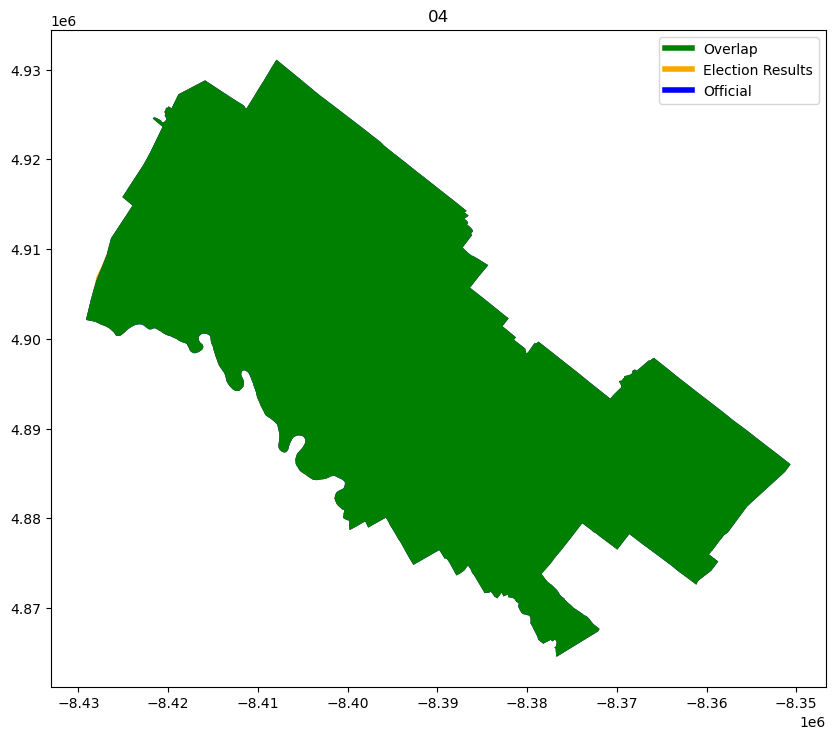

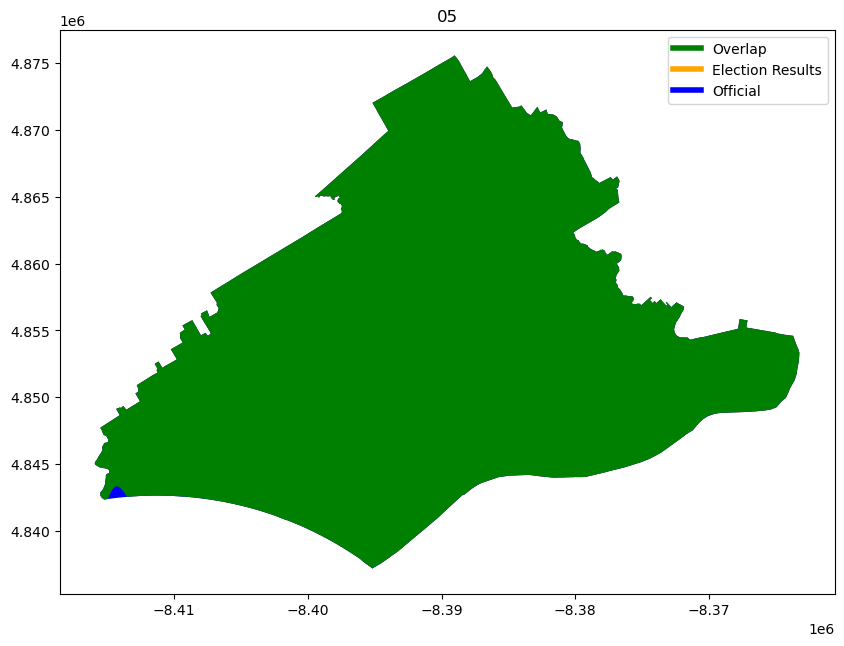

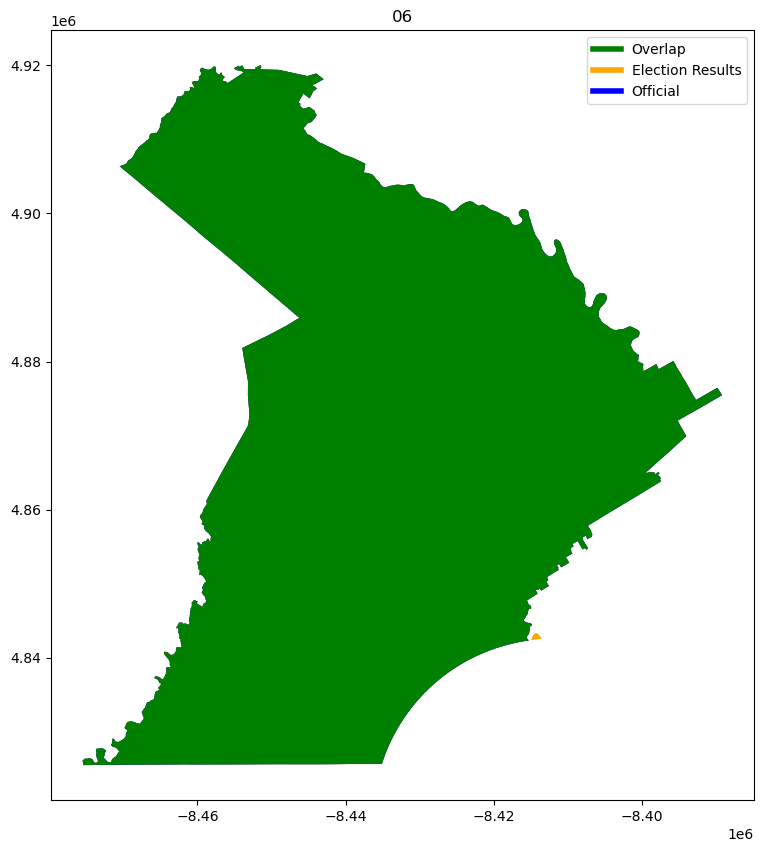

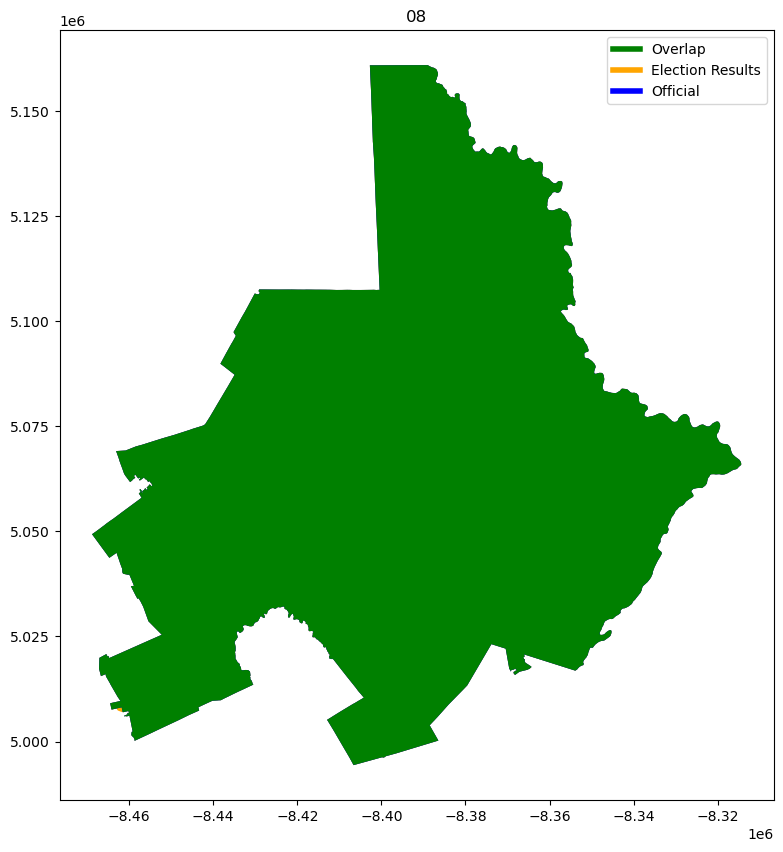

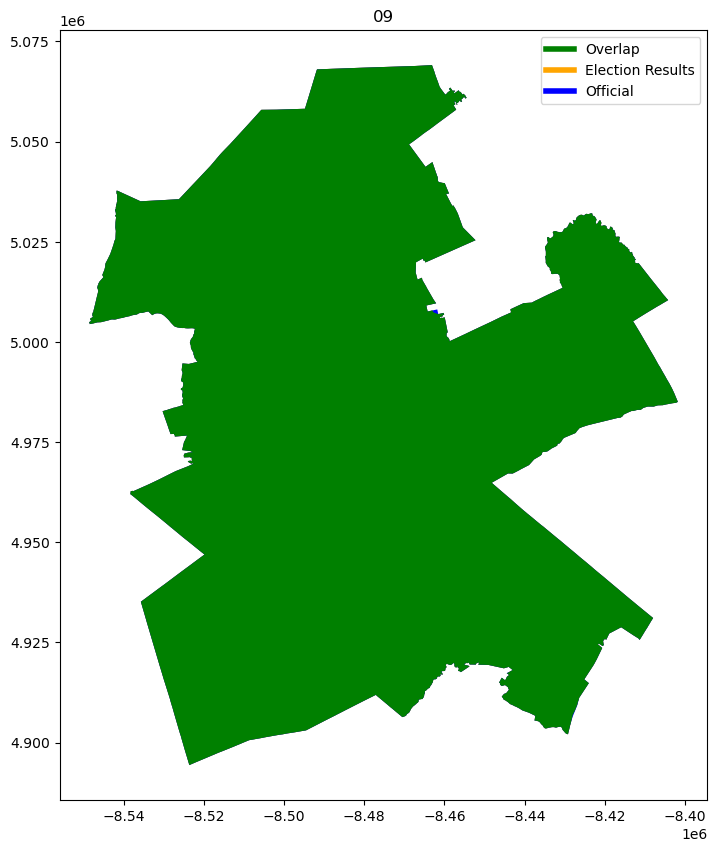

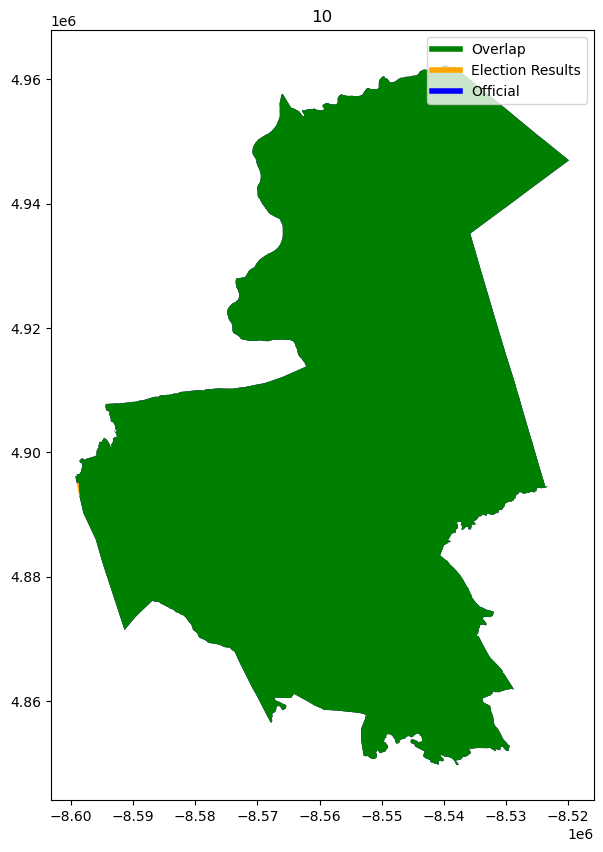

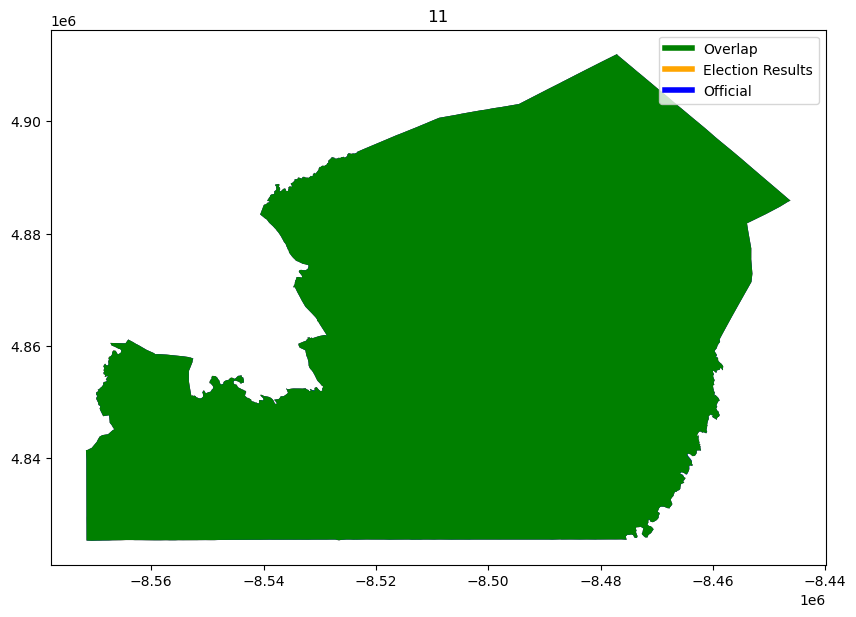

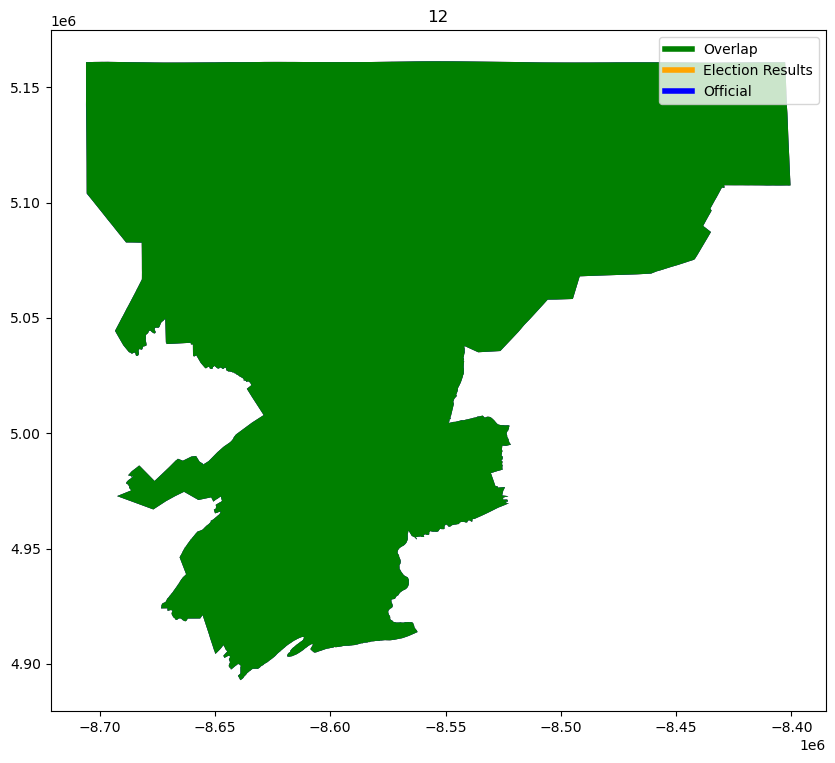

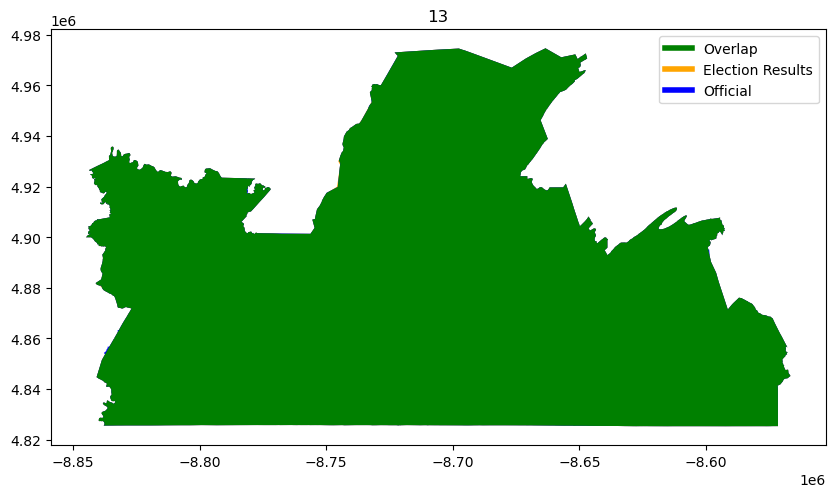

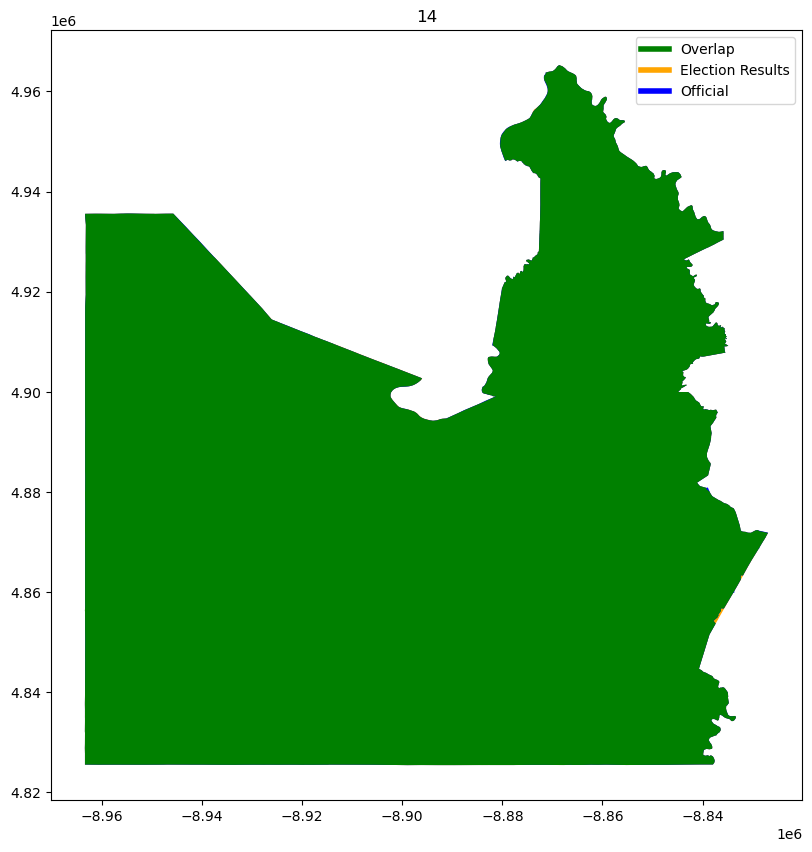

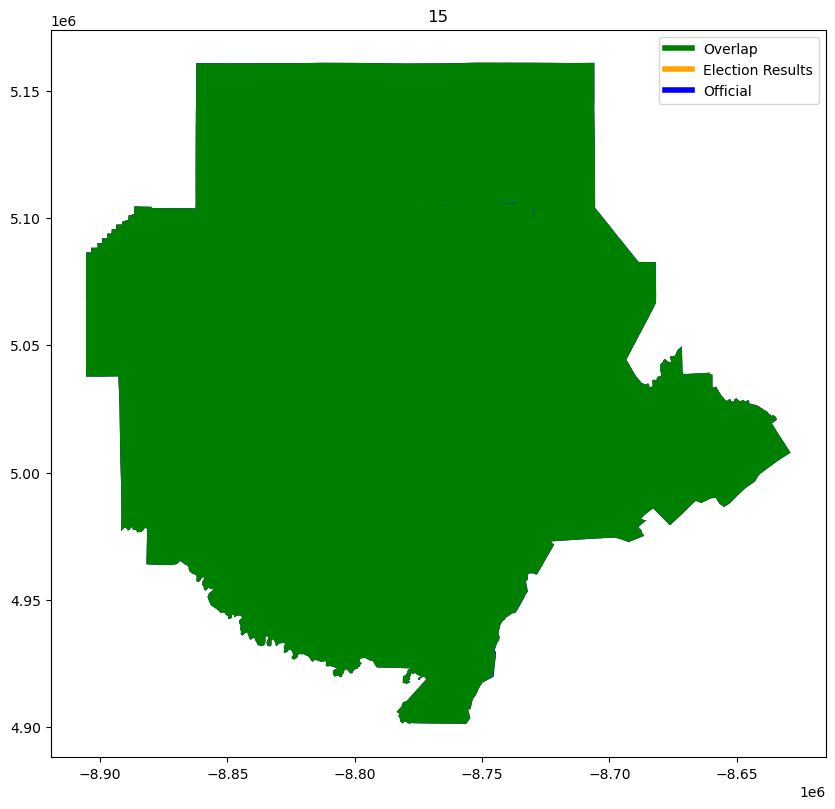

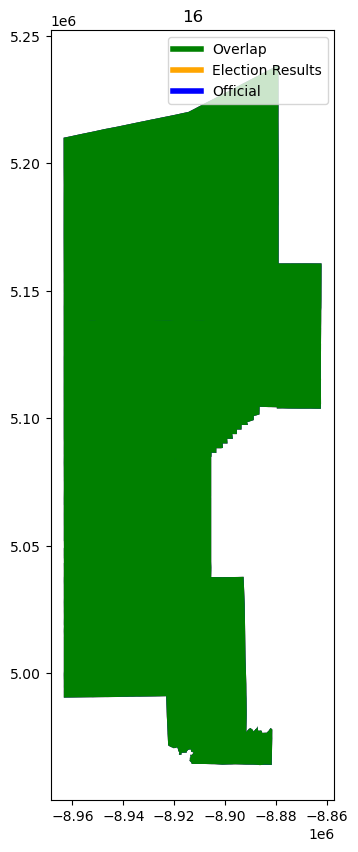

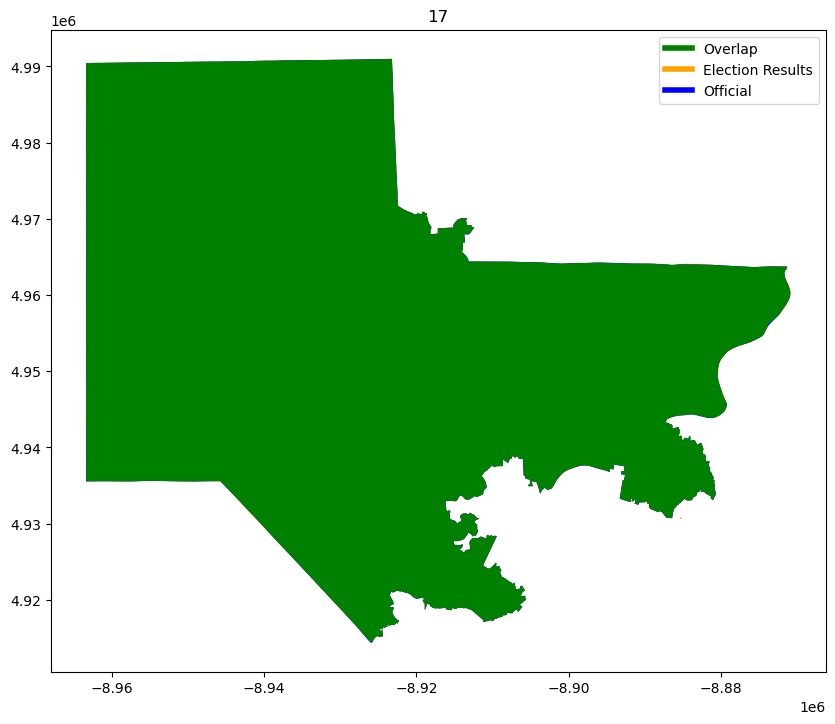

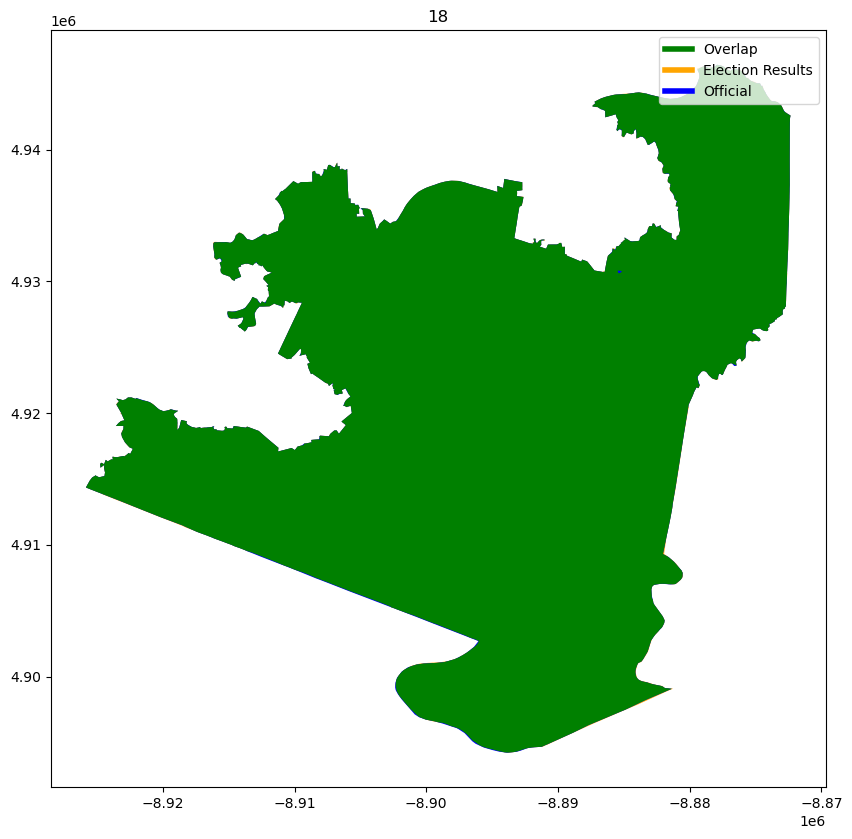

In [91]:
pdv.compare_geometries(dissolved_cong_results, pa_cong_districts ,"Election Results", "Official", "CONG_DIST", "districts", area_threshold=.1)


Checking 203 districts for differences of greater than 0.1 km^2

1) For 015 difference in area is 0.13020874117221737
2) For 035 difference in area is 0.1042061817324266
3) For 039 difference in area is 0.22393789181501997
4) For 044 difference in area is 0.10639804400363599
5) For 045 difference in area is 0.15970248376845614
6) For 046 difference in area is 0.37138486006644433
7) For 049 difference in area is 0.13386950271285938
8) For 052 difference in area is 0.5443072898116209
9) For 054 difference in area is 0.16728398508686507
10) For 055 difference in area is 1.0376048308270742
11) For 056 difference in area is 0.24376721614088803
12) For 057 difference in area is 0.7337936896990042
13) For 058 difference in area is 1.0797519956869324
14) For 059 difference in area is 1.7549629018866584
15) For 062 difference in area is 0.21685808126670186
16) For 067 difference in area is 0.1565261679926516
17) For 069 difference in area is 0.17156726548319393
18) For 071 difference in area is

/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/geopandas/plotting.py:658: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=figsize)


22) For 079 difference in area is 0.3469131547994505
23) For 080 difference in area is 0.5543179606943179
24) For 084 difference in area is 6.157985277772535
25) For 085 difference in area is 6.157985245311214
26) For 087 difference in area is 0.10508654845755461
27) For 095 difference in area is 0.13952216708257142
28) For 119 difference in area is 0.15006923042042192
29) For 131 difference in area is 0.14078028793593808
30) For 136 difference in area is 0.35210402566676585
31) For 137 difference in area is 0.20942302194303394
32) For 138 difference in area is 0.24499716790056647
33) For 160 difference in area is 0.12412420591364422
34) For 183 difference in area is 0.14679512304533326
35) For 196 difference in area is 0.13869983999744878

Scroll down to see plots of any differences

Of the 203 districts:

2 districts w/ a difference of 0 km^2
166 districts w/ a difference between 0 and .1 km^2
25 districts w/ a difference between .1 and .5 km^2
4 districts w/ a difference between .5 

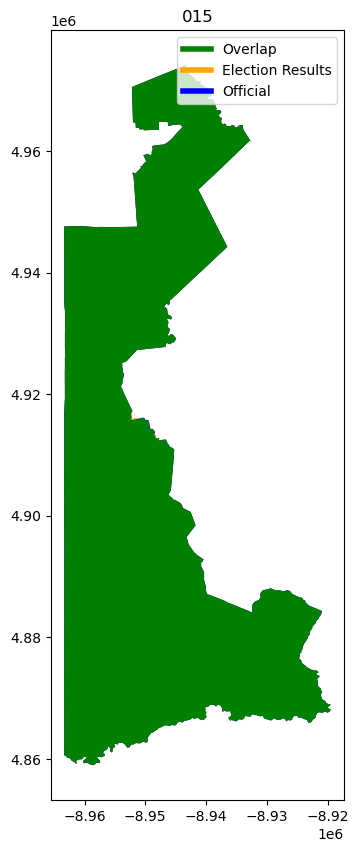

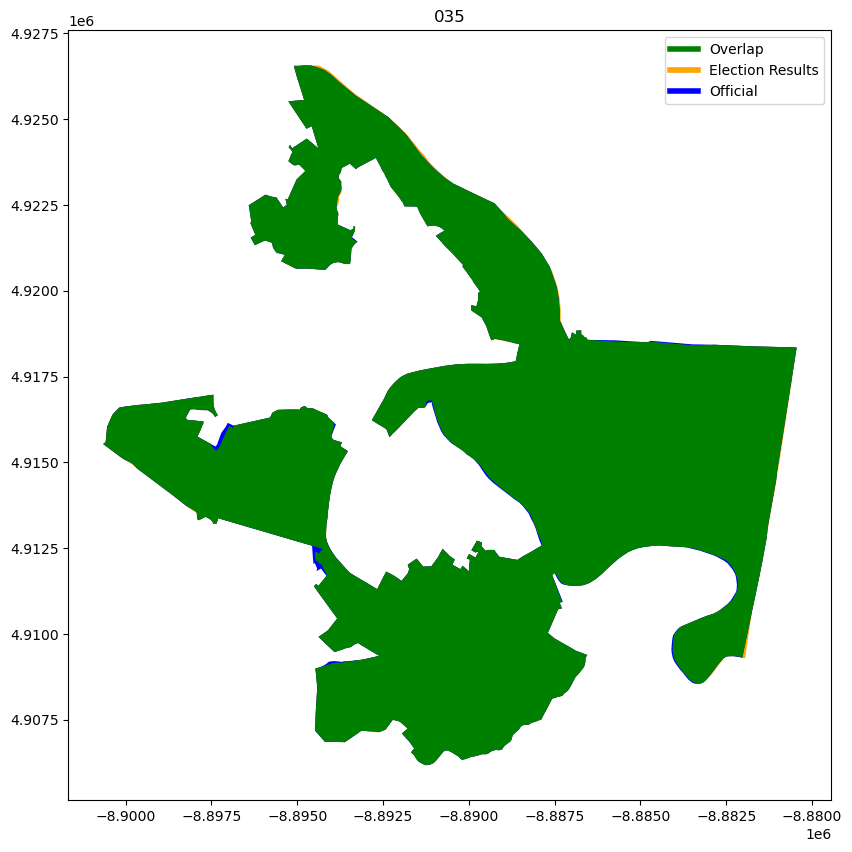

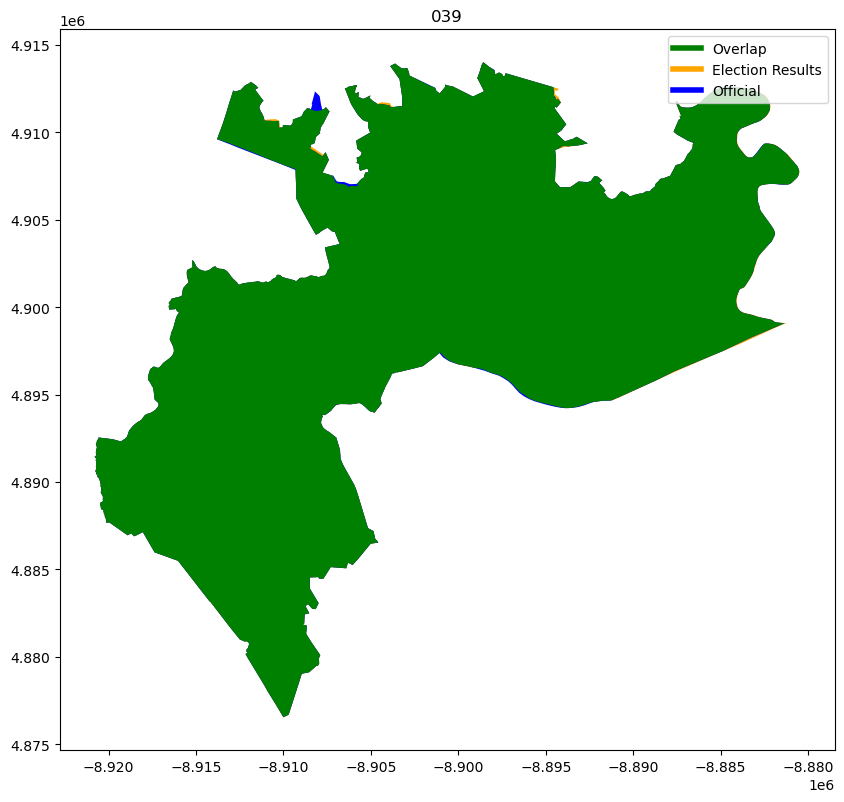

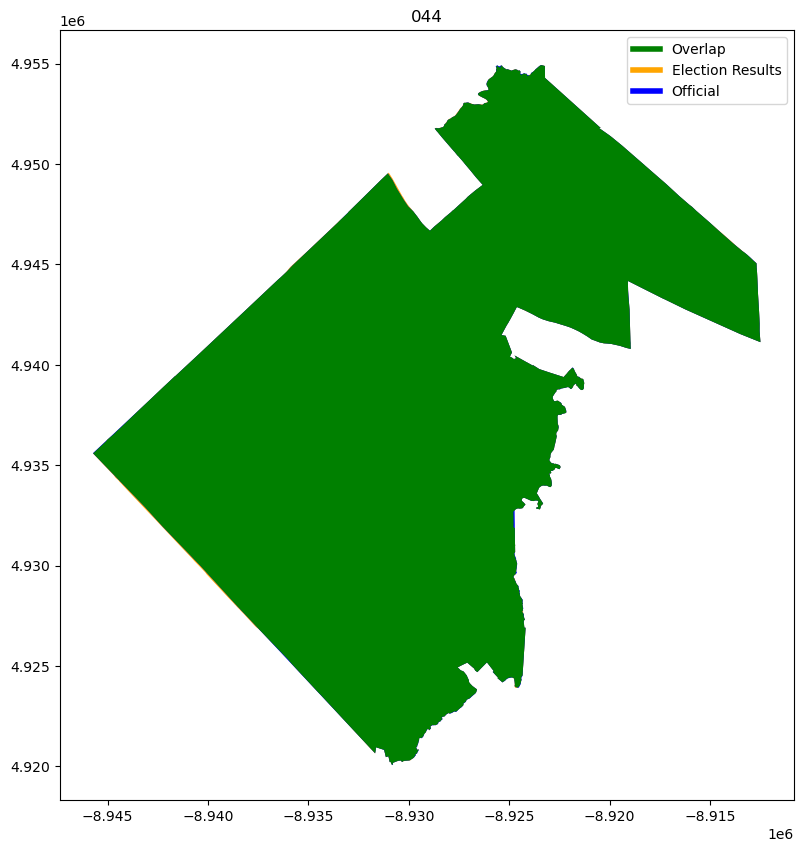

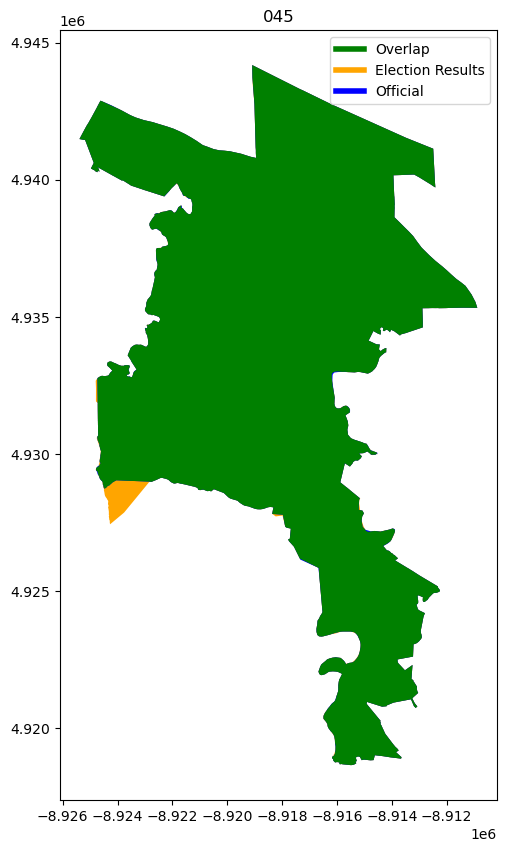

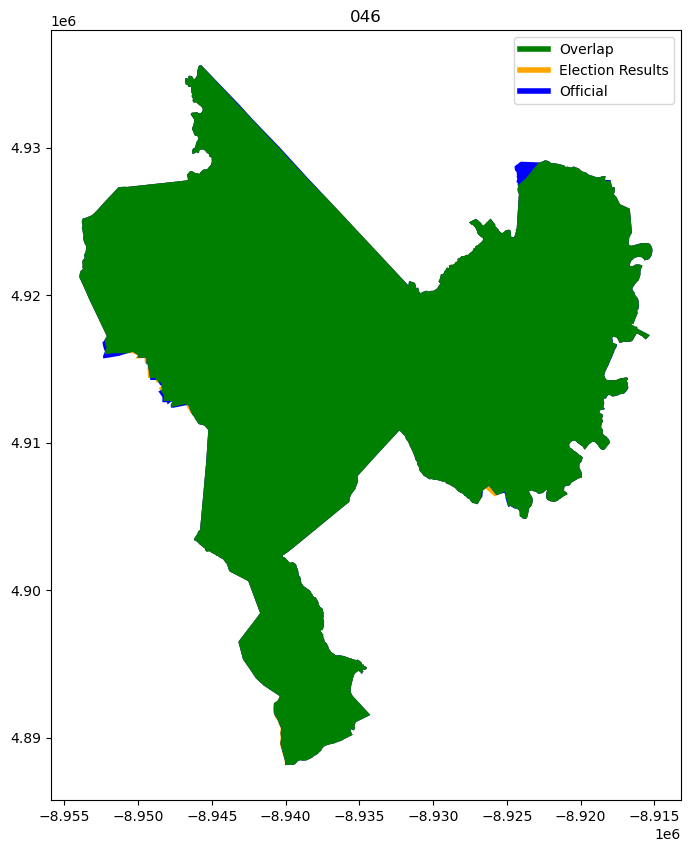

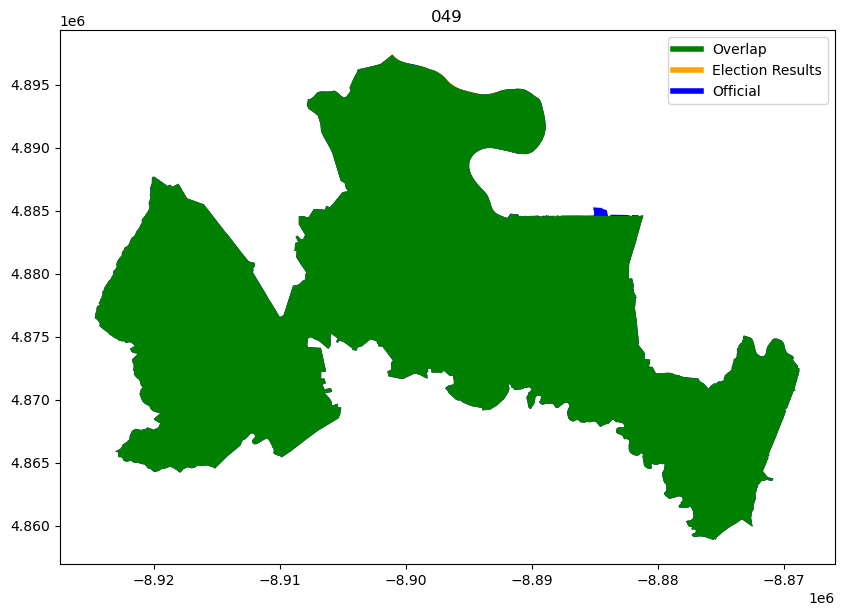

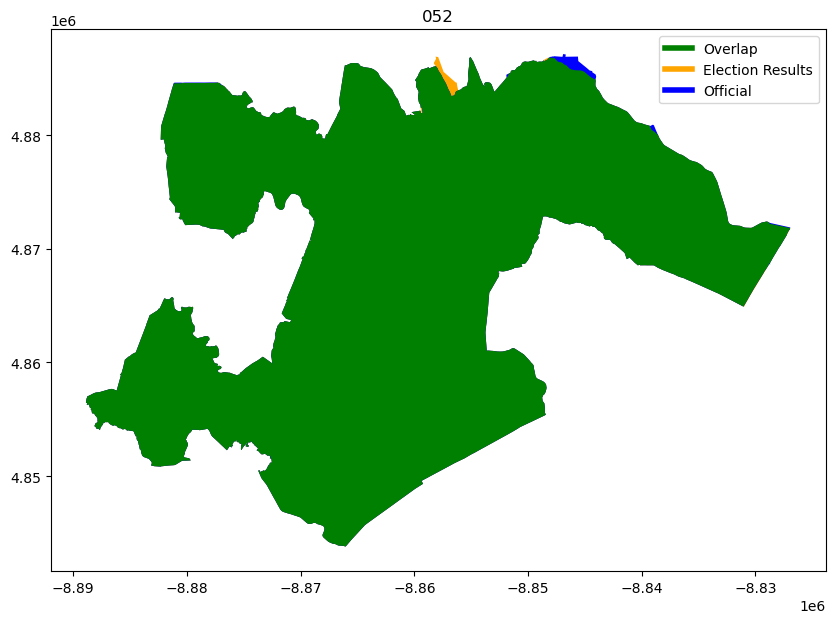

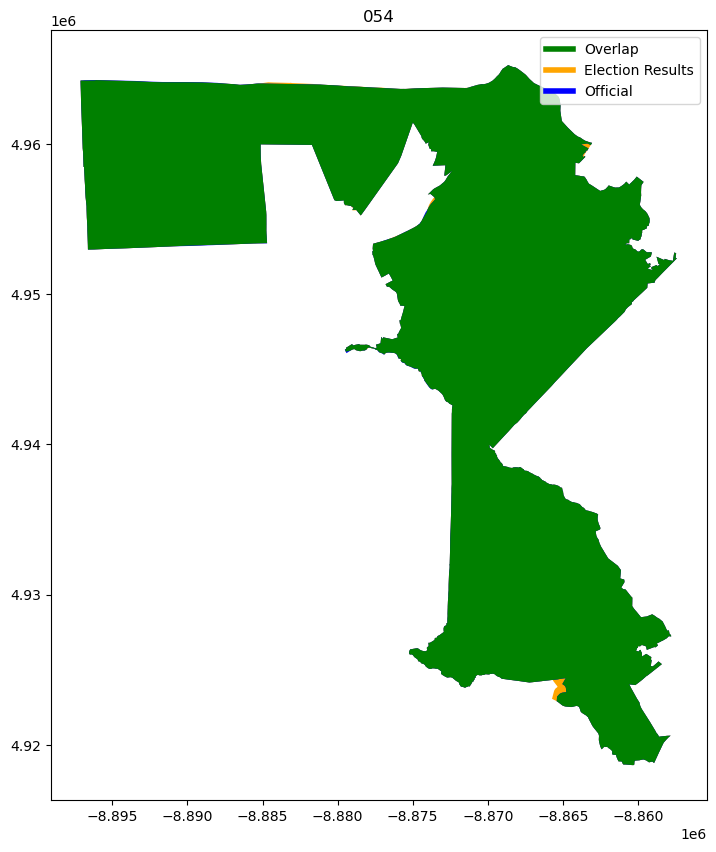

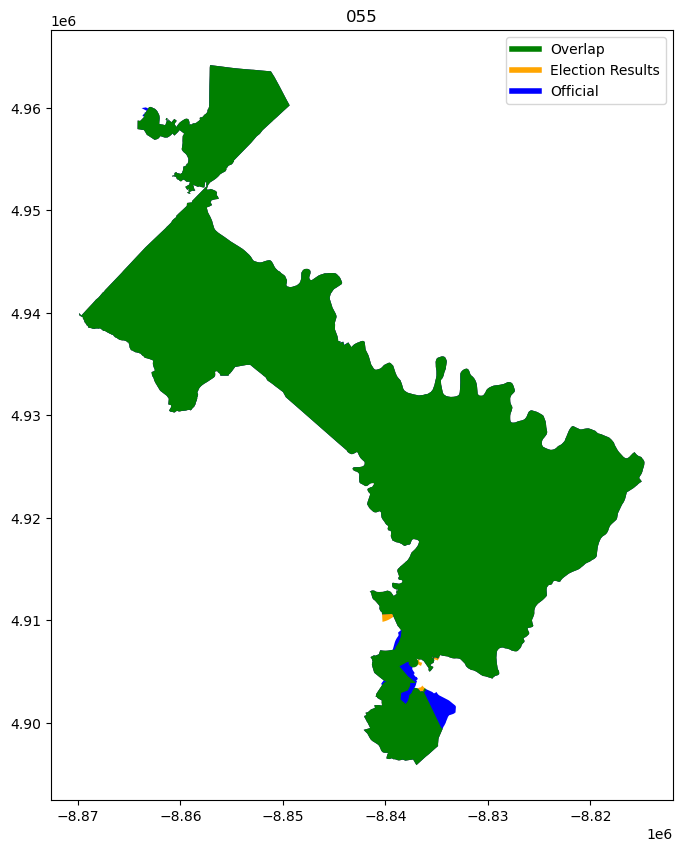

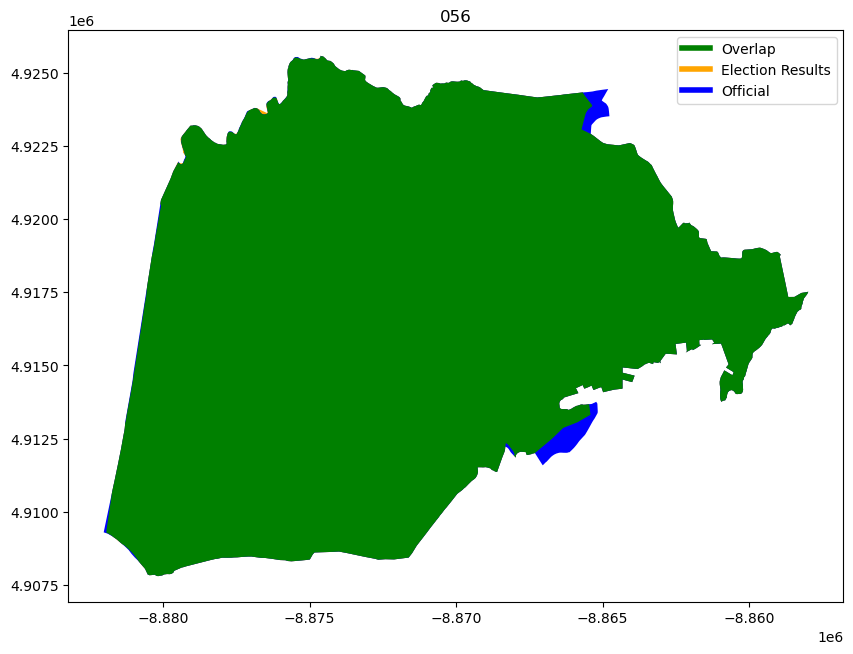

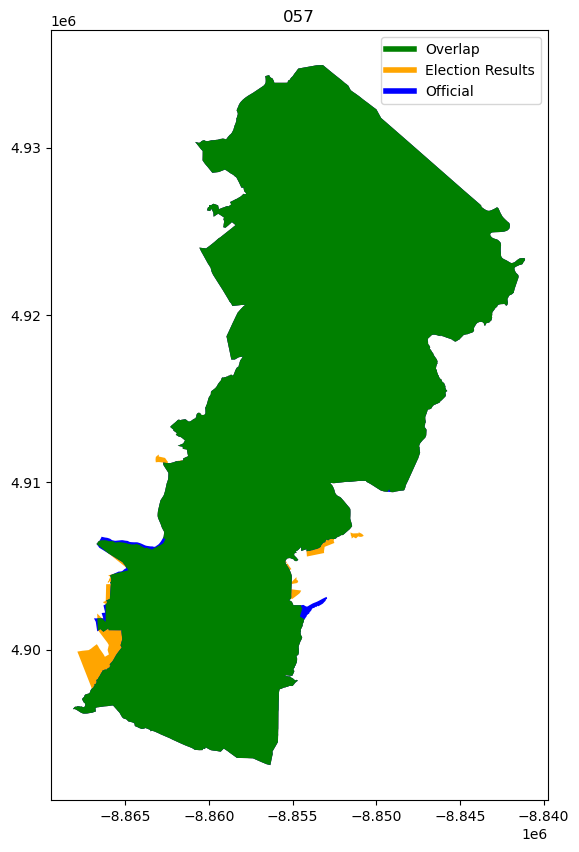

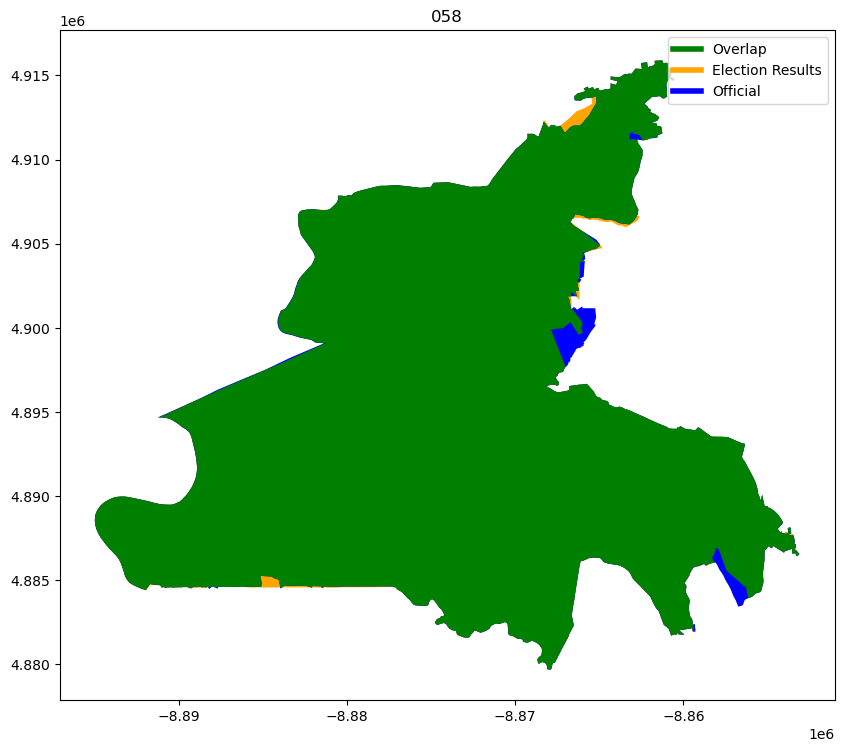

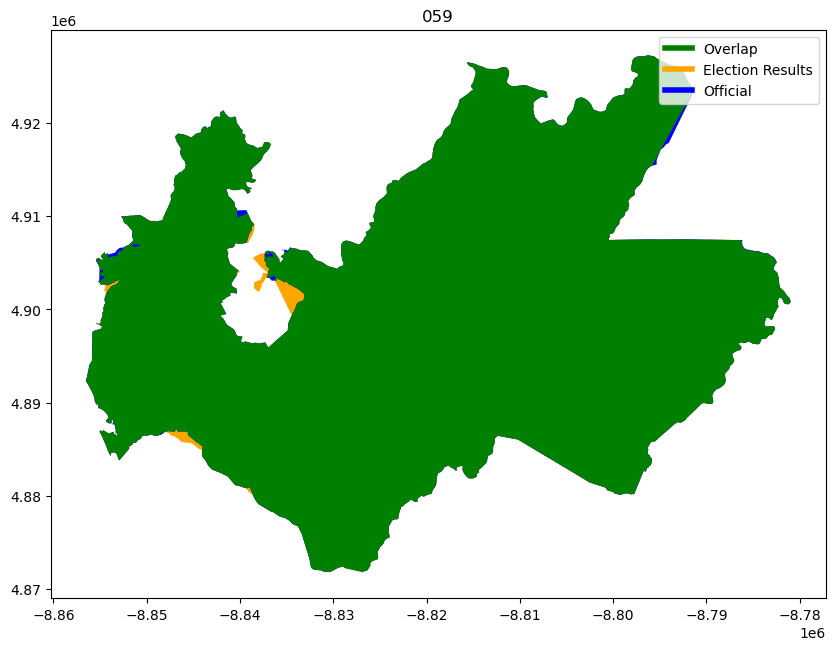

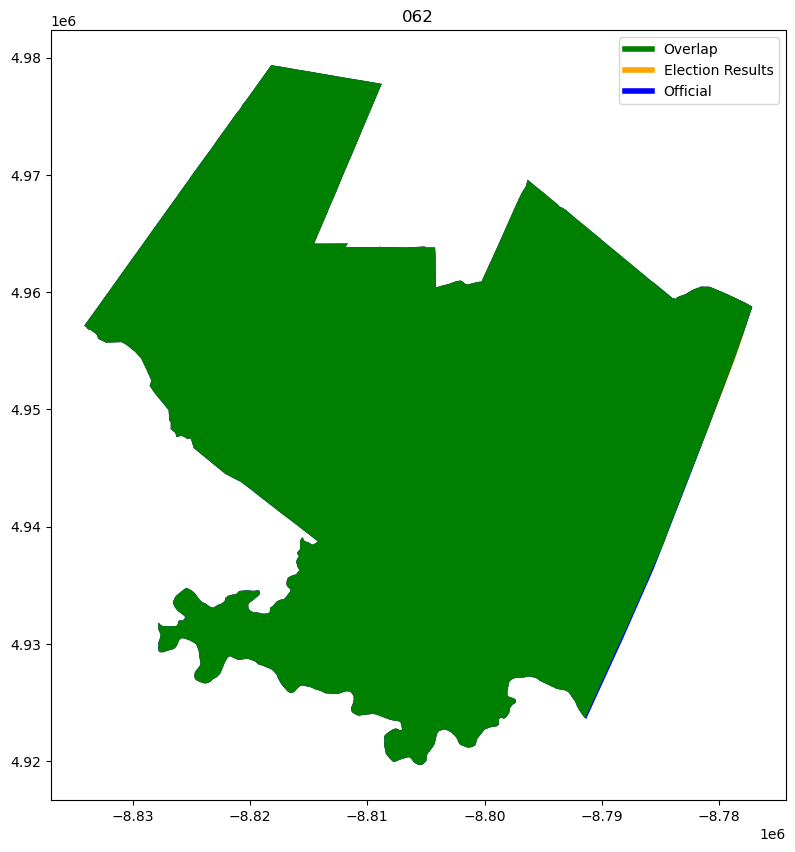

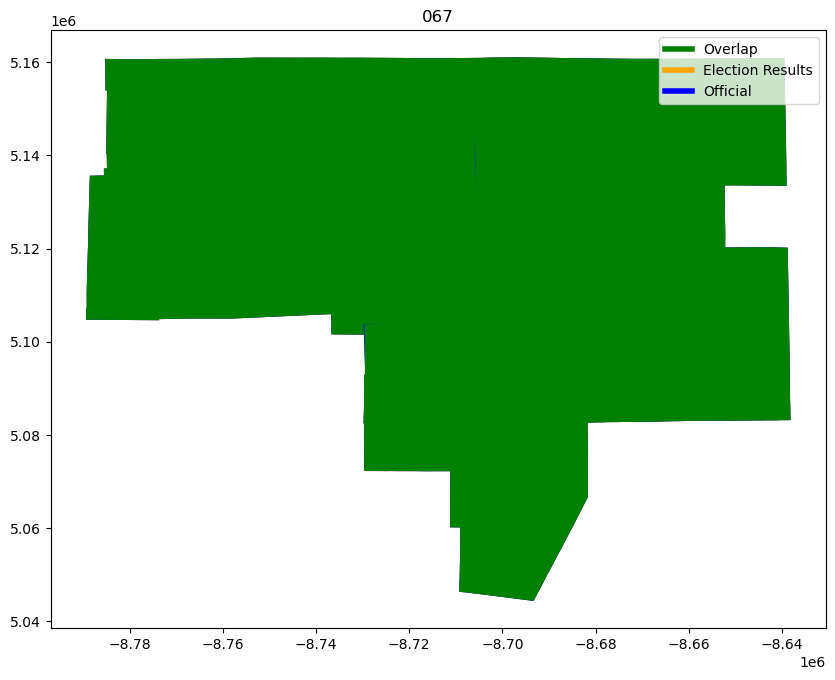

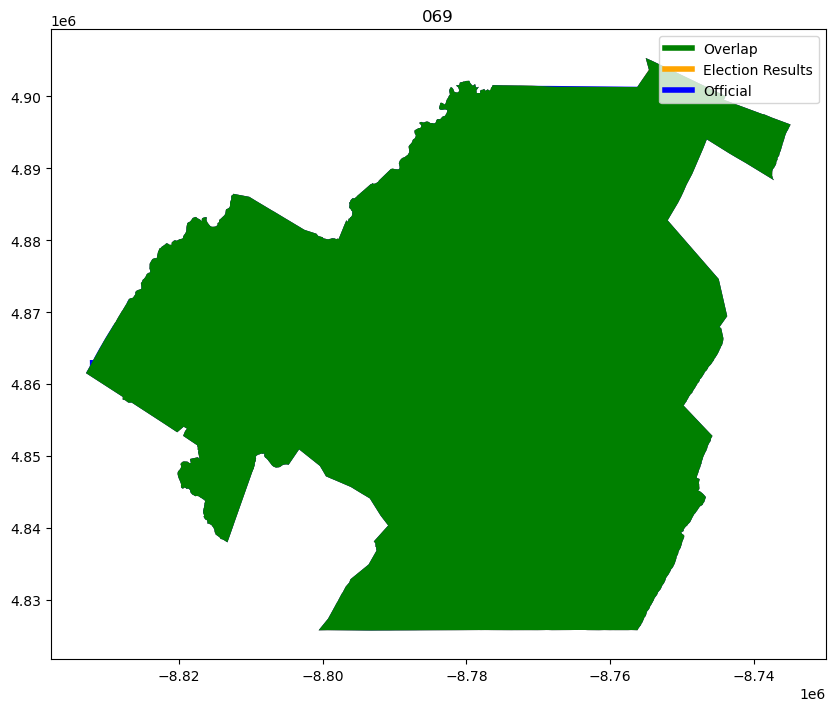

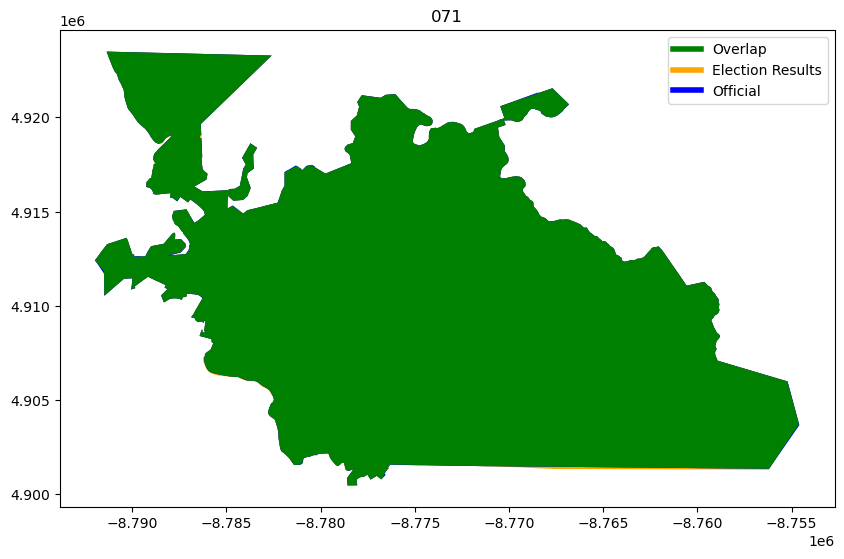

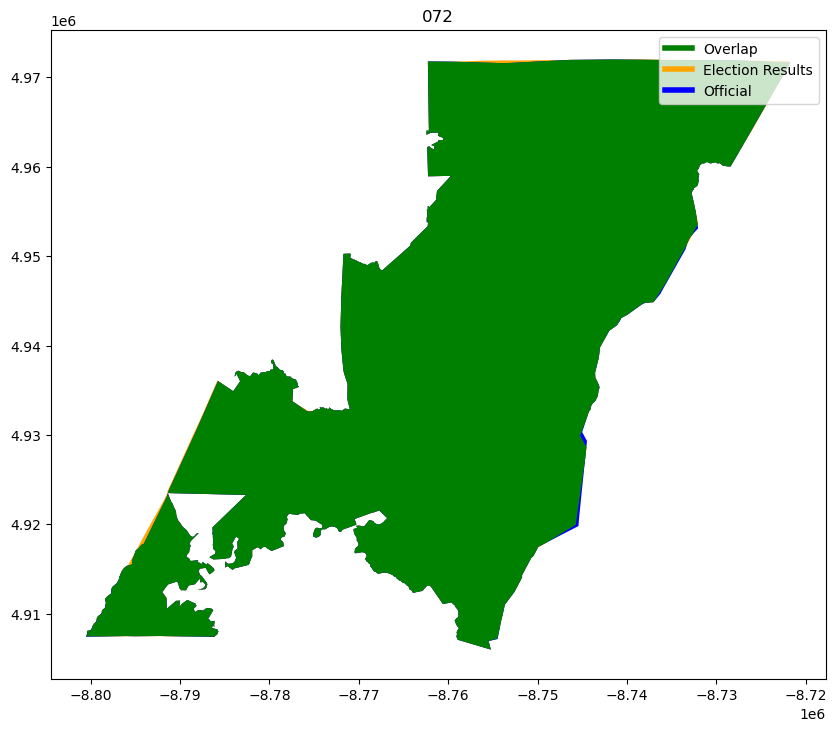

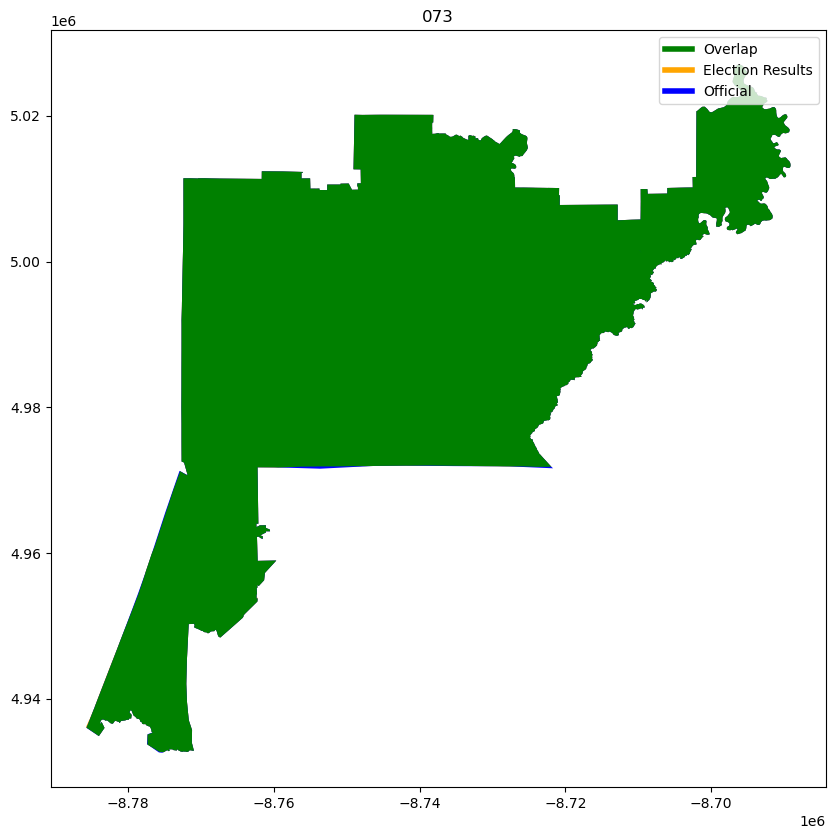

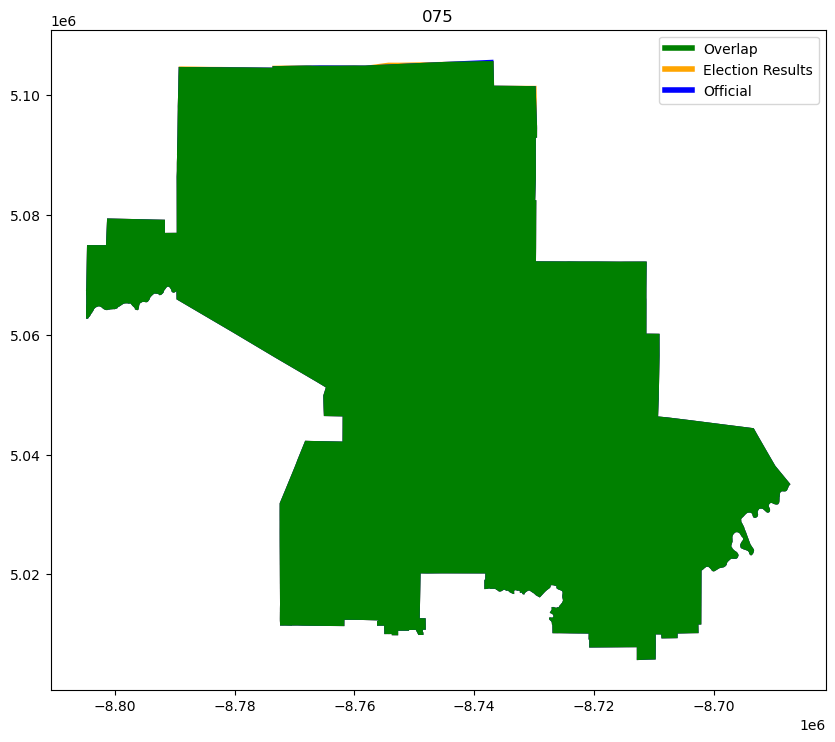

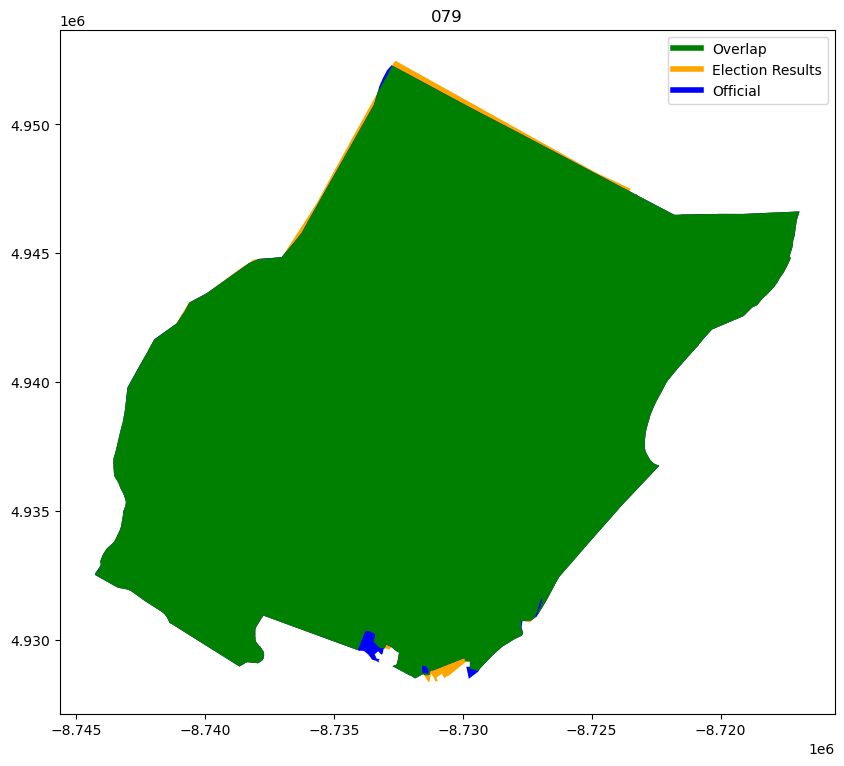

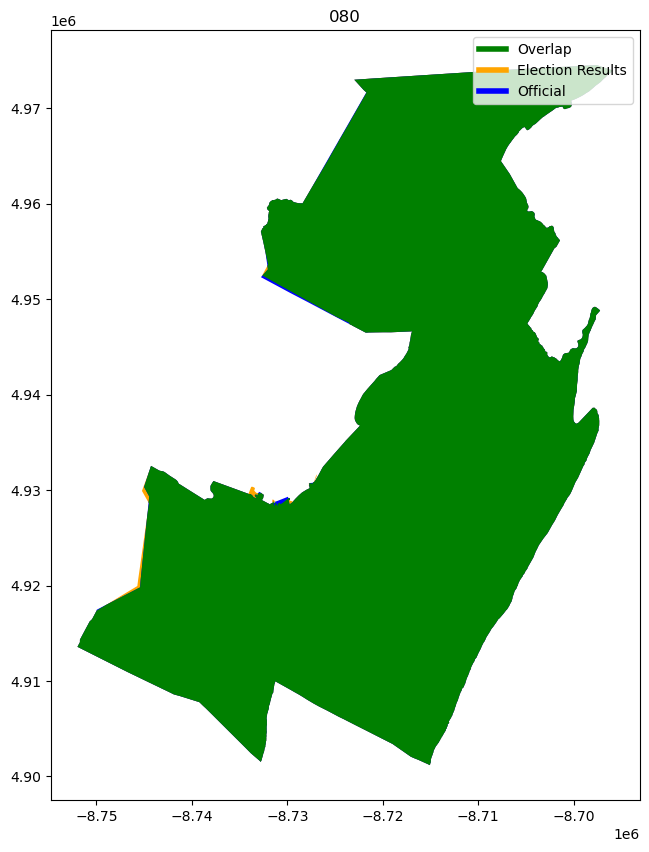

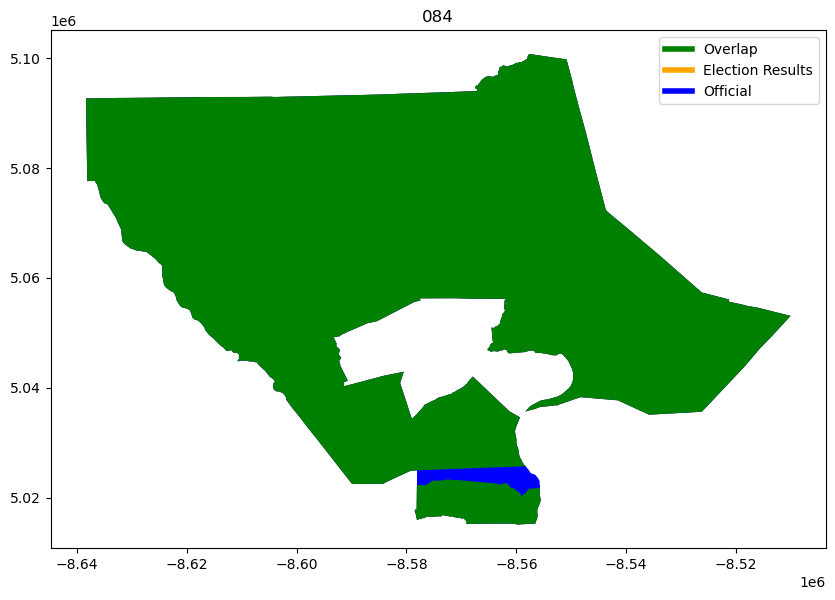

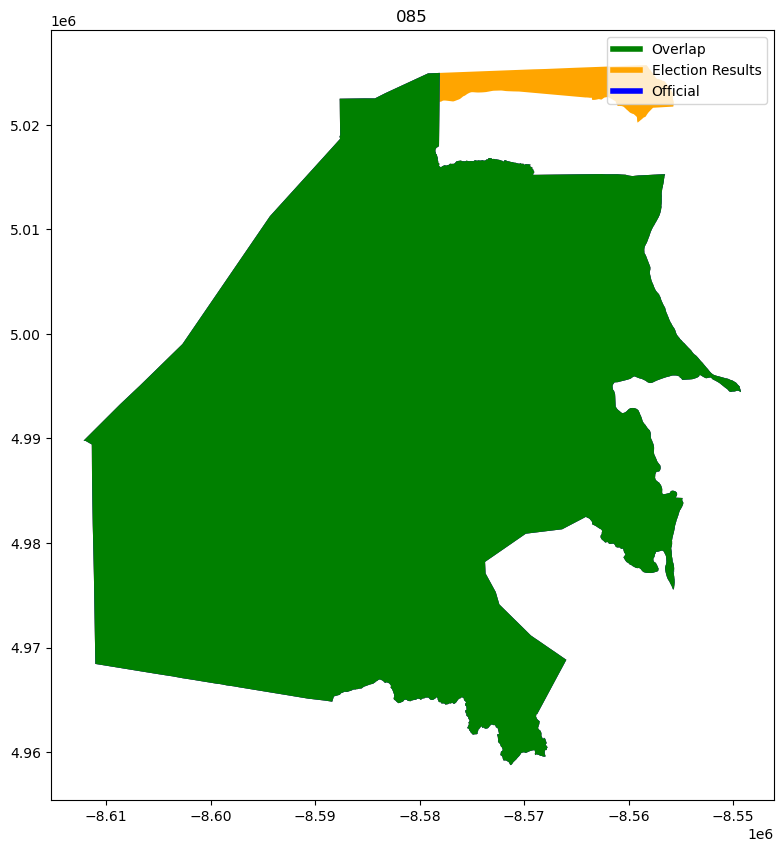

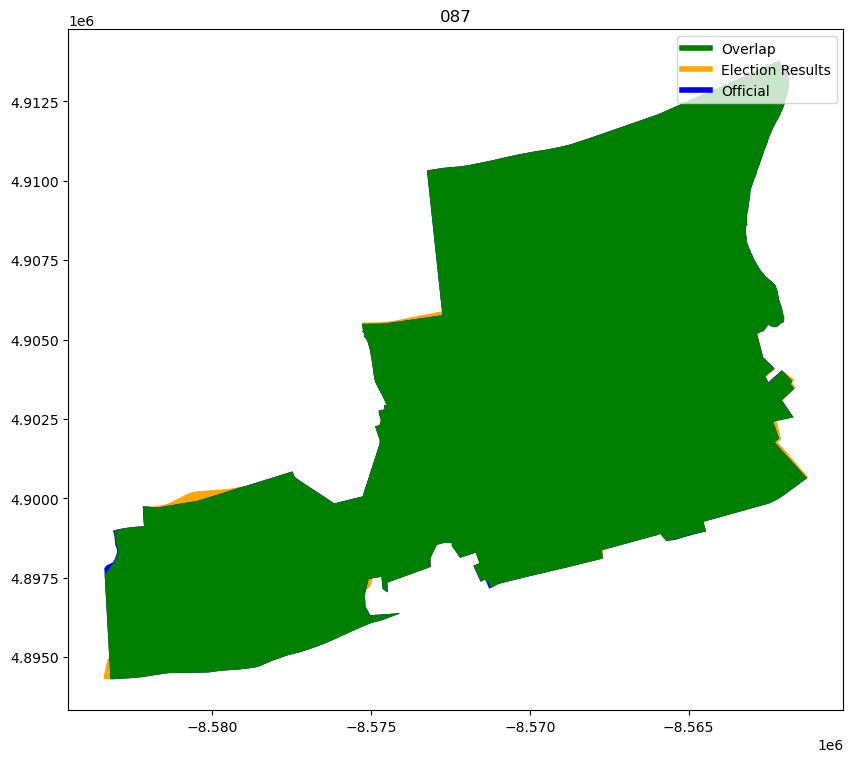

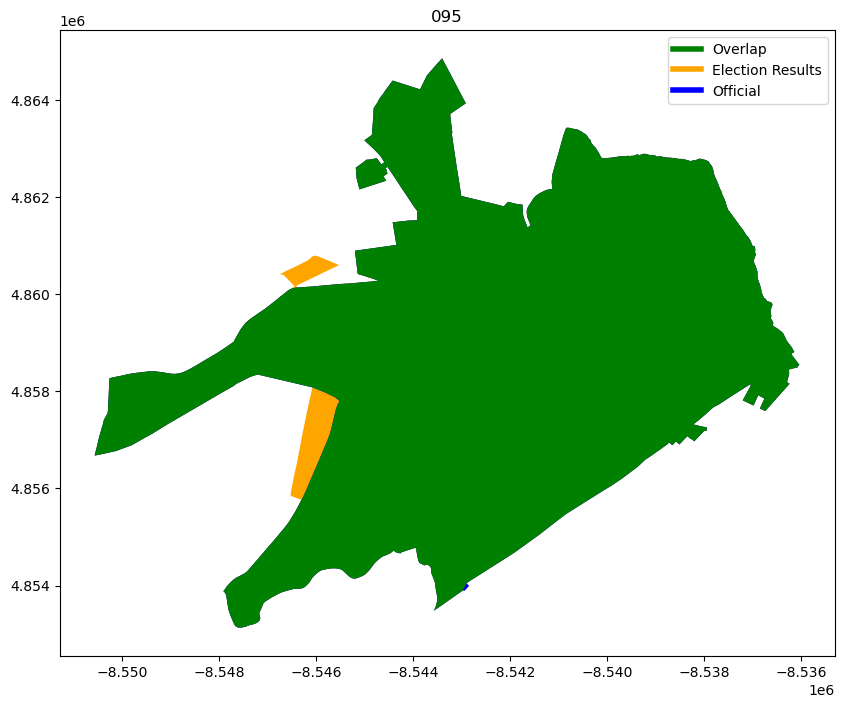

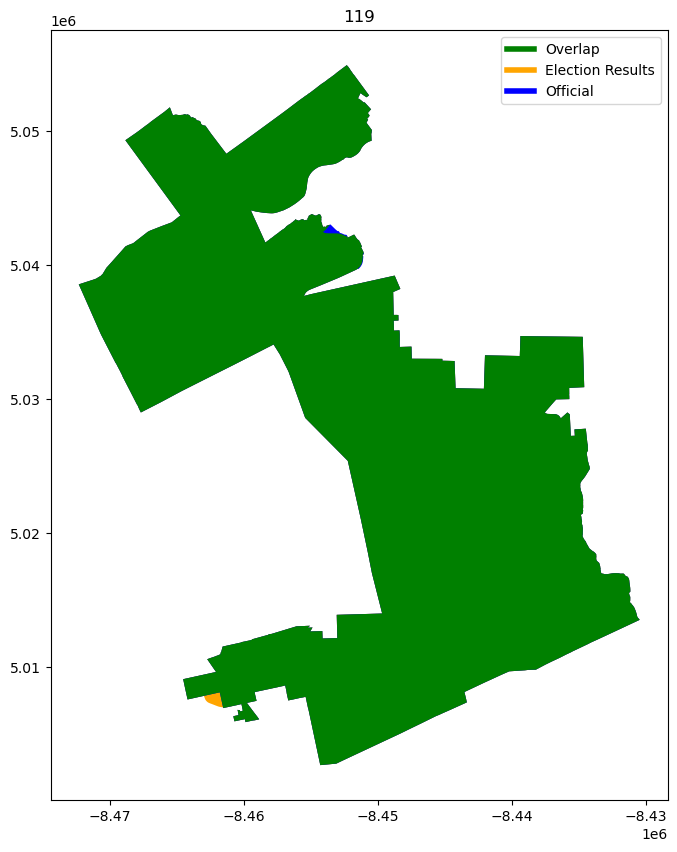

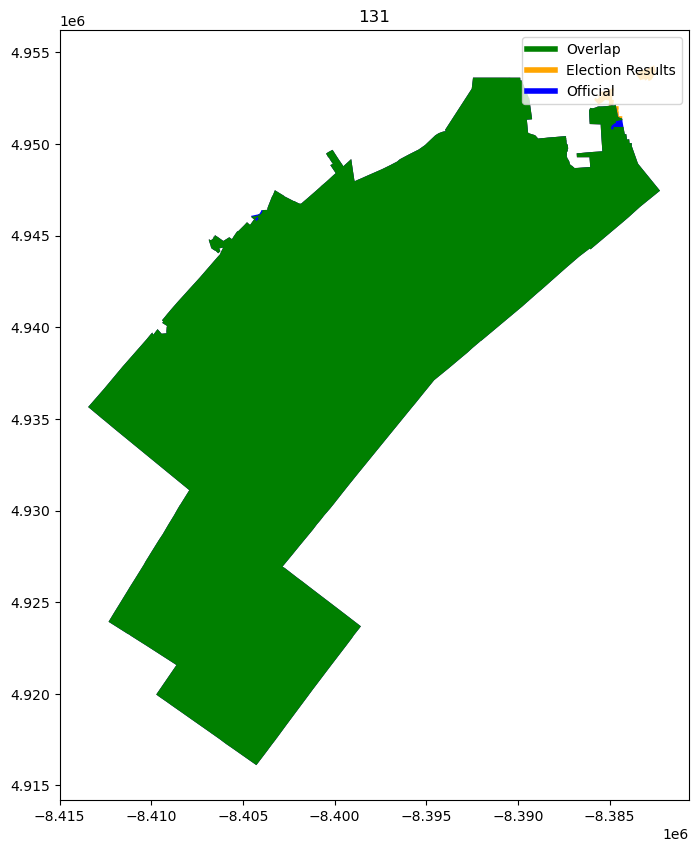

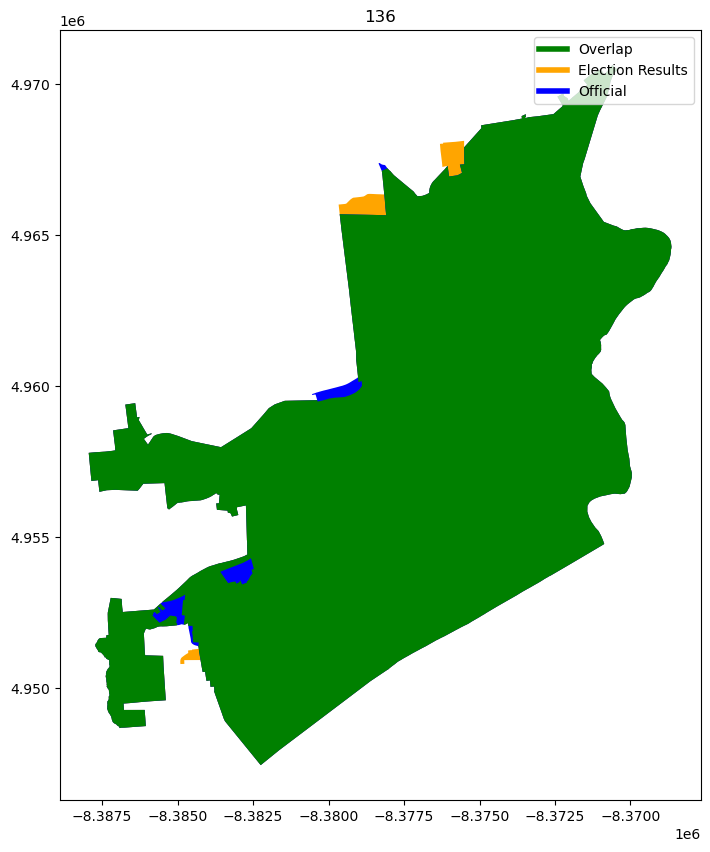

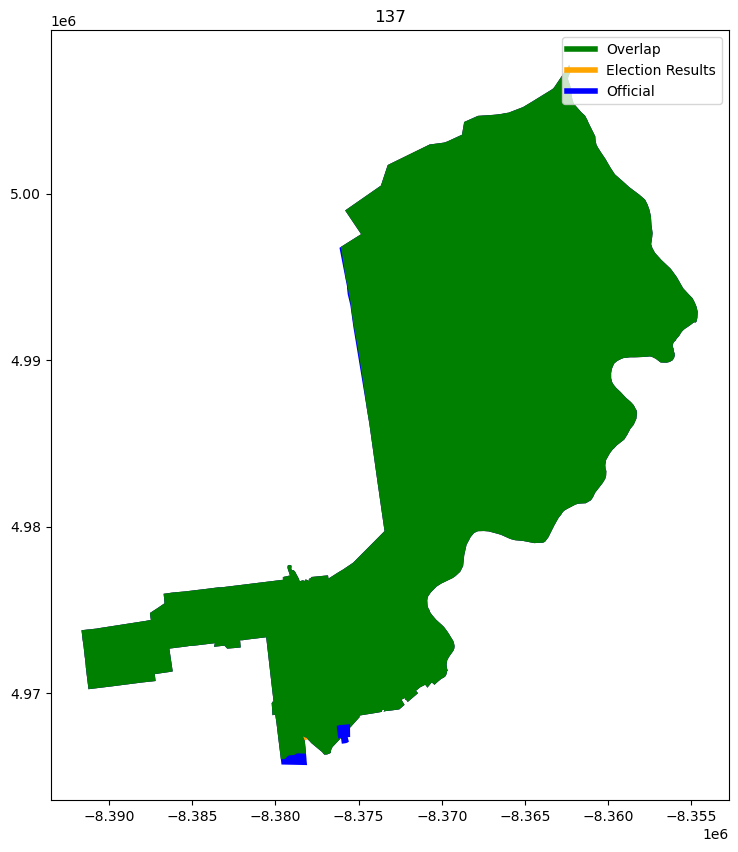

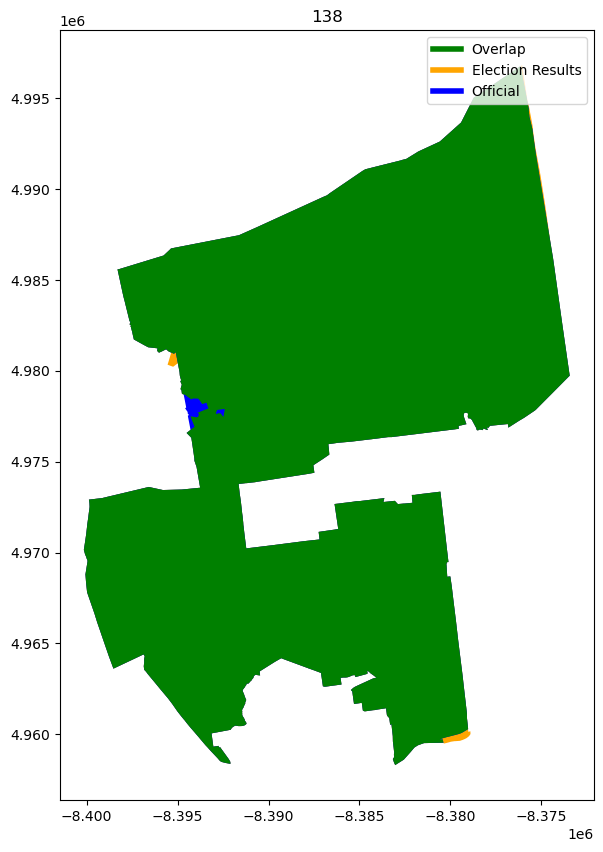

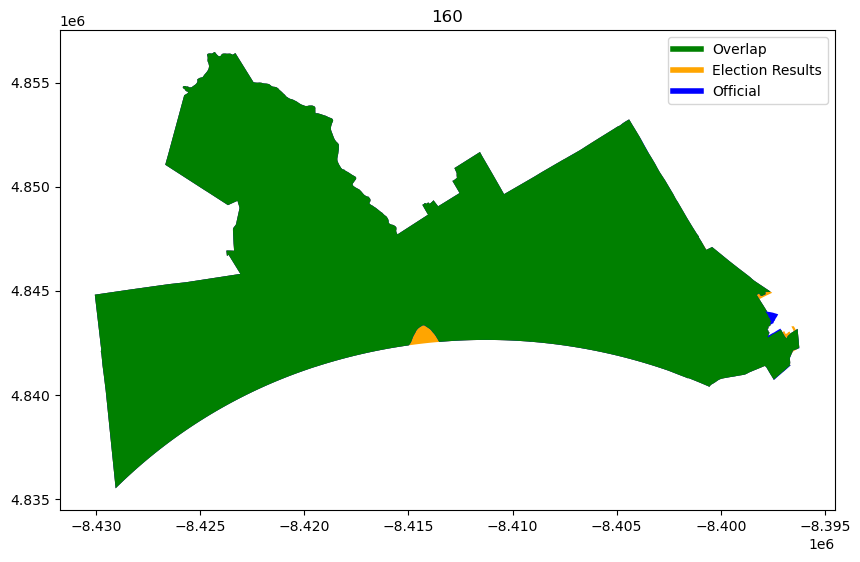

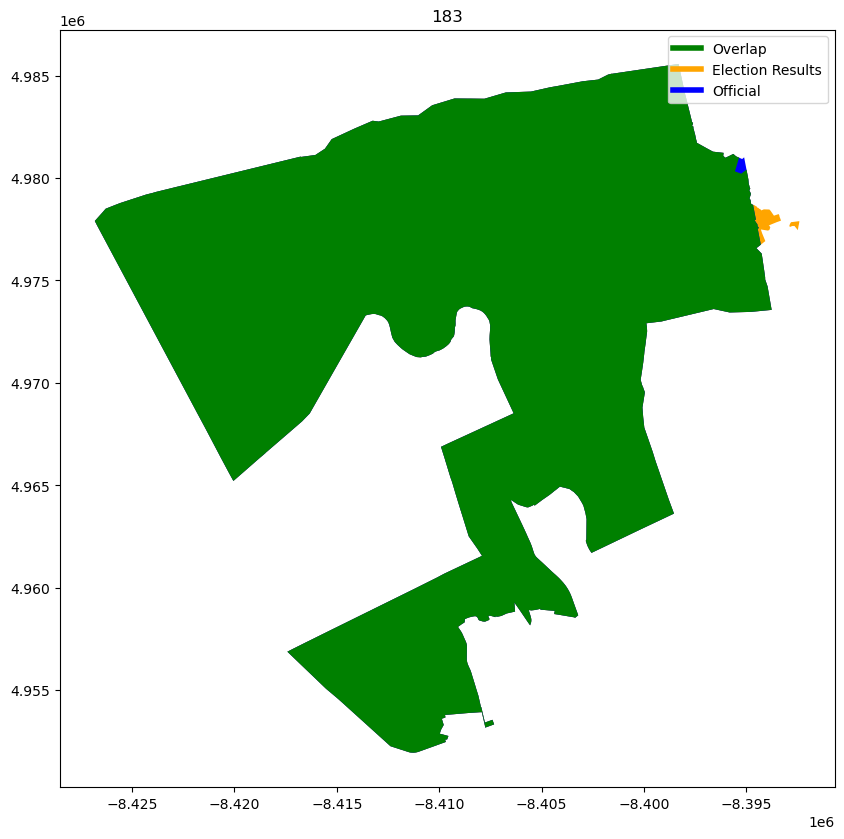

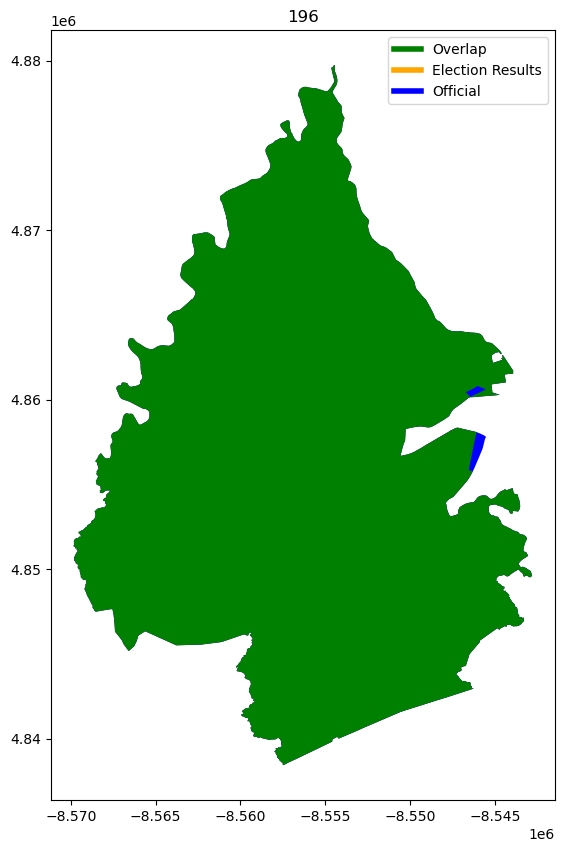

In [92]:
pdv.compare_geometries(dissolved_sldl_results, pa_sldl_districts ,"Election Results", "Official", "SLDL_DIST","districts", area_threshold=.1)


Checking 50 districts for differences of greater than 0.1 km^2

1) For 21 difference in area is 0.1304250717997068
2) For 25 difference in area is 0.23397133472907305
3) For 30 difference in area is 0.6543827803028891
4) For 31 difference in area is 0.211841594182031
5) For 32 difference in area is 0.5039910927392398
6) For 35 difference in area is 1.0402822779456407
7) For 37 difference in area is 0.20090379894663976
8) For 38 difference in area is 0.18573643569151774
9) For 39 difference in area is 0.5639739358639916
10) For 41 difference in area is 0.35422241867887555
11) For 45 difference in area is 0.2644350251299314
12) For 46 difference in area is 0.20419752331729257

Scroll down to see plots of any differences

Of the 50 districts:

0 districts w/ a difference of 0 km^2
38 districts w/ a difference between 0 and .1 km^2
8 districts w/ a difference between .1 and .5 km^2
3 districts w/ a difference between .5 and 1 km^2
1 districts w/ a difference between 1 and 2 km^2
0 district

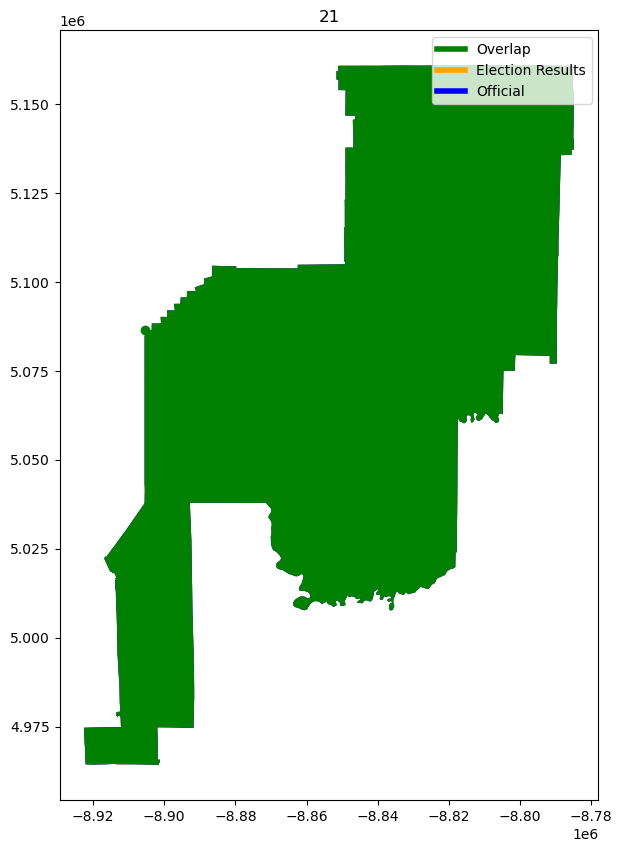

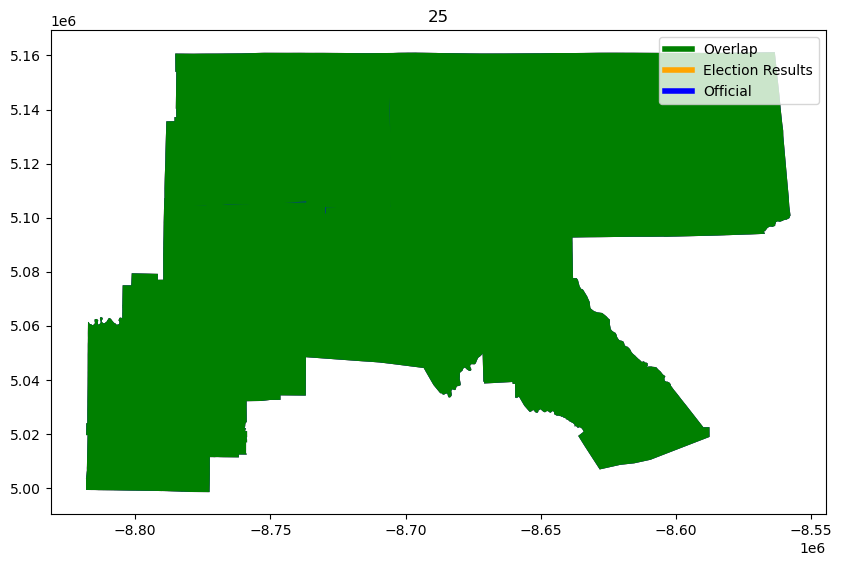

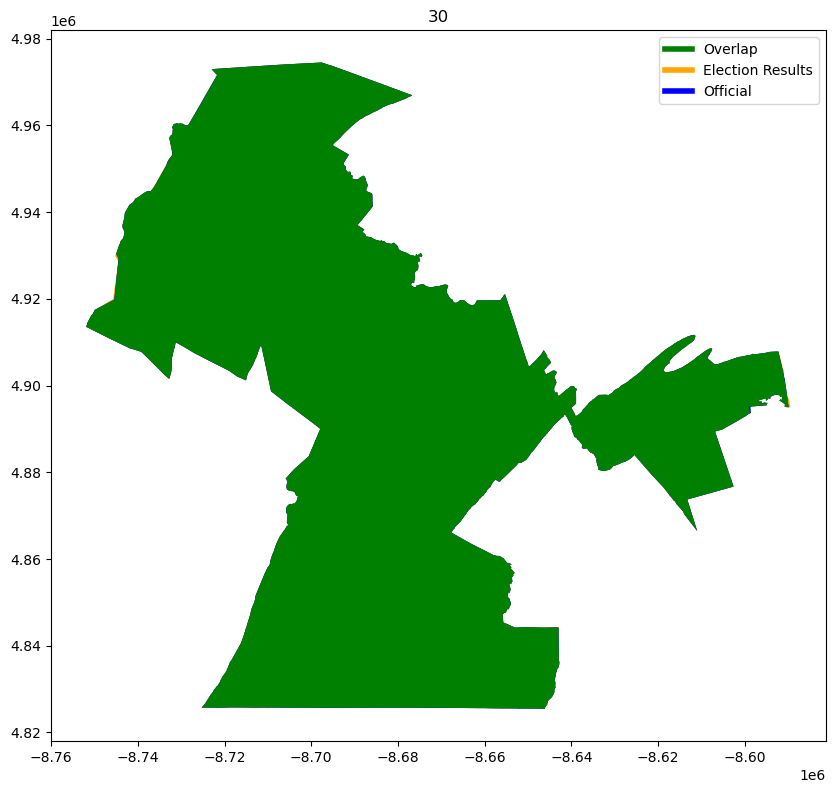

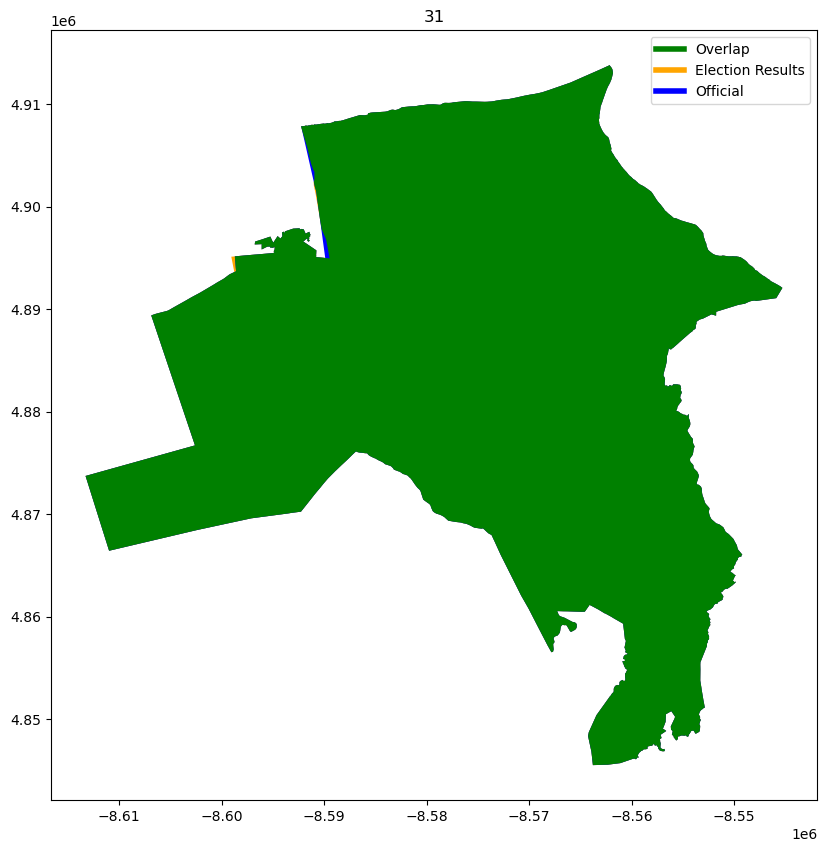

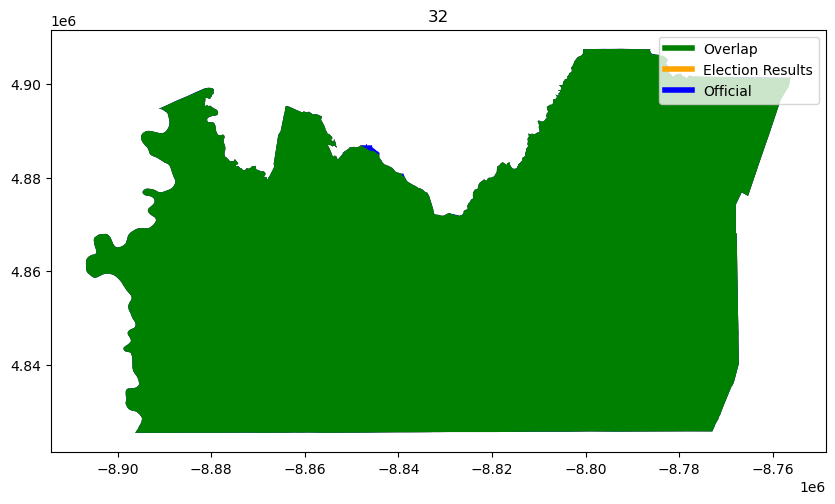

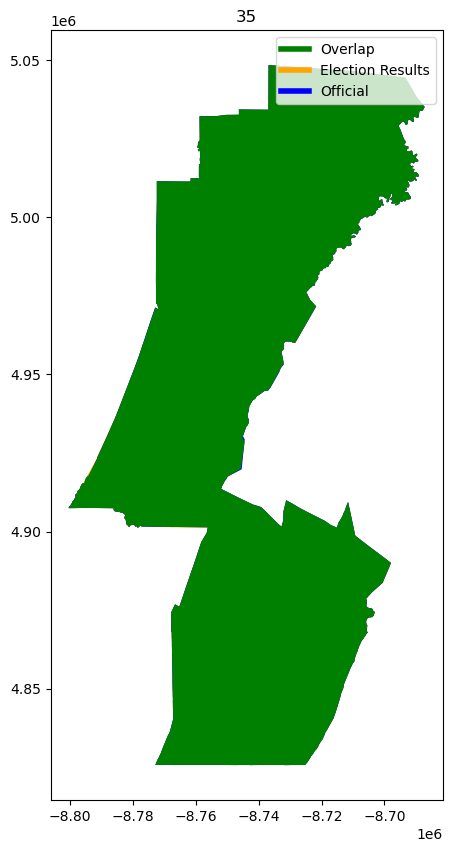

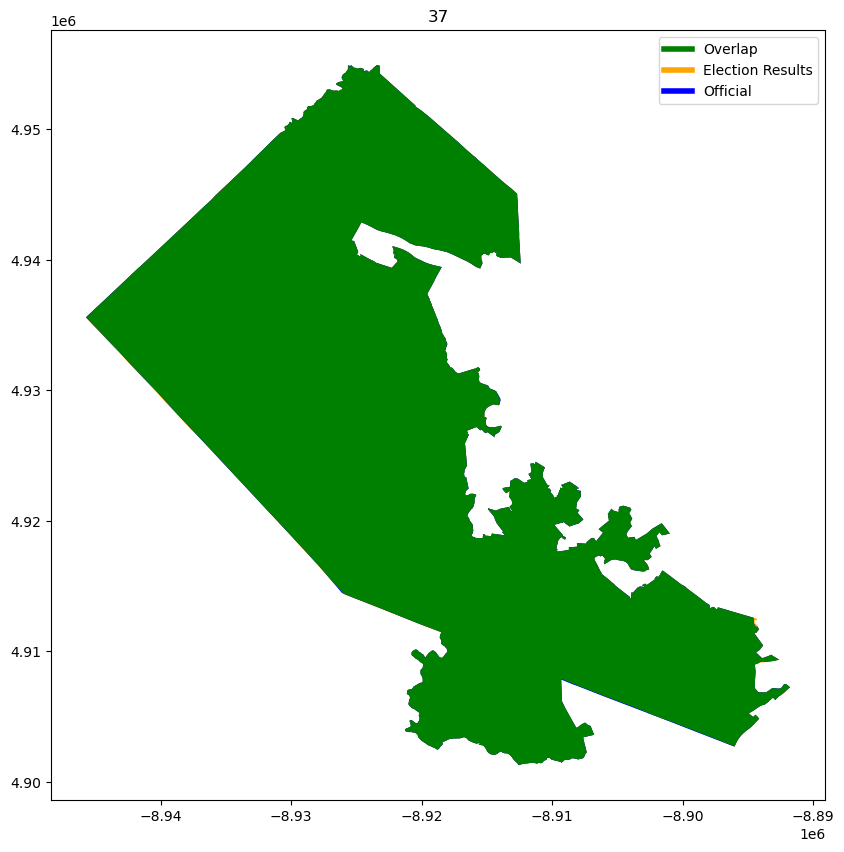

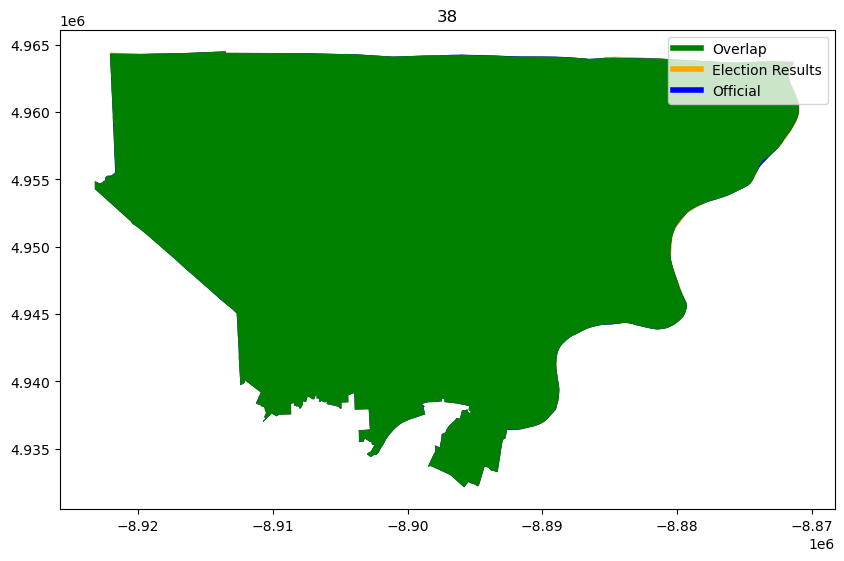

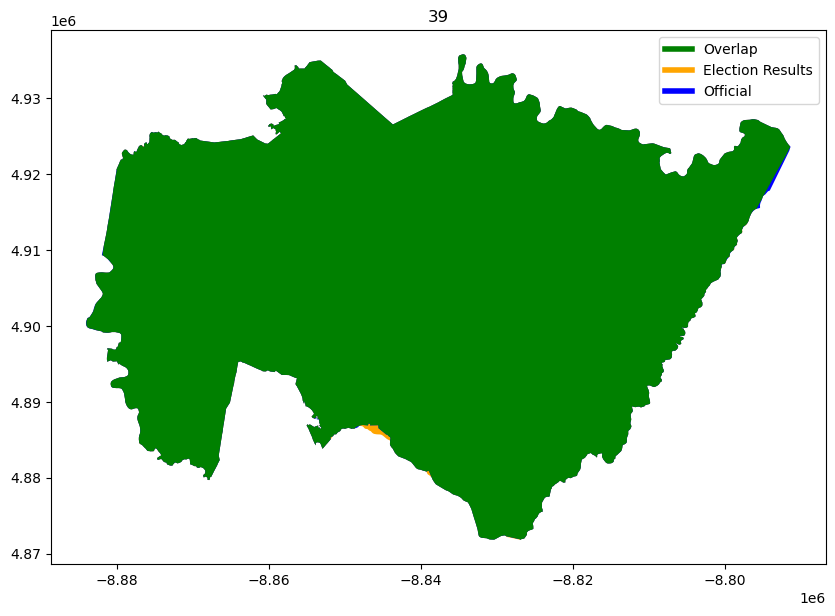

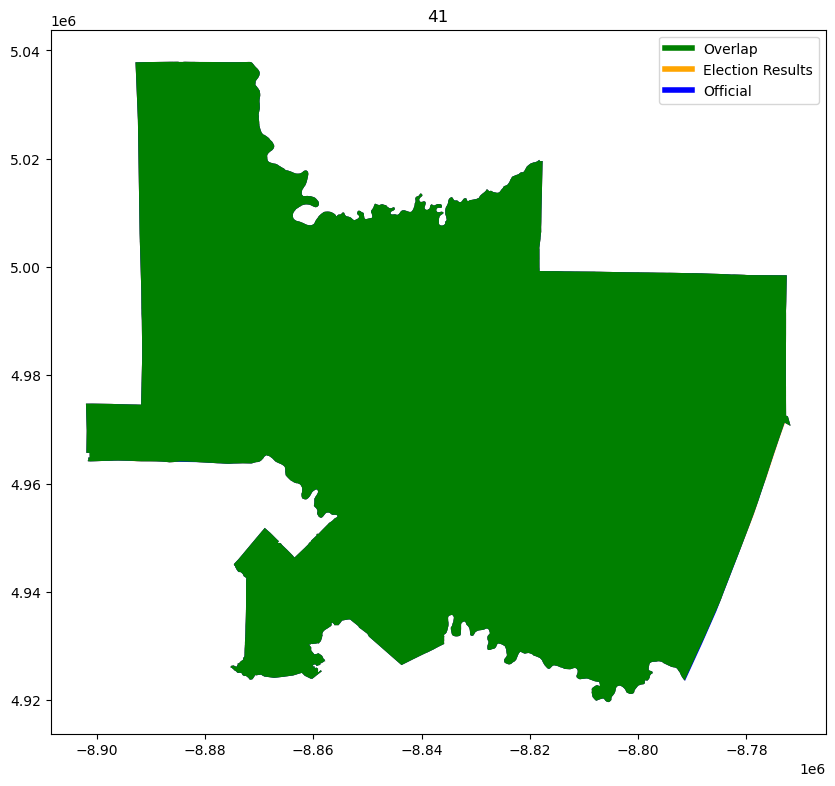

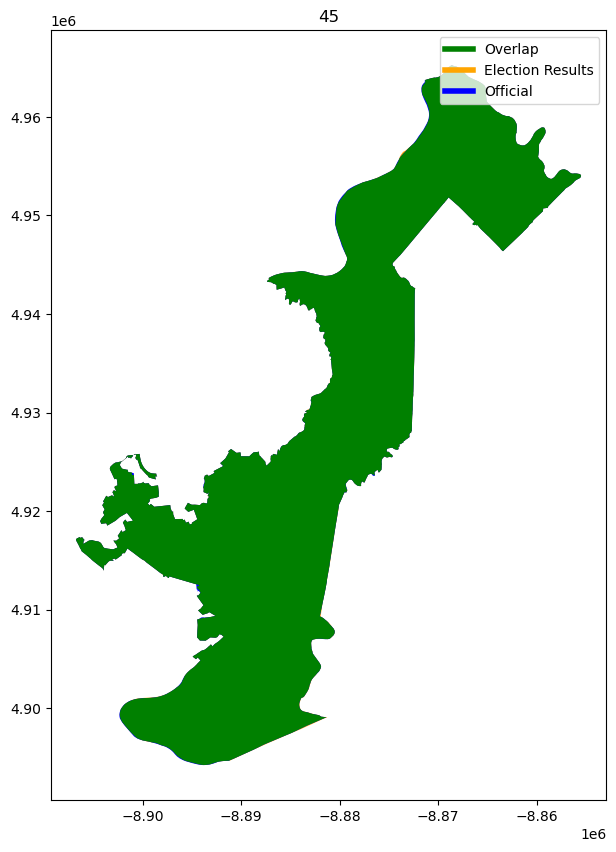

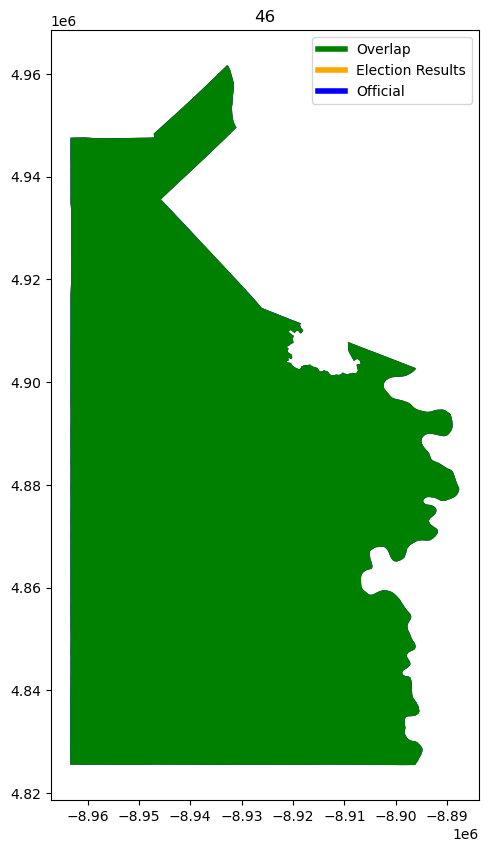

In [93]:
pdv.compare_geometries(dissolved_sldu_results, pa_sldu_districts ,"Election Results", "Official", "SLDU_DIST","districts", area_threshold=.1)


## Clean Typos

In [94]:
pa_20_sldl_prec.loc[pa_20_sldl_prec["UNIQUE_ID"].str.contains("081-:-LOYALSOCK PRECINCT 03"), "GSL083RWHE"] = 269
pa_20_sldl_prec.loc[pa_20_sldl_prec["UNIQUE_ID"].str.contains("081-:-OLD LYCOMING PRECINCT 01"), "GSL083RWHE"] = 1261
pa_20_sldl_prec.loc[pa_20_sldl_prec["UNIQUE_ID"].str.contains("081-:-SUSQUEHANNA"), "GSL083RWHE"] = 505
pa_20_sldl_prec.loc[pa_20_sldl_prec["UNIQUE_ID"].str.contains("081-:-WILLIAMSPORT WARD 02"),"GSL083RWHE"] = 261
pa_20_sldl_prec.loc[pa_20_sldl_prec["UNIQUE_ID"].str.contains("081-:-WILLIAMSPORT WARD 09"),"GSL083RWHE"] = 318

In [95]:
pa_20_sldl_prec.loc[pa_20_sldl_prec["UNIQUE_ID"].str.contains("081-:-GAMBLE"), "GSL084RHAM"] = 431
pa_20_sldl_prec.loc[pa_20_sldl_prec["UNIQUE_ID"].str.contains("081-:-JERSEY SHORE WARD 03"), "GSL084RHAM"] = 338
pa_20_sldl_prec.loc[pa_20_sldl_prec["UNIQUE_ID"].str.contains("081-:-MCINTYRE"), "GSL084RHAM"] = 185
pa_20_sldl_prec.loc[pa_20_sldl_prec["UNIQUE_ID"].str.contains("081-:-MONTOURSVILLE WARD 03"), "GSL084RHAM"] = 846
pa_20_sldl_prec.loc[pa_20_sldl_prec["UNIQUE_ID"].str.contains("081-:-PORTER"), "GSL084RHAM"] = 707

In [96]:
pa_20_sldu_prec.loc[pa_20_sldu_prec["UNIQUE_ID"].str.contains("081-:-CASCADE"), "GSU23RYAW"] = 223

In [97]:
pa_20_sldl_prec.loc[pa_20_sldl_prec["UNIQUE_ID"]==("111-:-PAINT"), "GSL071RRIG"] = 449
pa_20_sldl_prec.loc[pa_20_sldl_prec["UNIQUE_ID"]==("111-:-PAINT"), "GSL071OWRI"] = 21
pa_20_sldl_prec.loc[pa_20_sldl_prec["UNIQUE_ID"].str.contains("051-:-WHARTON"), "GSL051DJON"] = 440
pa_20_sldl_prec.loc[pa_20_sldl_prec["UNIQUE_ID"].str.contains("051-:-WHARTON"), "GSL051RDOW"] = 1260

In [98]:
pa_20_cong_prec.loc[pa_20_cong_prec["UNIQUE_ID"].str.contains("021-:-CONEMAUGH DISTRICT CENTER"), 'GCON13DROW'] = 162
pa_20_cong_prec.loc[pa_20_cong_prec["UNIQUE_ID"].str.contains("021-:-CONEMAUGH DISTRICT CENTER"), 'GCON13RJOY'] = 483

## Vote Total Checks

In [99]:
official_county_totals = pd.read_csv("./raw-from-source/cleaned_county_totals.csv")

In [100]:
official_county_totals["County Name"] = official_county_totals["County Name"].str.title()
official_county_totals["County Name"] = official_county_totals["County Name"].str.replace("Mckean", "McKean")
official_county_totals["COUNTYFP"] = official_county_totals["County Name"].map(fips_dict).fillna(official_county_totals["County Name"])
official_county_totals["COUNTYFP"] = official_county_totals["COUNTYFP"].astype(str).str.zfill(3)
official_county_totals= official_county_totals.fillna(0)


In [101]:
for col in official_county_totals.columns:
    if col != "County Name" and col != "COUNTYFP":
        official_county_totals[col] = official_county_totals[col].astype(str)
        official_county_totals[col] = official_county_totals[col].str.replace(",","")
        official_county_totals[col] = official_county_totals[col].fillna(0)
        official_county_totals[col] = official_county_totals[col].astype(float)
        official_county_totals[col] = official_county_totals[col].astype(int)

In [102]:
sldl_check_cols = [i for i in list(official_county_totals.columns) if "GSL" in i]
sldu_check_cols = [i for i in list(official_county_totals.columns) if "GSU" in i]
cong_check_cols = [i for i in list(official_county_totals.columns) if "GCON" in i]
st_check_cols = [i for i in list(official_county_totals.columns) if i not in sldl_check_cols and i not in sldu_check_cols and i not in cong_check_cols and i != "County Name" and i != "COUNTYFP"]

sldl_check_cols.sort()
sldu_check_cols.sort()
cong_check_cols.sort()
st_check_cols.sort()

In [103]:
pdv.statewide_totals_check(official_county_totals, "Official", pa_20_st_prec, "ERJ", st_check_cols)

***Statewide Totals Check***
G20ATGDSHA has a difference of 3841 votes
	Official: 3461472 votes
	ERJ: 3457631 votes
G20ATGGWEI has a difference of 167 votes
	Official: 70804 votes
	ERJ: 70637 votes
G20ATGLWAS has a difference of 322 votes
	Official: 120489 votes
	ERJ: 120167 votes
G20ATGRHEI has a difference of 3737 votes
	Official: 3153831 votes
	ERJ: 3150094 votes
G20AUDDAHM has a difference of 3487 votes
	Official: 3129131 votes
	ERJ: 3125644 votes
G20AUDGFAI has a difference of 195 votes
	Official: 78588 votes
	ERJ: 78393 votes
G20AUDLMOO has a difference of 401 votes
	Official: 205929 votes
	ERJ: 205528 votes
G20AUDRDEF has a difference of 3942 votes
	Official: 3338009 votes
	ERJ: 3334067 votes
G20PREDBID has a difference of -2081 votes
	Official: 3458229 votes
	ERJ: 3460310 votes
G20PRELJOR has a difference of -42 votes
	Official: 79380 votes
	ERJ: 79422 votes
G20PRERTRU has a difference of -422 votes
	Official: 3377674 votes
	ERJ: 3378096 votes
G20TREDTOR has a difference of 351

In [104]:
pdv.statewide_totals_check(official_county_totals, "Official", pa_20_sldu_prec, "ERJ", sldu_check_cols)


***Statewide Totals Check***
GSU01DSAV is equal 	 both dataframes 124514
GSU03DSTR is equal 	 both dataframes 90323
GSU05DSAB is equal 	 both dataframes 69514
GSU07DHUG has a difference of 53 votes
	Official: 115760 votes
	ERJ: 115707 votes
GSU09DKAN has a difference of 48 votes
	Official: 80198 votes
	ERJ: 80150 votes
GSU09RKIL has a difference of 59 votes
	Official: 74173 votes
	ERJ: 74114 votes
GSU11DSCH is equal 	 both dataframes 66735
GSU11RBAK is equal 	 both dataframes 47624
GSU13DDIA has a difference of 105 votes
	Official: 58524 votes
	ERJ: 58419 votes
GSU13RMAR has a difference of 167 votes
	Official: 73371 votes
	ERJ: 73204 votes
GSU15DSCO has a difference of 187 votes
	Official: 66632 votes
	ERJ: 66445 votes
GSU15RDIS has a difference of 162 votes
	Official: 71119 votes
	ERJ: 70957 votes
GSU17DCAP has a difference of 121 votes
	Official: 105840 votes
	ERJ: 105719 votes
GSU17RFIS has a difference of 75 votes
	Official: 54750 votes
	ERJ: 54675 votes
GSU19DCOM has a difference

In [105]:
pdv.statewide_totals_check(official_county_totals, "Official", pa_20_cong_prec, "ERJ", cong_check_cols)


***Statewide Totals Check***
GCON01DFIN is equal 	 both dataframes 191875
GCON01RFIT is equal 	 both dataframes 249804
GCON02DBOY has a difference of -128 votes
	Official: 198140 votes
	ERJ: 198268 votes
GCON02RTOR has a difference of -61 votes
	Official: 75022 votes
	ERJ: 75083 votes
GCON03DEVA has a difference of -214 votes
	Official: 341708 votes
	ERJ: 341922 votes
GCON03RHAR has a difference of -57 votes
	Official: 33671 votes
	ERJ: 33728 votes
GCON04DDEA has a difference of -8 votes
	Official: 264637 votes
	ERJ: 264645 votes
GCON04RBAR has a difference of -8 votes
	Official: 179926 votes
	ERJ: 179934 votes
GCON05DSCA has a difference of -278 votes
	Official: 255743 votes
	ERJ: 256021 votes
GCON05RPRU has a difference of -134 votes
	Official: 139552 votes
	ERJ: 139686 votes
GCON06DHOU has a difference of -105 votes
	Official: 226440 votes
	ERJ: 226545 votes
GCON06REMM has a difference of -72 votes
	Official: 177526 votes
	ERJ: 177598 votes
GCON07DWIL has a difference of -194 votes


In [106]:
pdv.statewide_totals_check(official_county_totals, "Official", pa_20_sldl_prec, "ERJ", sldl_check_cols)

***Statewide Totals Check***
GSL001DHAR has a difference of 22 votes
	Official: 17919 votes
	ERJ: 17897 votes
GSL002DMER has a difference of 20 votes
	Official: 22342 votes
	ERJ: 22322 votes
GSL003DBIZ has a difference of 21 votes
	Official: 22219 votes
	ERJ: 22198 votes
GSL003RHAY has a difference of 18 votes
	Official: 13985 votes
	ERJ: 13967 votes
GSL004RSON has a difference of 16 votes
	Official: 26762 votes
	ERJ: 26746 votes
GSL005DGON is equal 	 both dataframes 10112
GSL005RJOZ is equal 	 both dataframes 23291
GSL006DFER has a difference of 4 votes
	Official: 11286 votes
	ERJ: 11282 votes
GSL006RROA has a difference of 7 votes
	Official: 21285 votes
	ERJ: 21278 votes
GSL007DLON has a difference of 15 votes
	Official: 28297 votes
	ERJ: 28282 votes
GSL008DHEA has a difference of 10 votes
	Official: 7883 votes
	ERJ: 7873 votes
GSL008RBON has a difference of 14 votes
	Official: 23838 votes
	ERJ: 23824 votes
GSL009DSAI has a difference of 3 votes
	Official: 15180 votes
	ERJ: 15177 vot

In [107]:
pdv.county_totals_check(official_county_totals, "Official", pa_20_st_prec, "ERJ", st_check_cols,"COUNTYFP",full_print=False)


***Countywide Totals Check***

G20ATGDSHA contains differences in these counties:
	003 has a difference of 357 votes
		Official: 443523 votes
		ERJ: 443166 votes
	005 has a difference of 11 votes
		Official: 10673 votes
		ERJ: 10662 votes
	007 has a difference of 16 votes
		Official: 43446 votes
		ERJ: 43430 votes
	009 has a difference of 3 votes
		Official: 4743 votes
		ERJ: 4740 votes
	013 has a difference of 15 votes
		Official: 17511 votes
		ERJ: 17496 votes
	017 has a difference of 342 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a futur

		Official: 200335 votes
		ERJ: 199993 votes
	019 has a difference of 74 votes
		Official: 40708 votes
		ERJ: 40634 votes
	021 has a difference of 17 votes
		Official: 25441 votes
		ERJ: 25424 votes
	025 has a difference of 33 votes
		Official: 12267 votes
		ERJ: 12234 votes
	027 has a difference of 72 votes
		Official: 38198 votes
		ERJ: 38126 votes
	029 has a difference of 280 votes
		Official: 169452 votes
		ERJ: 169172 votes
	031 has a difference of 4 votes
		Official: 5561 votes
		ERJ: 5557 votes
	033 has a difference of 7 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 10751 votes
		ERJ: 10744 votes
	035 has a difference of 14 votes
		Official: 6075 votes
		ERJ: 6061 votes
	037 has a difference of 15 votes
		Official: 11705 votes
		ERJ: 11690 votes
	039 has a difference of 2 votes
		Official: 13344 votes
		ERJ: 13342 votes
	041 has a difference of 122 votes
		Official: 60141 votes
		ERJ: 60019 votes
	043 has a difference of 247 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 78651 votes
		ERJ: 78404 votes
	047 has a difference of 3 votes
		Official: 4997 votes
		ERJ: 4994 votes
	049 has a difference of 52 votes
		Official: 69548 votes
		ERJ: 69496 votes
	051 has a difference of 33 votes
		Official: 24377 votes
		ERJ: 24344 votes
	053 has a difference of 8 votes
		Official: 859 votes
		ERJ: 851 votes
	055 has a difference of 38 votes
		Official: 21874 votes
		ERJ: 21836 votes
	057 has a difference of 3 votes
		Official: 1109 votes
		ERJ: 1106 votes
	059 has a difference of 1 votes
		Official: 6227 votes
		ERJ: 6226 votes
	061 has a difference of 9 votes
		Official: 5559 votes
		ERJ: 5550 votes
	063 has a difference of 7 votes
		Official: 15013 votes
		ERJ: 15006 votes
	065 has a difference of 2 votes
		Official: 5290 votes
		ERJ: 5288 votes
	067 has a difference of 3 votes
		Official: 2648 votes
		ERJ: 2645 votes
	069 has a difference of 104 votes
		Official: 66748 votes
		ERJ: 66644 votes
	071 has a difference of 215 votes
		Official: 109568 vo

/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 73325 votes
		ERJ: 73216 votes
	081 has a difference of 38 votes
		Official: 18048 votes
		ERJ: 18010 votes
	083 has a difference of 3 votes
		Official: 4972 votes
		ERJ: 4969 votes
	085 has a difference of 8 votes
		Official: 21512 votes
		ERJ: 21504 votes
	087 has a difference of 3 votes
		Official: 4866 votes
		ERJ: 4863 votes
	089 has a difference of 172 votes
		Official: 43230 votes
		ERJ: 43058 votes
	091 has a difference of 527 votes
		Official: 313151 votes
		ERJ: 312624 votes
	093 has a difference of 2 votes
		Official: 3943 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		ERJ: 3941 votes
	095 has a difference of 225 votes
		Official: 82853 votes
		ERJ: 82628 votes
	099 has a difference of 9 votes
		Official: 6234 votes
		ERJ: 6225 votes
	105 has a difference of 3 votes
		Official: 1667 votes
		ERJ: 1664 votes
	107 has a difference of 48 votes
		Official: 24048 votes
		ERJ: 24000 votes
	109 has a difference of 6 votes
		Official: 5261 votes
		ERJ: 5255 votes
	111 has a difference of 5 votes
		Official: 9934 votes
		ERJ: 9929 votes
	113 has a difference of 1 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 1072 votes
		ERJ: 1071 votes
	115 has a difference of 130 votes
		Official: 6479 votes
		ERJ: 6349 votes
	117 has a difference of 4 votes
		Official: 4741 votes
		ERJ: 4737 votes
	119 has a difference of 5 votes
		Official: 7619 votes
		ERJ: 7614 votes
	121 has a difference of 5 votes
		Official: 8631 votes
		ERJ: 8626 votes
	123 has a difference of 2 votes
		Official: 6044 votes
		ERJ: 6042 votes
	125 has a difference of 45 votes
		Official: 50617 votes
		ERJ: 50572 votes
	127 has a difference of 16 votes
		Official: 9632 votes
		ERJ: 9616 votes
	129 has a difference of 258 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 83550 votes
		ERJ: 83292 votes
	131 has a difference of 3 votes
		Official: 5080 votes
		ERJ: 5077 votes
	133 has a difference of 101 votes
		Official: 86122 votes
		ERJ: 86021 votes
G20ATGGWEI contains differences in these counties:
	003 has a difference of 16 votes
		Official: 9236 votes
		ERJ: 9220 votes
	013 has a difference of 2 votes
		Official: 585 votes
		ERJ: 583 votes
	017 has a difference of 13 votes
		Official: 3522 votes
		ERJ: 3509 votes
	019 has a difference of 6 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 869 votes
		ERJ: 863 votes
	021 has a difference of 2 votes
		Official: 523 votes
		ERJ: 521 votes
	025 has a difference of 3 votes
		Official: 295 votes
		ERJ: 292 votes
	027 has a difference of 4 votes
		Official: 981 votes
		ERJ: 977 votes
	029 has a difference of 16 votes
		Official: 2964 votes
		ERJ: 2948 votes
	037 has a difference of 1 votes
		Official: 360 votes
		ERJ: 359 votes
	041 has a difference of 4 votes
		Official: 1301 votes
		ERJ: 1297 votes
	043 has a difference of 8 votes
		Official: 1659 votes
		ERJ: 1651 votes
	049 has a difference of 3 votes
		Official: 1765 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		ERJ: 1762 votes
	051 has a difference of 1 votes
		Official: 416 votes
		ERJ: 415 votes
	055 has a difference of 2 votes
		Official: 708 votes
		ERJ: 706 votes
	063 has a difference of 1 votes
		Official: 345 votes
		ERJ: 344 votes
	067 has a difference of 1 votes
		Official: 82 votes
		ERJ: 81 votes
	069 has a difference of 3 votes
		Official: 1205 votes
		ERJ: 1202 votes
	071 has a difference of 8 votes
		Official: 2394 votes
		ERJ: 2386 votes
	079 has a difference of 2 votes
		Official: 1388 votes
		ERJ: 1386 votes
	081 has a difference of 1 votes
		Official: 509 votes
		ERJ: 508 votes
	083 has a difference of 1 votes
		Official: 183 votes
		ERJ: 182 votes
	089 has a difference of 9 votes
		Official: 997 votes
		ERJ: 988 votes
	091 has a difference of 14 votes
		Official: 4984 votes
		ERJ: 4970 votes
	095 has a difference of 14 votes
		Official: 1860 votes
		ERJ: 1846 votes
	111 has a difference of 1 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 253 votes
		ERJ: 252 votes
	115 has a difference of 4 votes
		Official: 213 votes
		ERJ: 209 votes
	117 has a difference of 1 votes
		Official: 203 votes
		ERJ: 202 votes
	123 has a difference of 1 votes
		Official: 247 votes
		ERJ: 246 votes
	125 has a difference of 4 votes
		Official: 909 votes
		ERJ: 905 votes
	127 has a difference of 1 votes
		Official: 265 votes
		ERJ: 264 votes
	129 has a difference of 7 votes
		Official: 1436 votes
		ERJ: 1429 votes
	133 has a difference of 13 votes
		Official: 2046 votes
		ERJ: 2033 votes
G20ATGLWAS contains differences in these counties:
	003 has a difference of 34 votes
		Official: 13619 votes
		ERJ: 13585 votes
	007 has a difference of 2 votes
		Official: 1817 votes
		ERJ: 1815 votes
	013 has a difference of 4 votes
		Official: 1109 votes
		ERJ: 1105 votes
	017 has a difference of 25 votes
		Official: 6620 votes
		ERJ: 6595 votes
	019 has a difference of 8 votes
		Official: 2090 votes
		ERJ: 2082 votes
	021 has a difference of 1 

/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 997 votes
		ERJ: 996 votes
	027 has a difference of 9 votes
		Official: 1617 votes
		ERJ: 1608 votes
	029 has a difference of 25 votes
		Official: 5371 votes
		ERJ: 5346 votes
	035 has a difference of 3 votes
		Official: 309 votes
		ERJ: 306 votes
	041 has a difference of 15 votes
		Official: 2825 votes
		ERJ: 2810 votes
	043 has a difference of 28 votes
		Official: 2891 votes
		ERJ: 2863 votes
	049 has a difference of 3 votes
		Official: 2992 votes
		ERJ: 2989 votes
	051 has a difference of 1 votes
		Official: 791 votes
		ERJ: 790 votes
	053 has a difference of 1 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 38 votes
		ERJ: 37 votes
	055 has a difference of 5 votes
		Official: 1531 votes
		ERJ: 1526 votes
	057 has a difference of 1 votes
		Official: 115 votes
		ERJ: 114 votes
	061 has a difference of 1 votes
		Official: 344 votes
		ERJ: 343 votes
	063 has a difference of 1 votes
		Official: 661 votes
		ERJ: 660 votes
	067 has a difference of 1 votes
		Official: 197 votes
		ERJ: 196 votes
	069 has a difference of 7 votes
		Official: 1832 votes
		ERJ: 1825 votes
	071 has a difference of 12 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 5414 votes
		ERJ: 5402 votes
	073 has a difference of 1 votes
		Official: 776 votes
		ERJ: 775 votes
	079 has a difference of 8 votes
		Official: 2533 votes
		ERJ: 2525 votes
	081 has a difference of 3 votes
		Official: 1181 votes
		ERJ: 1178 votes
	083 has a difference of 1 votes
		Official: 365 votes
		ERJ: 364 votes
	085 has a difference of 2 votes
		Official: 1058 votes
		ERJ: 1056 votes
	087 has a difference of 1 votes
		Official: 344 votes
		ERJ: 343 votes
	089 has a difference of 14 votes
		Official: 1654 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		ERJ: 1640 votes
	091 has a difference of 28 votes
		Official: 8397 votes
		ERJ: 8369 votes
	093 has a difference of 1 votes
		Official: 222 votes
		ERJ: 221 votes
	095 has a difference of 16 votes
		Official: 3004 votes
		ERJ: 2988 votes
	099 has a difference of 2 votes
		Official: 509 votes
		ERJ: 507 votes
	107 has a difference of 9 votes
		Official: 1491 votes
		ERJ: 1482 votes
	109 has a difference of 3 votes
		Official: 321 votes
		ERJ: 318 votes
	115 has a difference of 11 votes
		Official: 395 votes
		ERJ: 384 votes
	117 has a difference of 1 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 465 votes
		ERJ: 464 votes
	121 has a difference of 1 votes
		Official: 502 votes
		ERJ: 501 votes
	125 has a difference of 3 votes
		Official: 2081 votes
		ERJ: 2078 votes
	129 has a difference of 21 votes
		Official: 3363 votes
		ERJ: 3342 votes
	131 has a difference of 1 votes
		Official: 258 votes
		ERJ: 257 votes
	133 has a difference of 8 votes
		Official: 5118 votes
		ERJ: 5110 votes
G20ATGRHEI contains differences in these counties:
	003 has a difference of 284 votes
		Official: 246537 votes
		ERJ: 246253 votes
	005 has a difference of 12 votes
		Official: 24569 votes
		ERJ: 24557 votes
	007 has a difference of 21 votes
		Official: 47316 votes
		ERJ: 47295 votes
	009 has a difference of 4 votes
		Official: 22088 votes
		ERJ: 22084 votes
	013 has a difference of 21 votes
		Official: 43933 votes
		ERJ: 43912 votes
	017 has a difference of 238 votes
		Official: 181596 votes
		ERJ: 181358 votes
	019 has a difference of 118 votes
		Official: 68477 votes
		ERJ: 68359 vote

/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 43046 votes
		ERJ: 43036 votes
	025 has a difference of 33 votes
		Official: 19932 votes
		ERJ: 19899 votes
	027 has a difference of 48 votes
		Official: 36006 votes
		ERJ: 35958 votes
	029 has a difference of 278 votes
		Official: 134649 votes
		ERJ: 134371 votes
	031 has a difference of 9 votes
		Official: 13324 votes
		ERJ: 13315 votes
	033 has a difference of 9 votes
		Official: 27318 votes
		ERJ: 27309 votes
	035 has a difference of 17 votes
		Official: 10950 votes
		ERJ: 10933 votes
	037 has a difference of 19 votes
		Official: 18010 votes
		ERJ: 17991 votes
	039 has a difference of 10 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 26766 votes
		ERJ: 26756 votes
	041 has a difference of 104 votes
		Official: 76012 votes
		ERJ: 75908 votes
	043 has a difference of 191 votes
		Official: 62622 votes
		ERJ: 62431 votes
	047 has a difference of 4 votes
		Official: 11353 votes
		ERJ: 11349 votes
	049 has a difference of 63 votes
		Official: 59664 votes
		ERJ: 59601 votes
	051 has a difference of 16 votes
		Official: 35364 votes
		ERJ: 35348 votes
	053 has a difference of 18 votes
		Official: 1695 votes
		ERJ: 1677 votes
	055 has a difference of 63 votes
		Official: 55408 votes
		ERJ: 55345 votes
	057 has a difference of 6 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 6563 votes
		ERJ: 6557 votes
	061 has a difference of 9 votes
		Official: 16455 votes
		ERJ: 16446 votes
	063 has a difference of 4 votes
		Official: 24809 votes
		ERJ: 24805 votes
	065 has a difference of 5 votes
		Official: 17002 votes
		ERJ: 16997 votes
	067 has a difference of 4 votes
		Official: 8950 votes
		ERJ: 8946 votes
	069 has a difference of 66 votes
		Official: 43289 votes
		ERJ: 43223 votes
	071 has a difference of 298 votes
		Official: 159165 votes
		ERJ: 158867 votes
	073 has a difference of 8 votes
		Official: 25399 votes
		ERJ: 25391 votes
	079 has a difference of 109 votes
		Official: 73051 votes
		ERJ: 72942 votes
	081 has a difference of 25 votes
		Official: 39148 votes
		ERJ: 39123 votes
	083 has a difference of 11 votes
		Official: 13635 votes
		ERJ: 13624 votes
	085 has a difference of 15 votes
		Official: 33973 votes
		ERJ: 33958 votes
	087 has a difference of 8 votes
		Official: 15846 votes
		ERJ: 15838 votes
	089 has a difference of 118 votes
		Of

/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 178554 votes
		ERJ: 178193 votes
	093 has a difference of 10 votes
		Official: 5424 votes
		ERJ: 5414 votes
	095 has a difference of 145 votes
		Official: 78082 votes
		ERJ: 77937 votes
	099 has a difference of 12 votes
		Official: 17483 votes
		ERJ: 17471 votes
	105 has a difference of 7 votes
		Official: 7055 votes
		ERJ: 7048 votes
	107 has a difference of 64 votes
		Official: 43511 votes
		ERJ: 43447 votes
	109 has a difference of 4 votes
		Official: 13119 votes
		ERJ: 13115 votes
	111 has a difference of 8 votes
		Official: 29488 votes
		ERJ: 29480 votes
	113 has a difference of 3 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 2380 votes
		ERJ: 2377 votes
	115 has a difference of 334 votes
		Official: 14389 votes
		ERJ: 14055 votes
	117 has a difference of 14 votes
		Official: 15345 votes
		ERJ: 15331 votes
	119 has a difference of 15 votes
		Official: 11715 votes
		ERJ: 11700 votes
	121 has a difference of 6 votes
		Official: 16862 votes
		ERJ: 16856 votes
	123 has a difference of 7 votes
		Official: 13425 votes
		ERJ: 13418 votes
	125 has a difference of 34 votes
		Official: 63881 votes
		ERJ: 63847 votes
	127 has a difference of 19 votes
		Official: 17302 votes
		ERJ: 17283 votes
	129 has a difference of 299 votes
		Official: 115208 votes
		ERJ: 114909 votes
	131 has a difference of 7 votes
		Official: 9159 votes
		ERJ: 9152 votes
	133 has a difference of 112 votes
		Official: 142637 votes
		ERJ: 142525 votes
G20AUDDAHM contains differences in these counties:
	003 has a difference of 336 votes
		Official: 397204 votes
		ERJ: 396868 votes
	005 has a difference of 10 votes
		Official: 8231 votes

/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 15256 votes
		ERJ: 15245 votes
	017 has a difference of 310 votes
		Official: 181946 votes
		ERJ: 181636 votes
	019 has a difference of 61 votes
		Official: 33274 votes
		ERJ: 33213 votes
	021 has a difference of 19 votes
		Official: 20683 votes
		ERJ: 20664 votes
	025 has a difference of 31 votes
		Official: 10575 votes
		ERJ: 10544 votes
	027 has a difference of 68 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 34946 votes
		ERJ: 34878 votes
	029 has a difference of 269 votes
		Official: 158220 votes
		ERJ: 157951 votes
	031 has a difference of 3 votes
		Official: 4247 votes
		ERJ: 4244 votes
	033 has a difference of 8 votes
		Official: 8753 votes
		ERJ: 8745 votes
	035 has a difference of 12 votes
		Official: 5127 votes
		ERJ: 5115 votes
	037 has a difference of 14 votes
		Official: 9707 votes
		ERJ: 9693 votes
	041 has a difference of 101 votes
		Official: 53297 votes
		ERJ: 53196 votes
	043 has a difference of 213 votes
		Official: 68399 votes
		ERJ: 68186 votes
	047 has a difference of 2 votes
		Official: 4248 votes
		ERJ: 4246 votes
	049 has a difference of 52 votes
		Official: 60388 votes
		ERJ: 60336 votes
	051 has a difference of 27 votes
		Official: 20428 votes
		ERJ: 20401 votes
	053 has a difference of 7 votes
		Official: 652 votes
		ERJ: 645 votes
	055 has a difference of 38 votes
		Official: 19228 votes
		ERJ: 19190 votes
	057 has a difference of 1 votes
		Official: 9

/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 11843 votes
		ERJ: 11837 votes
	065 has a difference of 2 votes
		Official: 3970 votes
		ERJ: 3968 votes
	067 has a difference of 4 votes
		Official: 2047 votes
		ERJ: 2043 votes
	069 has a difference of 86 votes
		Official: 58857 votes
		ERJ: 58771 votes
	071 has a difference of 191 votes
		Official: 101116 votes
		ERJ: 100925 votes
	073 has a difference of 3 votes
		Official: 15439 votes
		ERJ: 15436 votes
	079 has a difference of 97 votes
		Official: 62485 votes
		ERJ: 62388 votes
	081 has a difference of 35 votes
		Official: 15618 votes
		ERJ: 15583 votes
	083 has a difference of 4 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 4360 votes
		ERJ: 4356 votes
	085 has a difference of 7 votes
		Official: 19090 votes
		ERJ: 19083 votes
	087 has a difference of 2 votes
		Official: 4036 votes
		ERJ: 4034 votes
	089 has a difference of 167 votes
		Official: 40257 votes
		ERJ: 40090 votes
	091 has a difference of 473 votes
		Official: 284952 votes
		ERJ: 284479 votes
	093 has a difference of 2 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 3375 votes
		ERJ: 3373 votes
	095 has a difference of 220 votes
		Official: 76792 votes
		ERJ: 76572 votes
	099 has a difference of 8 votes
		Official: 5073 votes
		ERJ: 5065 votes
	105 has a difference of 4 votes
		Official: 1441 votes
		ERJ: 1437 votes
	107 has a difference of 45 votes
		Official: 19894 votes
		ERJ: 19849 votes
	109 has a difference of 6 votes
		Official: 4226 votes
		ERJ: 4220 votes
	111 has a difference of 6 votes
		Official: 7783 votes
		ERJ: 7777 votes
	115 has a difference of 114 votes
		Official: 5574 votes
		ERJ: 5460 votes
	117 has a difference of 4 votes
		Official: 4158 votes
		ERJ: 4154 votes
	119 has a difference of 6 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 6662 votes
		ERJ: 6656 votes
	121 has a difference of 4 votes
		Official: 6552 votes
		ERJ: 6548 votes
	123 has a difference of 2 votes
		Official: 5307 votes
		ERJ: 5305 votes
	125 has a difference of 35 votes
		Official: 42029 votes
		ERJ: 41994 votes
	127 has a difference of 13 votes
		Official: 8228 votes
		ERJ: 8215 votes
	129 has a difference of 231 votes
		Official: 68478 votes
		ERJ: 68247 votes
	131 has a difference of 3 votes
		Official: 4167 votes
		ERJ: 4164 votes
	133 has a difference of 89 votes
		Official: 77779 votes
		ERJ: 77690 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a

G20AUDGFAI contains differences in these counties:
	003 has a difference of 13 votes
		Official: 9967 votes
		ERJ: 9954 votes
	007 has a difference of 3 votes
		Official: 1096 votes
		ERJ: 1093 votes
	013 has a difference of 2 votes
		Official: 625 votes
		ERJ: 623 votes
	017 has a difference of 15 votes
		Official: 3872 votes
		ERJ: 3857 votes
	019 has a difference of 5 votes
		Official: 1022 votes
		ERJ: 1017 votes
	021 has a difference of 3 votes
		Official: 668 votes
		ERJ: 665 votes
	025 has a difference of 2 votes
		Official: 318 votes
		ERJ: 316 votes
	027 has a difference of 3 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 1015 votes
		ERJ: 1012 votes
	029 has a difference of 16 votes
		Official: 3510 votes
		ERJ: 3494 votes
	035 has a difference of 2 votes
		Official: 157 votes
		ERJ: 155 votes
	037 has a difference of 1 votes
		Official: 392 votes
		ERJ: 391 votes
	039 has a difference of 1 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 490 votes
		ERJ: 489 votes
	041 has a difference of 5 votes
		Official: 1544 votes
		ERJ: 1539 votes
	043 has a difference of 12 votes
		Official: 1863 votes
		ERJ: 1851 votes
	049 has a difference of 4 votes
		Official: 1699 votes
		ERJ: 1695 votes
	055 has a difference of 5 votes
		Official: 789 votes
		ERJ: 784 votes
	063 has a difference of 1 votes
		Official: 384 votes
		ERJ: 383 votes
	069 has a difference of 3 votes
		Official: 1532 votes
		ERJ: 1529 votes
	071 has a difference of 9 votes
		Official: 2746 votes
		ERJ: 2737 votes
	079 has a difference of 5 votes
		Official: 1668 votes
		ERJ: 1663 votes
	081 has a difference of 3 votes
		Official: 546 votes
		ERJ: 543 votes
	083 has a difference of 1 votes
		Official: 191 votes
		ERJ: 190 votes
	089 has a difference of 9 votes
		Official: 1123 votes
		ERJ: 1114 votes
	091 has a difference of 17 votes
		Official: 6252 votes
		ERJ: 6235 votes
	095 has a difference of 12 votes
		Official: 1865 votes
		ERJ: 1853 votes
	099

/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 168 votes
		ERJ: 166 votes
	111 has a difference of 1 votes
		Official: 328 votes
		ERJ: 327 votes
	115 has a difference of 3 votes
		Official: 265 votes
		ERJ: 262 votes
	117 has a difference of 1 votes
		Official: 221 votes
		ERJ: 220 votes
	121 has a difference of 1 votes
		Official: 289 votes
		ERJ: 288 votes
	123 has a difference of 1 votes
		Official: 289 votes
		ERJ: 288 votes
	125 has a difference of 3 votes
		Official: 1112 votes
		ERJ: 1109 votes
	127 has a difference of 2 votes
		Official: 335 votes
		ERJ: 333 votes
	129 has a difference of 12 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 1768 votes
		ERJ: 1756 votes
	133 has a difference of 13 votes
		Official: 2398 votes
		ERJ: 2385 votes
G20AUDLMOO contains differences in these counties:
	003 has a difference of 37 votes
		Official: 21166 votes
		ERJ: 21129 votes
	007 has a difference of 3 votes
		Official: 3562 votes
		ERJ: 3559 votes
	013 has a difference of 6 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 2072 votes
		ERJ: 2066 votes
	017 has a difference of 20 votes
		Official: 9916 votes
		ERJ: 9896 votes
	019 has a difference of 10 votes
		Official: 3632 votes
		ERJ: 3622 votes
	021 has a difference of 1 votes
		Official: 2217 votes
		ERJ: 2216 votes
	025 has a difference of 1 votes
		Official: 1175 votes
		ERJ: 1174 votes
	027 has a difference of 10 votes
		Official: 2471 votes
		ERJ: 2461 votes
	029 has a difference of 29 votes
		Official: 8128 votes
		ERJ: 8099 votes
	031 has a difference of 7 votes
		Official: 681 votes
		ERJ: 674 votes
	033 has a difference of 1 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 1513 votes
		ERJ: 1512 votes
	035 has a difference of 2 votes
		Official: 583 votes
		ERJ: 581 votes
	037 has a difference of 1 votes
		Official: 1198 votes
		ERJ: 1197 votes
	039 has a difference of 2 votes
		Official: 1405 votes
		ERJ: 1403 votes
	041 has a difference of 12 votes
		Official: 4689 votes
		ERJ: 4677 votes
	043 has a difference of 32 votes
		Official: 4838 votes
		ERJ: 4806 votes
	047 has a difference of 1 votes
		Official: 614 votes
		ERJ: 613 votes
	049 has a difference of 6 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 5865 votes
		ERJ: 5859 votes
	051 has a difference of 3 votes
		Official: 1618 votes
		ERJ: 1615 votes
	053 has a difference of 2 votes
		Official: 92 votes
		ERJ: 90 votes
	055 has a difference of 6 votes
		Official: 2767 votes
		ERJ: 2761 votes
	065 has a difference of 1 votes
		Official: 800 votes
		ERJ: 799 votes
	067 has a difference of 1 votes
		Official: 372 votes
		ERJ: 371 votes
	069 has a difference of 11 votes
		Official: 3466 votes
		ERJ: 3455 votes
	071 has a difference of 22 votes
		Official: 8543 votes
		ERJ: 8521 votes
	073 has a difference of 2 votes
		Official: 1634 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		ERJ: 1632 votes
	079 has a difference of 9 votes
		Official: 4816 votes
		ERJ: 4807 votes
	081 has a difference of 3 votes
		Official: 1966 votes
		ERJ: 1963 votes
	083 has a difference of 1 votes
		Official: 740 votes
		ERJ: 739 votes
	085 has a difference of 2 votes
		Official: 1933 votes
		ERJ: 1931 votes
	087 has a difference of 1 votes
		Official: 677 votes
		ERJ: 676 votes
	089 has a difference of 11 votes
		Official: 2792 votes
		ERJ: 2781 votes
	091 has a difference of 33 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 14857 votes
		ERJ: 14824 votes
	093 has a difference of 1 votes
		Official: 347 votes
		ERJ: 346 votes
	095 has a difference of 23 votes
		Official: 5084 votes
		ERJ: 5061 votes
	099 has a difference of 1 votes
		Official: 845 votes
		ERJ: 844 votes
	107 has a difference of 7 votes
		Official: 2852 votes
		ERJ: 2845 votes
	109 has a difference of 2 votes
		Official: 662 votes
		ERJ: 660 votes
	111 has a difference of 1 votes
		Official: 1234 votes
		ERJ: 1233 votes
	113 has a difference of 1 votes
		Official: 135 votes
		ERJ: 134 votes
	115 has a difference of 25 votes
		Official: 689 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		ERJ: 664 votes
	117 has a difference of 1 votes
		Official: 799 votes
		ERJ: 798 votes
	125 has a difference of 5 votes
		Official: 3705 votes
		ERJ: 3700 votes
	127 has a difference of 1 votes
		Official: 887 votes
		ERJ: 886 votes
	129 has a difference of 30 votes
		Official: 6029 votes
		ERJ: 5999 votes
	131 has a difference of 2 votes
		Official: 492 votes
		ERJ: 490 votes
	133 has a difference of 12 votes
		Official: 8600 votes
		ERJ: 8588 votes
G20AUDRDEF contains differences in these counties:
	003 has a difference of 293 votes
		Official: 275870 votes
		ERJ: 275577 votes
	005 has a difference of 13 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 26089 votes
		ERJ: 26076 votes
	007 has a difference of 21 votes
		Official: 52045 votes
		ERJ: 52024 votes
	009 has a difference of 4 votes
		Official: 22524 votes
		ERJ: 22520 votes
	013 has a difference of 23 votes
		Official: 44847 votes
		ERJ: 44824 votes
	017 has a difference of 272 votes
		Official: 193628 votes
		ERJ: 193356 votes
	019 has a difference of 128 votes
		Official: 72957 votes
		ERJ: 72829 votes
	021 has a difference of 7 votes
		Official: 45886 votes
		ERJ: 45879 votes
	025 has a difference of 35 votes
		Official: 20785 votes
		ERJ: 20750 votes
	027 has a difference of 51 votes
		Official: 37846 votes
		ERJ: 37795 votes
	029 has a difference of 285 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 141525 votes
		ERJ: 141240 votes
	031 has a difference of 10 votes
		Official: 14136 votes
		ERJ: 14126 votes
	033 has a difference of 7 votes
		Official: 28243 votes
		ERJ: 28236 votes
	035 has a difference of 17 votes
		Official: 11491 votes
		ERJ: 11474 votes
	037 has a difference of 19 votes
		Official: 19163 votes
		ERJ: 19144 votes
	039 has a difference of 9 votes
		Official: 27670 votes
		ERJ: 27661 votes
	041 has a difference of 124 votes
		Official: 80146 votes
		ERJ: 80022 votes
	043 has a difference of 210 votes
		Official: 69050 votes
		ERJ: 68840 votes
	047 has a difference of 4 votes
		Official: 11611 votes
		ERJ: 11607 votes
	049 has a difference of 60 votes
		Official: 64430 votes
		ERJ: 64370 votes
	051 has a difference of 21 votes
		Official: 37724 votes
		ERJ: 37703 votes
	053 has a difference of 19 votes
		Official: 1819 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		ERJ: 1800 votes
	055 has a difference of 59 votes
		Official: 56420 votes
		ERJ: 56361 votes
	057 has a difference of 9 votes
		Official: 6605 votes
		ERJ: 6596 votes
	061 has a difference of 10 votes
		Official: 16740 votes
		ERJ: 16730 votes
	063 has a difference of 5 votes
		Official: 26918 votes
		ERJ: 26913 votes
	065 has a difference of 4 votes
		Official: 17584 votes
		ERJ: 17580 votes
	067 has a difference of 4 votes
		Official: 9275 votes
		ERJ: 9271 votes
	069 has a difference of 80 votes
		Official: 47376 votes
		ERJ: 47296 votes
	071 has a difference of 307 votes
		Official: 162741 votes
		ERJ: 162434 votes
	073 has a difference of 8 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 27383 votes
		ERJ: 27375 votes
	079 has a difference of 117 votes
		Official: 79084 votes
		ERJ: 78967 votes
	081 has a difference of 25 votes
		Official: 40537 votes
		ERJ: 40512 votes
	083 has a difference of 12 votes
		Official: 13789 votes
		ERJ: 13777 votes
	085 has a difference of 16 votes
		Official: 35045 votes
		ERJ: 35029 votes
	087 has a difference of 9 votes
		Official: 16122 votes
		ERJ: 16113 votes
	089 has a difference of 124 votes
		Official: 36738 votes
		ERJ: 36614 votes
	091 has a difference of 400 votes
		Official: 195435 votes
		ERJ: 195035 votes
	093 has a difference of 10 votes
		Official: 5783 votes
		ERJ: 5773 votes
	095 has a difference of 144 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 80874 votes
		ERJ: 80730 votes
	099 has a difference of 12 votes
		Official: 18089 votes
		ERJ: 18077 votes
	105 has a difference of 6 votes
		Official: 7092 votes
		ERJ: 7086 votes
	107 has a difference of 66 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 45733 votes
		ERJ: 45667 votes
	109 has a difference of 3 votes
		Official: 13637 votes
		ERJ: 13634 votes
	111 has a difference of 6 votes
		Official: 30680 votes
		ERJ: 30674 votes
	113 has a difference of 3 votes
		Official: 2467 votes
		ERJ: 2464 votes
	115 has a difference of 326 votes
		Official: 14765 votes
		ERJ: 14439 votes
	117 has a difference of 14 votes
		Official: 15445 votes
		ERJ: 15431 votes
	119 has a difference of 15 votes
		Official: 12369 votes
		ERJ: 12354 votes
	121 has a difference of 8 votes
		Official: 18070 votes
		ERJ: 18062 votes
	123 has a difference of 7 votes
		Official: 13645 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		ERJ: 13638 votes
	125 has a difference of 42 votes
		Official: 69587 votes
		ERJ: 69545 votes
	127 has a difference of 22 votes
		Official: 17929 votes
		ERJ: 17907 votes
	129 has a difference of 310 votes
		Official: 125237 votes
		ERJ: 124927 votes
	131 has a difference of 6 votes
		Official: 9653 votes
		ERJ: 9647 votes
	133 has a difference of 121 votes
		Official: 146108 votes
		ERJ: 145987 votes
G20PREDBID contains differences in these counties:
	001 has a difference of -47 votes
		Official: 18207 votes
		ERJ: 18254 votes
	003 has a difference of -1694 votes
		Official: 429065 votes
		ERJ: 430759 votes
	011 has a difference of -221 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 92895 votes
		ERJ: 93116 votes
	045 has a difference of -286 votes
		Official: 206423 votes
		ERJ: 206709 votes
	051 has a difference of -12 votes
		Official: 20444 votes
		ERJ: 20456 votes
	053 has a difference of 13 votes
		Official: 728 votes
		ERJ: 715 votes
	077 has a difference of -210 votes
		Official: 98288 votes
		ERJ: 98498 votes
	089 has a difference of 731 votes
		Official: 44060 votes
		ERJ: 43329 votes
	097 has a difference of -26 votes
		Official: 12677 votes
		ERJ: 12703 votes
	101 has a difference of -385 votes
		Official: 603790 votes
		ERJ: 604175 votes
	103 has a difference of -33 votes
		Official: 13019 votes
		ERJ: 13052 votes
	115 has a difference of 152 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 6236 votes
		ERJ: 6084 votes
	129 has a difference of -63 votes
		Official: 72129 votes
		ERJ: 72192 votes
G20PRELJOR contains differences in these counties:
	001 has a difference of -4 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 810 votes
		ERJ: 814 votes
	003 has a difference of -17 votes
		Official: 8344 votes
		ERJ: 8361 votes
	011 has a difference of -15 votes
		Official: 2909 votes
		ERJ: 2924 votes
	045 has a difference of -5 votes
		Official: 2976 votes
		ERJ: 2981 votes
	053 has a difference of 2 votes
		Official: 36 votes
		ERJ: 34 votes
	077 has a difference of -10 votes
		Official: 2166 votes
		ERJ: 2176 votes
	089 has a difference of 13 votes
		Official: 1043 votes
		ERJ: 1030 votes
	097 has a difference of -3 votes
		Official: 654 votes
		ERJ: 657 votes
	101 has a difference of -7 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 4847 votes
		ERJ: 4854 votes
	103 has a difference of -1 votes
		Official: 322 votes
		ERJ: 323 votes
	115 has a difference of 8 votes
		Official: 309 votes
		ERJ: 301 votes
	129 has a difference of -3 votes
		Official: 2350 votes
		ERJ: 2353 votes
G20PRERTRU contains differences in these counties:
	001 has a difference of -44 votes
		Official: 37523 votes
		ERJ: 37567 votes
	003 has a difference of -589 votes
		Official: 282324 votes
		ERJ: 282913 votes
	011 has a difference of -190 votes
		Official: 109736 votes
		ERJ: 109926 votes
	039 has a difference of -1 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 28559 votes
		ERJ: 28560 votes
	045 has a difference of -107 votes
		Official: 118532 votes
		ERJ: 118639 votes
	051 has a difference of -16 votes
		Official: 41227 votes
		ERJ: 41243 votes
	053 has a difference of 18 votes
		Official: 1882 votes
		ERJ: 1864 votes
	055 has a difference of -1 votes
		Official: 57245 votes
		ERJ: 57246 votes
	077 has a difference of -159 votes
		Official: 84259 votes
		ERJ: 84418 votes
	089 has a difference of 601 votes
		Official: 38726 votes
		ERJ: 38125 votes
	097 has a difference of -23 votes
		Official: 28952 votes
		ERJ: 28975 votes
	101 has a difference of -130 votes
		Official: 132740 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		ERJ: 132870 votes
	103 has a difference of -28 votes
		Official: 19213 votes
		ERJ: 19241 votes
	115 has a difference of 328 votes
		Official: 15207 votes
		ERJ: 14879 votes
	129 has a difference of -81 votes
		Official: 130218 votes
		ERJ: 130299 votes
G20TREDTOR contains differences in these counties:
	003 has a difference of 335 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 404138 votes
		ERJ: 403803 votes
	005 has a difference of 11 votes
		Official: 8756 votes
		ERJ: 8745 votes
	007 has a difference of 12 votes
		Official: 38214 votes
		ERJ: 38202 votes
	009 has a difference of 3 votes
		Official: 4351 votes
		ERJ: 4348 votes
	013 has a difference of 13 votes
		Official: 16606 votes
		ERJ: 16593 votes
	017 has a difference of 326 votes
		Official: 191554 votes
		ERJ: 191228 votes
	019 has a difference of 63 votes
		Official: 34148 votes
		ERJ: 34085 votes
	021 has a difference of 18 votes
		Official: 23946 votes
		ERJ: 23928 votes
	025 has a difference of 31 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 11037 votes
		ERJ: 11006 votes
	027 has a difference of 64 votes
		Official: 36866 votes
		ERJ: 36802 votes
	029 has a difference of 252 votes
		Official: 163147 votes
		ERJ: 162895 votes
	031 has a difference of 3 votes
		Official: 4570 votes
		ERJ: 4567 votes
	033 has a difference of 8 votes
		Official: 10086 votes
		ERJ: 10078 votes
	035 has a difference of 12 votes
		Official: 5493 votes
		ERJ: 5481 votes
	037 has a difference of 17 votes
		Official: 11409 votes
		ERJ: 11392 votes
	039 has a difference of 1 votes
		Official: 12268 votes
		ERJ: 12267 votes
	041 has a difference of 105 votes
		Official: 55652 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		ERJ: 55547 votes
	043 has a difference of 212 votes
		Official: 72586 votes
		ERJ: 72374 votes
	047 has a difference of 2 votes
		Official: 4730 votes
		ERJ: 4728 votes
	049 has a difference of 46 votes
		Official: 64440 votes
		ERJ: 64394 votes
	051 has a difference of 26 votes
		Official: 21537 votes
		ERJ: 21511 votes
	053 has a difference of 6 votes
		Official: 699 votes
		ERJ: 693 votes
	055 has a difference of 36 votes
		Official: 20123 votes
		ERJ: 20087 votes
	057 has a difference of 4 votes
		Official: 1044 votes
		ERJ: 1040 votes
	059 has a difference of 1 votes
		Official: 5415 votes
		ERJ: 5414 votes
	061 has a difference of 8 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 5169 votes
		ERJ: 5161 votes
	063 has a difference of 7 votes
		Official: 12850 votes
		ERJ: 12843 votes
	065 has a difference of 3 votes
		Official: 4555 votes
		ERJ: 4552 votes
	067 has a difference of 4 votes
		Official: 2236 votes
		ERJ: 2232 votes
	069 has a difference of 89 votes
		Official: 61104 votes
		ERJ: 61015 votes
	071 has a difference of 193 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 101861 votes
		ERJ: 101668 votes
	073 has a difference of 3 votes
		Official: 16634 votes
		ERJ: 16631 votes
	079 has a difference of 97 votes
		Official: 65889 votes
		ERJ: 65792 votes
	081 has a difference of 38 votes
		Official: 15951 votes
		ERJ: 15913 votes
	083 has a difference of 4 votes
		Official: 4543 votes
		ERJ: 4539 votes
	085 has a difference of 9 votes
		Official: 19940 votes
		ERJ: 19931 votes
	087 has a difference of 3 votes
		Official: 4371 votes
		ERJ: 4368 votes
	089 has a difference of 168 votes
		Official: 41036 votes
		ERJ: 40868 votes
	091 has a difference of 478 votes
		Official: 297179 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		ERJ: 296701 votes
	093 has a difference of 3 votes
		Official: 3561 votes
		ERJ: 3558 votes
	095 has a difference of 216 votes
		Official: 79191 votes
		ERJ: 78975 votes
	099 has a difference of 8 votes
		Official: 5444 votes
		ERJ: 5436 votes
	105 has a difference of 3 votes
		Official: 1498 votes
		ERJ: 1495 votes
	107 has a difference of 43 votes
		Official: 20685 votes
		ERJ: 20642 votes
	109 has a difference of 4 votes
		Official: 4416 votes
		ERJ: 4412 votes
	111 has a difference of 5 votes
		Official: 9046 votes
		ERJ: 9041 votes
	115 has a difference of 118 votes
		Official: 5704 votes
		ERJ: 5586 votes
	117 has a difference of 4 votes
		Official: 4255 votes
		ERJ: 4251 votes
	119 has a difference of 7 votes
		Official: 6769 votes
		ERJ: 6762 votes
	121 has a difference of 7 votes
		Official: 7033 votes
		ERJ: 7026 votes
	123 has a difference of 2 votes
		Official: 5682 votes
		ERJ: 5680 votes
	125 has a difference of 36 votes
		Official: 44477 votes
		ERJ: 44441 votes
	127 h

/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

G20TREGRUN contains differences in these counties:
	003 has a difference of 15 votes
		Official: 10711 votes
		ERJ: 10696 votes
	007 has a difference of 1 votes
		Official: 1106 votes
		ERJ: 1105 votes
	013 has a difference of 2 votes
		Official: 636 votes
		ERJ: 634 votes
	017 has a difference of 11 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 3753 votes
		ERJ: 3742 votes
	019 has a difference of 4 votes
		Official: 1056 votes
		ERJ: 1052 votes
	021 has a difference of 2 votes
		Official: 575 votes
		ERJ: 573 votes
	025 has a difference of 2 votes
		Official: 329 votes
		ERJ: 327 votes
	027 has a difference of 4 votes
		Official: 1136 votes
		ERJ: 1132 votes
	029 has a difference of 23 votes
		Official: 3394 votes
		ERJ: 3371 votes
	033 has a difference of 1 votes
		Official: 358 votes
		ERJ: 357 votes
	035 has a difference of 1 votes
		Official: 175 votes
		ERJ: 174 votes
	037 has a difference of 1 votes
		Official: 416 votes
		ERJ: 415 votes
	039 has a difference of 1 votes
		Official: 483 votes
		ERJ: 482 votes
	041 has a difference of 4 votes
		Official: 1871 votes
		ERJ: 1867 votes
	043 has a difference of 13 votes
		Official: 2313 votes
		ERJ: 2300 votes
	049 has a difference of 4 votes
		Official: 1601 votes
		ERJ: 1597 votes
	055 has a difference of 5 votes
		Official: 862 votes
		ERJ: 857 votes
	069 has 

/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		ERJ: 1566 votes
	083 has a difference of 4 votes
		Official: 203 votes
		ERJ: 199 votes
	089 has a difference of 11 votes
		Official: 1167 votes
		ERJ: 1156 votes
	091 has a difference of 15 votes
		Official: 5855 votes
		ERJ: 5840 votes
	095 has a difference of 11 votes
		Official: 1946 votes
		ERJ: 1935 votes
	099 has a difference of 2 votes
		Official: 302 votes
		ERJ: 300 votes
	107 has a difference of 1 votes
		Official: 963 votes
		ERJ: 962 votes
	109 has a difference of 1 votes
		Official: 245 votes
		ERJ: 244 votes
	115 has a difference of 4 votes
		Official: 254 votes
		ERJ: 250 votes
	117 has a difference of 1 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 202 votes
		ERJ: 201 votes
	121 has a difference of -24 votes
		Official: 336 votes
		ERJ: 360 votes
	123 has a difference of 1 votes
		Official: 217 votes
		ERJ: 216 votes
	125 has a difference of 1 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 1101 votes
		ERJ: 1100 votes
	127 has a difference of 1 votes
		Official: 317 votes
		ERJ: 316 votes
	129 has a difference of 6 votes
		Official: 1815 votes
		ERJ: 1809 votes
	133 has a difference of 10 votes
		Official: 3267 votes
		ERJ: 3257 votes
G20TRELSOL contains differences in these counties:
	003 has a difference of 40 votes
		Official: 17176 votes
		ERJ: 17136 votes
	005 has a difference of 1 votes
		Official: 1009 votes
		ERJ: 1008 votes
	007 has a difference of 4 votes
		Official: 2421 votes
		ERJ: 2417 votes
	013 has a difference of 5 votes
		Official: 1279 votes
		ERJ: 1274 votes
	017 has a difference of 15 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 7662 votes
		ERJ: 7647 votes
	019 has a difference of 9 votes
		Official: 2830 votes
		ERJ: 2821 votes
	021 has a difference of 1 votes
		Official: 1322 votes
		ERJ: 1321 votes
	027 has a difference of 7 votes
		Official: 1978 votes
		ERJ: 1971 votes
	029 has a difference of 30 votes
		Official: 6129 votes
		ERJ: 6099 votes
	035 has a difference of 2 votes
		Official: 371 votes
		ERJ: 369 votes
	041 has a difference of 15 votes
		Official: 3637 votes
		ERJ: 3622 votes
	043 has a difference of 30 votes
		Official: 3553 votes
		ERJ: 3523 votes
	047 has a difference of 1 votes
		Official: 405 votes
		ERJ: 404 votes
	049 has a difference of 6 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 4870 votes
		ERJ: 4864 votes
	051 has a difference of 3 votes
		Official: 1091 votes
		ERJ: 1088 votes
	053 has a difference of 3 votes
		Official: 62 votes
		ERJ: 59 votes
	055 has a difference of 5 votes
		Official: 1861 votes
		ERJ: 1856 votes
	057 has a difference of 1 votes
		Official: 123 votes
		ERJ: 122 votes
	061 has a difference of 1 votes
		Official: 462 votes
		ERJ: 461 votes
	063 has a difference of 1 votes
		Official: 981 votes
		ERJ: 980 votes
	067 has a difference of 1 votes
		Official: 208 votes
		ERJ: 207 votes
	069 has a difference of 10 votes
		Official: 2497 votes
		ERJ: 2487 votes
	071 has a difference of 20 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 6229 votes
		ERJ: 6209 votes
	073 has a difference of 2 votes
		Official: 988 votes
		ERJ: 986 votes
	079 has a difference of 10 votes
		Official: 3261 votes
		ERJ: 3251 votes
	081 has a difference of 7 votes
		Official: 1284 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		ERJ: 1277 votes
	083 has a difference of 2 votes
		Official: 433 votes
		ERJ: 431 votes
	085 has a difference of 2 votes
		Official: 1245 votes
		ERJ: 1243 votes
	087 has a difference of 1 votes
		Official: 446 votes
		ERJ: 445 votes
	089 has a difference of 12 votes
		Official: 1888 votes
		ERJ: 1876 votes
	091 has a difference of 31 votes
		Official: 10370 votes
		ERJ: 10339 votes
	093 has a difference of 1 votes
		Official: 248 votes
		ERJ: 247 votes
	095 has a difference of 24 votes
		Official: 3963 votes
		ERJ: 3939 votes
	099 has a difference of 2 votes
		Official: 626 votes
		ERJ: 624 votes
	107 has a difference of 8 votes
		Official: 1757 votes
		ERJ: 1749 votes
	109 has a difference of 3 votes
		Official: 385 votes
		ERJ: 382 votes
	113 has a difference of 1 votes
		Official: 80 votes
		ERJ: 79 votes
	115 has a difference of 16 votes
		Official: 484 votes
		ERJ: 468 votes
	117 has a difference of 1 votes
		Official: 574 votes
		ERJ: 573 votes
	119 has a difference of 2 votes

/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 5999 votes
		ERJ: 5981 votes
G20TRERGAR contains differences in these counties:
	003 has a difference of 285 votes
		Official: 270964 votes
		ERJ: 270679 votes
	005 has a difference of 11 votes
		Official: 25875 votes
		ERJ: 25864 votes
	007 has a difference of 21 votes
		Official: 51292 votes
		ERJ: 51271 votes
	009 has a difference of 4 votes
		Official: 22272 votes
		ERJ: 22268 votes
	013 has a difference of 20 votes
		Official: 44464 votes
		ERJ: 44444 votes
	017 has a difference of 266 votes
		Official: 187154 votes
		ERJ: 186888 votes
	019 has a difference of 131 votes
		Official: 73020 votes
		ERJ: 72889 votes
	021 has a difference of 9 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a fu

		Official: 43698 votes
		ERJ: 43689 votes
	025 has a difference of 36 votes
		Official: 20798 votes
		ERJ: 20762 votes
	027 has a difference of 57 votes
		Official: 36303 votes
		ERJ: 36246 votes
	029 has a difference of 286 votes
		Official: 138083 votes
		ERJ: 137797 votes
	031 has a difference of 10 votes
		Official: 13992 votes
		ERJ: 13982 votes
	033 has a difference of 7 votes
		Official: 27576 votes
		ERJ: 27569 votes
	035 has a difference of 18 votes
		Official: 11379 votes
		ERJ: 11361 votes
	037 has a difference of 18 votes
		Official: 18126 votes
		ERJ: 18108 votes
	039 has a difference of 10 votes
		Official: 27299 votes
		ERJ: 27289 votes
	041 has a difference of 116 votes
		Official: 78424 votes
		ERJ: 78308 votes
	043 has a difference of 214 votes
		Official: 65729 votes
		ERJ: 65515 votes
	047 has a difference of 4 votes
		Official: 11391 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		ERJ: 11387 votes
	049 has a difference of 68 votes
		Official: 62029 votes
		ERJ: 61961 votes
	051 has a difference of 20 votes
		Official: 37111 votes
		ERJ: 37091 votes
	053 has a difference of 18 votes
		Official: 1812 votes
		ERJ: 1794 votes
	055 has a difference of 62 votes
		Official: 56387 votes
		ERJ: 56325 votes
	057 has a difference of 6 votes
		Official: 6563 votes
		ERJ: 6557 votes
	061 has a difference of 10 votes
		Official: 16603 votes
		ERJ: 16593 votes
	063 has a difference of 5 votes
		Official: 26431 votes
		ERJ: 26426 votes
	065 has a difference of 4 votes
		Official: 17587 votes
		ERJ: 17583 votes
	067 has a difference of 4 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 9235 votes
		ERJ: 9231 votes
	069 has a difference of 76 votes
		Official: 46677 votes
		ERJ: 46601 votes
	071 has a difference of 307 votes
		Official: 163477 votes
		ERJ: 163170 votes
	073 has a difference of 8 votes
		Official: 26984 votes
		ERJ: 26976 votes
	079 has a difference of 118 votes
		Official: 77304 votes
		ERJ: 77186 votes
	081 has a difference of 22 votes
		Official: 40665 votes
		ERJ: 40643 votes
	083 has a difference of 11 votes
		Official: 13921 votes
		ERJ: 13910 votes
	085 has a difference of 14 votes
		Official: 34913 votes
		ERJ: 34899 votes
	087 has a difference of 8 votes
		Official: 16065 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		ERJ: 16057 votes
	089 has a difference of 122 votes
		Official: 36803 votes
		ERJ: 36681 votes
	091 has a difference of 402 votes
		Official: 189613 votes
		ERJ: 189211 votes
	093 has a difference of 9 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 5717 votes
		ERJ: 5708 votes
	095 has a difference of 147 votes
		Official: 79907 votes
		ERJ: 79760 votes
	099 has a difference of 11 votes
		Official: 17928 votes
		ERJ: 17917 votes
	105 has a difference of 7 votes
		Official: 7165 votes
		ERJ: 7158 votes
	107 has a difference of 67 votes
		Official: 46088 votes
		ERJ: 46021 votes
	109 has a difference of 5 votes
		Official: 13737 votes
		ERJ: 13732 votes
	111 has a difference of 9 votes
		Official: 30050 votes
		ERJ: 30041 votes
	113 has a difference of 3 votes
		Official: 2522 votes
		ERJ: 2519 votes
	115 has a difference of 340 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 14957 votes
		ERJ: 14617 votes
	117 has a difference of 14 votes
		Official: 15661 votes
		ERJ: 15647 votes
	119 has a difference of 13 votes
		Official: 12451 votes
		ERJ: 12438 votes
	121 has a difference of 6 votes
		Official: 18001 votes
		ERJ: 17995 votes
	123 has a difference of 7 votes
		Official: 13599 votes
		ERJ: 13592 votes
	125 has a difference of 44 votes
		Official: 68257 votes
		ERJ: 68213 votes
	127 has a difference of 20 votes
		Official: 18233 votes
		ERJ: 18213 votes
	129 has a difference of 317 votes
		Official: 123694 votes
		ERJ: 123377 votes
	131 has a difference of 7 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 9751 votes
		ERJ: 9744 votes
	133 has a difference of 114 votes
		Official: 146529 votes
		ERJ: 146415 votes

['001', '003', '005', '007', '009', '011', '013', '017', '019', '021', '025', '027', '029', '031', '033', '035', '037', '039', '041', '043', '045', '047', '049', '051', '053', '055', '057', '059', '061', '063', '065', '067', '069', '071', '073', '077', '079', '081', '083', '085', '087', '089', '091', '093', '095', '097', '099', '101', '103', '105', '107', '109', '111', '113', '115', '117', '119', '121', '123', '125', '127', '129', '131', '133']


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")


In [108]:
pdv.county_totals_check(official_county_totals, "Official", pa_20_sldu_prec, "ERJ", sldu_check_cols,"COUNTYFP",full_print=False)


***Countywide Totals Check***

GSU01DSAV is equal across all counties
GSU03DSTR is equal across all counties
GSU05DSAB is equal across all counties
GSU07DHUG contains differences in these counties:
	091 has a difference of 53 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a futur

		Official: 28712 votes
		ERJ: 28659 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a

GSU09DKAN contains differences in these counties:
	029 has a difference of 48 votes
		Official: 29509 votes
		ERJ: 29461 votes
GSU09RKIL contains differences in these counties:
	029 has a difference of 59 votes
		Official: 28988 votes
		ERJ: 28929 votes
GSU11DSCH is equal across all counties
GSU11RBAK is equal across all counties


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a futur

GSU13DDIA contains differences in these counties:
	071 has a difference of 105 votes
		Official: 58524 votes
		ERJ: 58419 votes
GSU13RMAR contains differences in these counties:
	071 has a difference of 167 votes
		Official: 73371 votes
		ERJ: 73204 votes
GSU15DSCO contains differences in these counties:
	043 has a difference of 177 votes
		Official: 60547 votes
		ERJ: 60370 votes
	099 has a difference of 10 votes
		Official: 6085 votes
		ERJ: 6075 votes
GSU15RDIS contains differences in these counties:
	043 has a difference of 149 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a

		Official: 52829 votes
		ERJ: 52680 votes
	099 has a difference of 13 votes
		Official: 18290 votes
		ERJ: 18277 votes
GSU17DCAP contains differences in these counties:
	091 has a difference of 121 votes
		Official: 74333 votes
		ERJ: 74212 votes
GSU17RFIS contains differences in these counties:
	091 has a difference of 75 votes
		Official: 35306 votes
		ERJ: 35231 votes
GSU19DCOM contains differences in these counties:
	029 has a difference of 142 votes
		Official: 88996 votes
		ERJ: 88854 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a fu

GSU19RRUN contains differences in these counties:
	029 has a difference of 140 votes
		Official: 65836 votes
		ERJ: 65696 votes
GSU21DSTR contains differences in these counties:
	019 has a difference of 46 votes
		Official: 24306 votes
		ERJ: 24260 votes
	031 has a difference of 4 votes
		Official: 4240 votes
		ERJ: 4236 votes
	053 has a difference of 8 votes
		Official: 663 votes
		ERJ: 655 votes
	121 has a difference of -96 votes
		Official: 6103 votes
		ERJ: 6199 votes
	123 has a difference of 3 votes
		Official: 5258 votes
		ERJ: 5255 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a fu

GSU21RHUT contains differences in these counties:
	019 has a difference of 97 votes
		Official: 48283 votes
		ERJ: 48186 votes
	031 has a difference of 9 votes
		Official: 14999 votes
		ERJ: 14990 votes
	053 has a difference of 19 votes
		Official: 1957 votes
		ERJ: 1938 votes
	121 has a difference of 9 votes
		Official: 20209 votes
		ERJ: 20200 votes
	123 has a difference of 7 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 13179 votes
		ERJ: 13172 votes
GSU23DBAK contains differences in these counties:
	081 has a difference of 36 votes
		Official: 15161 votes
		ERJ: 15125 votes
	115 has a difference of 61 votes
		Official: 2094 votes
		ERJ: 2033 votes
	119 has a difference of 7 votes
		Official: 6901 votes
		ERJ: 6894 votes
GSU23RYAW contains differences in these counties:
	081 has a difference of 32 votes
		Official: 43299 votes
		ERJ: 43267 votes
	113 has a difference of 4 votes
		Official: 2715 votes
		ERJ: 2711 votes
	115 has a difference of 135 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 5694 votes
		ERJ: 5559 votes
	119 has a difference of 14 votes
		Official: 12969 votes
		ERJ: 12955 votes
GSU25DBRO contains differences in these counties:
	033 has a difference of 5 votes
		Official: 3099 votes
		ERJ: 3094 votes
	035 has a difference of 13 votes
		Official: 5675 votes
		ERJ: 5662 votes
	047 has a difference of 2 votes
		Official: 4954 votes
		ERJ: 4952 votes
	065 has a difference of 3 votes
		Official: 4034 votes
		ERJ: 4031 votes
	083 has a difference of 6 votes
		Official: 5332 votes
		ERJ: 5326 votes
	105 has a difference of 4 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 1803 votes
		ERJ: 1799 votes
	117 has a difference of 5 votes
		Official: 5027 votes
		ERJ: 5022 votes
GSU25RDUS contains differences in these counties:
	033 has a difference of 4 votes
		Official: 8361 votes
		ERJ: 8357 votes
	035 has a difference of 20 votes
		Official: 11749 votes
		ERJ: 11729 votes
	047 has a difference of 5 votes
		Official: 11750 votes
		ERJ: 11745 votes
	065 has a difference of 4 votes
		Official: 18694 votes
		ERJ: 18690 votes
	083 has a difference of 12 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 13883 votes
		ERJ: 13871 votes
	105 has a difference of 6 votes
		Official: 7123 votes
		ERJ: 7117 votes
	117 has a difference of 15 votes
		Official: 15706 votes
		ERJ: 15691 votes
GSU27DSIE contains differences in these counties:
	037 has a difference of 12 votes
		Official: 8804 votes
		ERJ: 8792 votes
	079 has a difference of 14 votes
		Official: 3994 votes
		ERJ: 3980 votes
	093 has a difference of 2 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 3224 votes
		ERJ: 3222 votes
	109 has a difference of 7 votes
		Official: 4473 votes
		ERJ: 4466 votes
GSU27RGOR contains differences in these counties:
	037 has a difference of 23 votes
		Official: 22075 votes
		ERJ: 22052 votes
	079 has a difference of 20 votes
		Official: 10899 votes
		ERJ: 10879 votes
	093 has a difference of 11 votes
		Official: 6397 votes
		ERJ: 6386 votes
	109 has a difference of 5 votes
		Official: 14294 votes
		ERJ: 14289 votes
GSU29RARG contains differences in these counties:
	107 has a difference of 105 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 59754 votes
		ERJ: 59649 votes
GSU31DDAN contains differences in these counties:
	041 has a difference of 83 votes
		Official: 49563 votes
		ERJ: 49480 votes
	133 has a difference of 17 votes
		Official: 12560 votes
		ERJ: 12543 votes
GSU31RREG contains differences in these counties:
	041 has a difference of 112 votes
		Official: 66030 votes
		ERJ: 65918 votes
	133 has a difference of 32 votes
		Official: 29198 votes
		ERJ: 29166 votes
GSU33DSTE contains differences in these counties:
	041 has a difference of 9 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 2201 votes
		ERJ: 2192 votes
	055 has a difference of 32 votes
		Official: 17118 votes
		ERJ: 17086 votes
	133 has a difference of 6 votes
		Official: 6691 votes
		ERJ: 6685 votes
GSU33RMAS contains differences in these counties:
	041 has a difference of 8 votes
		Official: 4051 votes
		ERJ: 4043 votes
	055 has a difference of 44 votes
		Official: 40163 votes
		ERJ: 40119 votes
	133 has a difference of 16 votes
		Official: 13966 votes
		ERJ: 13950 votes
GSU35DDOU contains differences in these counties:
	009 has a difference of 203 votes
		Official: 4394 votes
		ERJ: 4191 votes
	021 has a difference of 20 votes
		Official: 21534 votes
		ERJ: 21514 votes
	033 has a difference of 3 votes
		Official: 6866 votes
		ERJ: 6863 votes
GSU35RLAN contains differences in these counties:
	009 has a difference of 4 votes
		Official: 22807 votes
		ERJ: 22803 votes
	021 has a difference of 9 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 48421 votes
		ERJ: 48412 votes
	033 has a difference of 4 votes
		Official: 20367 votes
		ERJ: 20363 votes
GSU37DIOV contains differences in these counties:
	003 has a difference of 79 votes
		Official: 79299 votes
		ERJ: 79220 votes
	125 has a difference of 9 votes
		Official: 5283 votes
		ERJ: 5274 votes
GSU37RROB contains differences in these counties:
	003 has a difference of 102 votes
		Official: 82124 votes
		ERJ: 82022 votes
	125 has a difference of 16 votes
		Official: 9903 votes
		ERJ: 9887 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

GSU39DWAL contains differences in these counties:
	129 has a difference of 145 votes
		Official: 44768 votes
		ERJ: 44623 votes
GSU39RWAR contains differences in these counties:
	129 has a difference of 223 votes
		Official: 93310 votes
		ERJ: 93087 votes
GSU41DDEL contains differences in these counties:
	005 has a difference of 12 votes
		Official: 7949 votes
		ERJ: 7937 votes
	019 has a difference of 12 votes
		Official: 7023 votes
		ERJ: 7011 votes
	063 has a difference of 6 votes
		Official: 11714 votes
		ERJ: 11708 votes
	129 has a difference of 29 votes
		Official: 7924 votes
		ERJ: 7895 votes
GSU41RPIT contains differences in these counties:
	005 has a difference of 11 votes
		Official: 27708 votes
		ERJ: 27697 votes
	019 has a difference of 22 votes
		Official: 21063 votes
		ERJ: 21041 votes
	063 has a difference of 6 votes
		Official: 28911 votes
		ERJ: 28905 votes
	129 has a difference of 46 votes
		Official: 14860 votes
		ERJ: 14814 votes
GSU43DCOS contains differences in th

/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a fu

GSU45DBRE contains differences in these counties:
	003 has a difference of 33 votes
		Official: 57815 votes
		ERJ: 57782 votes
	129 has a difference of 30 votes
		Official: 8446 votes
		ERJ: 8416 votes
GSU45RZIC contains differences in these counties:
	003 has a difference of 27 votes
		Official: 51588 votes
		ERJ: 51561 votes
	129 has a difference of 40 votes
		Official: 14604 votes
		ERJ: 14564 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a futur

GSU47DKRI contains differences in these counties:
	007 has a difference of 9 votes
		Official: 27206 votes
		ERJ: 27197 votes
	019 has a difference of 6 votes
		Official: 2966 votes
		ERJ: 2960 votes
	073 has a difference of 5 votes
		Official: 14423 votes
		ERJ: 14418 votes
GSU47RVOG contains differences in these counties:
	007 has a difference of 20 votes
		Official: 50443 votes
		ERJ: 50423 votes
	019 has a difference of 16 votes
		Official: 7284 votes
		ERJ: 7268 votes
	073 has a difference of 8 votes
		Official: 30692 votes
		ERJ: 30684 votes
GSU49DSLO contains differences in these counties:
	049 has a difference of 40 votes
		Official: 46907 votes
		ERJ: 46867 votes
GSU49RLAU contains differences in these counties:
	049 has a difference of 75 votes
		Official: 69818 votes
		ERJ: 69743 votes

['003', '005', '007', '009', '019', '021', '029', '031', '033', '035', '037', '041', '043', '047', '049', '053', '055', '063', '065', '071', '073', '079', '081', '083', '091', '093', '099', '

/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a

In [109]:
pdv.county_totals_check(official_county_totals, "Official", pa_20_cong_prec, "ERJ", cong_check_cols,"COUNTYFP",full_print=False)


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a futur

***Countywide Totals Check***

GCON01DFIN is equal across all counties
GCON01RFIT is equal across all counties
GCON02DBOY contains differences in these counties:
	101 has a difference of -128 votes
		Official: 198140 votes
		ERJ: 198268 votes
GCON02RTOR contains differences in these counties:
	101 has a difference of -61 votes
		Official: 75022 votes
		ERJ: 75083 votes
GCON03DEVA contains differences in these counties:
	101 has a difference of -214 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a futur

		Official: 341708 votes
		ERJ: 341922 votes
GCON03RHAR contains differences in these counties:
	101 has a difference of -57 votes
		Official: 33671 votes
		ERJ: 33728 votes
GCON04DDEA contains differences in these counties:
	011 has a difference of -8 votes
		Official: 3851 votes
		ERJ: 3859 votes
GCON04RBAR contains differences in these counties:
	011 has a difference of -8 votes
		Official: 6954 votes
		ERJ: 6962 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a futur

GCON05DSCA contains differences in these counties:
	045 has a difference of -259 votes
		Official: 201146 votes
		ERJ: 201405 votes
	101 has a difference of -19 votes
		Official: 37089 votes
		ERJ: 37108 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a futur

GCON05RPRU contains differences in these counties:
	045 has a difference of -125 votes
		Official: 122176 votes
		ERJ: 122301 votes
	101 has a difference of -9 votes
		Official: 12639 votes
		ERJ: 12648 votes
GCON06DHOU contains differences in these counties:
	011 has a difference of -105 votes
		Official: 50759 votes
		ERJ: 50864 votes
GCON06REMM contains differences in these counties:
	011 has a difference of -72 votes
		Official: 40590 votes
		ERJ: 40662 votes
GCON07DWIL contains differences in these counties:
	077 has a difference of -194 votes
		Official: 96835 votes
		ERJ: 97029 votes
GCON07RSCH contains differences in these counties:
	077 has a difference of -175 votes
		Official: 85219 votes
		ERJ: 85394 votes
GCON08DCAR contains differences in these counties:
	103 has a difference of -35 votes
		Official: 13317 votes
		ERJ: 13352 votes
GCON08RBOG contains differences in these counties:
	103 has a difference of -26 votes
		Official: 18821 votes
		ERJ: 18847 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a fu

GCON09DWEG contains differences in these counties:
	011 has a difference of -100 votes
		Official: 39029 votes
		ERJ: 39129 votes
	097 has a difference of -6 votes
		Official: 4430 votes
		ERJ: 4436 votes
GCON09RMEU contains differences in these counties:
	011 has a difference of -128 votes
		Official: 61232 votes
		ERJ: 61360 votes
	097 has a difference of -8 votes
		Official: 9234 votes
		ERJ: 9242 votes
GCON10DDEP is equal across all counties
GCON10RPER is equal across all counties


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

GCON11DHAM is equal across all counties
GCON11RSMU is equal across all counties
GCON12DGRI contains differences in these counties:
	097 has a difference of -17 votes
		Official: 7252 votes
		ERJ: 7269 votes
	115 has a difference of 147 votes
		Official: 5849 votes
		ERJ: 5702 votes
GCON12RKEL contains differences in these counties:
	097 has a difference of -17 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a futur

		Official: 20784 votes
		ERJ: 20801 votes
	115 has a difference of 318 votes
		Official: 15612 votes
		ERJ: 15294 votes
GCON13DROW contains differences in these counties:
	001 has a difference of -43 votes
		Official: 17349 votes
		ERJ: 17392 votes
	009 has a difference of 300 votes
		Official: 4234 votes
		ERJ: 3934 votes
	129 has a difference of -9 votes
		Official: 6902 votes
		ERJ: 6911 votes
GCON13RJOY contains differences in these counties:
	001 has a difference of -48 votes
		Official: 38329 votes
		ERJ: 38377 votes
	129 has a difference of -4 votes
		Official: 15742 votes
		ERJ: 15746 votes
GCON14DMAR contains differences in these counties:
	051 has a difference of 13 votes
		Official: 20727 votes
		ERJ: 20714 votes
	129 has a difference of -48 votes
		Official: 62740 votes
		ERJ: 62788 votes
GCON14RRES contains differences in these counties:
	051 has a difference of 8 votes
		Official: 39730 votes
		ERJ: 39722 votes
	129 has a difference of -80 votes
		Official: 116207 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a fu

		Official: 13031 votes
		ERJ: 13032 votes
	033 has a difference of 5 votes
		Official: 8964 votes
		ERJ: 8959 votes
	053 has a difference of 12 votes
		Official: 684 votes
		ERJ: 672 votes
GCON15RTHO contains differences in these counties:
	027 has a difference of -1 votes
		Official: 22053 votes
		ERJ: 22054 votes
	033 has a difference of 3 votes
		Official: 30031 votes
		ERJ: 30028 votes
	053 has a difference of 20 votes
		Official: 1934 votes
		ERJ: 1914 votes
GCON16DGNI is equal across all counties


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

GCON16RKEL contains differences in these counties:
	039 has a difference of 1 votes
		Official: 25387 votes
		ERJ: 25386 votes
GCON17DLAM is equal across all counties
GCON17RPAR is equal across all counties
GCON18DDOY is equal across all counties


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

GCON18RNEG is equal across all counties

['001', '009', '011', '027', '033', '039', '045', '051', '053', '077', '097', '101', '103', '115', '129']


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]


In [110]:
pdv.county_totals_check(official_county_totals, "Official", pa_20_sldl_prec, "ERJ", sldl_check_cols,"COUNTYFP",full_print=False)

/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a futur

***Countywide Totals Check***

GSL001DHAR contains differences in these counties:
	049 has a difference of 22 votes
		Official: 17919 votes
		ERJ: 17897 votes
GSL002DMER contains differences in these counties:
	049 has a difference of 20 votes
		Official: 22342 votes
		ERJ: 22322 votes
GSL003DBIZ contains differences in these counties:
	049 has a difference of 21 votes
		Official: 22219 votes
		ERJ: 22198 votes
GSL003RHAY contains differences in these counties:
	049 has a difference of 18 votes
		Official: 13985 votes
		ERJ: 13967 votes
GSL004RSON contains differences in these counties:
	049 has a difference of 16 votes
		Official: 26762 votes
		ERJ: 26746 votes
GSL005DGON is equal across all counties


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a fu

GSL005RJOZ is equal across all counties
GSL006DFER contains differences in these counties:
	049 has a difference of 4 votes
		Official: 3463 votes
		ERJ: 3459 votes
GSL006RROA contains differences in these counties:
	039 has a difference of 4 votes
		Official: 15873 votes
		ERJ: 15869 votes
	049 has a difference of 3 votes
		Official: 5412 votes
		ERJ: 5409 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a futur

GSL007DLON contains differences in these counties:
	085 has a difference of 15 votes
		Official: 28297 votes
		ERJ: 28282 votes
GSL008DHEA contains differences in these counties:
	019 has a difference of 7 votes
		Official: 3677 votes
		ERJ: 3670 votes
	085 has a difference of 3 votes
		Official: 4206 votes
		ERJ: 4203 votes
GSL008RBON contains differences in these counties:
	019 has a difference of 9 votes
		Official: 9920 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a fu

		ERJ: 9911 votes
	085 has a difference of 5 votes
		Official: 13918 votes
		ERJ: 13913 votes
GSL009DSAI contains differences in these counties:
	073 has a difference of 3 votes
		Official: 15180 votes
		ERJ: 15177 votes
GSL009IAUD is equal across all counties


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a futur

GSL009RRYA contains differences in these counties:
	073 has a difference of 5 votes
		Official: 12030 votes
		ERJ: 12025 votes
GSL010DCOL contains differences in these counties:
	007 has a difference of 1 votes
		Official: 5053 votes
		ERJ: 5052 votes
	019 has a difference of 2 votes
		Official: 1403 votes
		ERJ: 1401 votes
	073 has a difference of 2 votes
		Official: 3576 votes
		ERJ: 3574 votes
GSL010RBER contains differences in these counties:
	007 has a difference of 2 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 5789 votes
		ERJ: 5787 votes
	019 has a difference of 2 votes
		Official: 1743 votes
		ERJ: 1741 votes
	073 has a difference of 1 votes
		Official: 7477 votes
		ERJ: 7476 votes
GSL010UPEF contains differences in these counties:
	019 has a difference of 1 votes
		Official: 107 votes
		ERJ: 106 votes
	073 has a difference of 1 votes
		Official: 2278 votes
		ERJ: 2277 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a

GSL011DDOC contains differences in these counties:
	019 has a difference of 14 votes
		Official: 9043 votes
		ERJ: 9029 votes
GSL011RMUS contains differences in these counties:
	019 has a difference of 24 votes
		Official: 22956 votes
		ERJ: 22932 votes
GSL012DSMI contains differences in these counties:
	019 has a difference of 41 votes
		Official: 16724 votes
		ERJ: 16683 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a

GSL012RMET contains differences in these counties:
	019 has a difference of 73 votes
		Official: 26909 votes
		ERJ: 26836 votes
GSL013DRUG contains differences in these counties:
	029 has a difference of 31 votes
		Official: 13645 votes
		ERJ: 13614 votes
	071 has a difference of 1 votes
		Official: 452 votes
		ERJ: 451 votes
GSL013RLAW contains differences in these counties:
	029 has a difference of 25 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 19022 votes
		ERJ: 18997 votes
	071 has a difference of 6 votes
		Official: 1225 votes
		ERJ: 1219 votes
GSL014DWIL contains differences in these counties:
	007 has a difference of 2 votes
		Official: 8053 votes
		ERJ: 8051 votes
	019 has a difference of 7 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")


		Official: 2825 votes
		ERJ: 2818 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a futur

GSL014RMAR contains differences in these counties:
	007 has a difference of 9 votes
		Official: 18852 votes
		ERJ: 18843 votes
	019 has a difference of 14 votes
		Official: 6109 votes
		ERJ: 6095 votes
GSL015DWIL contains differences in these counties:
	007 has a difference of 4 votes
		Official: 7135 votes
		ERJ: 7131 votes
GSL015RKAI contains differences in these counties:
	007 has a difference of 6 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a

		Official: 14561 votes
		ERJ: 14555 votes
	125 has a difference of 2 votes
		Official: 9997 votes
		ERJ: 9995 votes
GSL016DMAT contains differences in these counties:
	003 has a difference of 1 votes
		Official: 1005 votes
		ERJ: 1004 votes
	007 has a difference of 7 votes
		Official: 18096 votes
		ERJ: 18089 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a futur

GSL016RELM contains differences in these counties:
	007 has a difference of 7 votes
		Official: 14218 votes
		ERJ: 14211 votes
GSL017RWEN contains differences in these counties:
	039 has a difference of 3 votes
		Official: 9515 votes
		ERJ: 9512 votes
	049 has a difference of 10 votes
		Official: 7870 votes
		ERJ: 7860 votes
	073 has a difference of 1 votes
		Official: 1867 votes
		ERJ: 1866 votes
	085 has a difference of 3 votes
		Official: 7322 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		ERJ: 7319 votes
GSL018DHAY contains differences in these counties:
	017 has a difference of 40 votes
		Official: 15228 votes
		ERJ: 15188 votes
GSL018RTOM contains differences in these counties:
	017 has a difference of 24 votes
		Official: 16711 votes
		ERJ: 16687 votes
GSL019DWHE contains differences in these counties:
	003 has a difference of 21 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a futur

		Official: 22700 votes
		ERJ: 22679 votes
GSL020DKIN contains differences in these counties:
	003 has a difference of 23 votes
		Official: 27680 votes
		ERJ: 27657 votes
GSL021DINN contains differences in these counties:
	003 has a difference of 22 votes
		Official: 24057 votes
		ERJ: 24035 votes
GSL021RWAU contains differences in these counties:
	003 has a difference of 13 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a

		Official: 12183 votes
		ERJ: 12170 votes
GSL022DSCH is equal across all counties
GSL023DFRA contains differences in these counties:
	003 has a difference of 43 votes
		Official: 24685 votes
		ERJ: 24642 votes
GSL023GWAL contains differences in these counties:
	003 has a difference of 15 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a futur

		Official: 4212 votes
		ERJ: 4197 votes
GSL024DGAI contains differences in these counties:
	003 has a difference of 25 votes
		Official: 29919 votes
		ERJ: 29894 votes
GSL025DMAR contains differences in these counties:
	003 has a difference of 16 votes
		Official: 19461 votes
		ERJ: 19445 votes
GSL025RRIT contains differences in these counties:
	003 has a difference of 12 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a fu

		Official: 13908 votes
		ERJ: 13896 votes
GSL026DFRI contains differences in these counties:
	029 has a difference of 31 votes
		Official: 14749 votes
		ERJ: 14718 votes
	091 has a difference of 4 votes
		Official: 2431 votes
		ERJ: 2427 votes
GSL026RHEN contains differences in these counties:
	029 has a difference of 41 votes
		Official: 18864 votes
		ERJ: 18823 votes
	091 has a difference of 1 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a fu

		Official: 905 votes
		ERJ: 904 votes
GSL027DDEA contains differences in these counties:
	003 has a difference of 15 votes
		Official: 26109 votes
		ERJ: 26094 votes
GSL028DSKO contains differences in these counties:
	003 has a difference of 23 votes
		Official: 20500 votes
		ERJ: 20477 votes
GSL028RMER contains differences in these counties:
	003 has a difference of 36 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a fu

		Official: 23806 votes
		ERJ: 23770 votes
GSL029ASCH is equal across all counties
GSL029DKAT contains differences in these counties:
	017 has a difference of 36 votes
		Official: 18475 votes
		ERJ: 18439 votes
GSL029RSCH contains differences in these counties:
	017 has a difference of 46 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a fu

		Official: 23237 votes
		ERJ: 23191 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a fu

GSL030DSHU contains differences in these counties:
	003 has a difference of 14 votes
		Official: 19231 votes
		ERJ: 19217 votes
GSL030RMIZ contains differences in these counties:
	003 has a difference of 31 votes
		Official: 23340 votes
		ERJ: 23309 votes
GSL031DWAR contains differences in these counties:
	017 has a difference of 54 votes
		Official: 26275 votes
		ERJ: 26221 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a futur

GSL031RADC contains differences in these counties:
	017 has a difference of 32 votes
		Official: 17742 votes
		ERJ: 17710 votes
GSL032DDEL contains differences in these counties:
	003 has a difference of 21 votes
		Official: 30332 votes
		ERJ: 30311 votes
GSL033DDER contains differences in these counties:
	003 has a difference of 9 votes
		Official: 11430 votes
		ERJ: 11421 votes
	129 has a difference of 14 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 4064 votes
		ERJ: 4050 votes
GSL033RDEL contains differences in these counties:
	003 has a difference of 13 votes
		Official: 12372 votes
		ERJ: 12359 votes
	129 has a difference of 11 votes
		Official: 4011 votes
		ERJ: 4000 votes
GSL034DLEE contains differences in these counties:
	003 has a difference of 17 votes
		Official: 27129 votes
		ERJ: 27112 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a

GSL035DDAV contains differences in these counties:
	003 has a difference of 8 votes
		Official: 21335 votes
		ERJ: 21327 votes
GSL036DBEN contains differences in these counties:
	003 has a difference of 12 votes
		Official: 20076 votes
		ERJ: 20064 votes
GSL036RDOY contains differences in these counties:
	003 has a difference of 8 votes
		Official: 11988 votes
		ERJ: 11980 votes
GSL037DPAD contains differences in these counties:
	071 has a difference of 20 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 9579 votes
		ERJ: 9559 votes
GSL037RFEE contains differences in these counties:
	071 has a difference of 34 votes
		Official: 25783 votes
		ERJ: 25749 votes
GSL038DPIS contains differences in these counties:
	003 has a difference of 10 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 20362 votes
		ERJ: 20352 votes
GSL038RBOO contains differences in these counties:
	003 has a difference of 11 votes
		Official: 15941 votes
		ERJ: 15930 votes
GSL039DOLI contains differences in these counties:
	003 has a difference of 8 votes
		Official: 11343 votes
		ERJ: 11335 votes
	125 has a difference of 4 votes
		Official: 2326 votes
		ERJ: 2322 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a

GSL039RPUS contains differences in these counties:
	003 has a difference of 14 votes
		Official: 18232 votes
		ERJ: 18218 votes
	125 has a difference of 7 votes
		Official: 4861 votes
		ERJ: 4854 votes
GSL040DGUI contains differences in these counties:
	003 has a difference of 12 votes
		Official: 12192 votes
		ERJ: 12180 votes
	125 has a difference of 10 votes
		Official: 4798 votes
		ERJ: 4788 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a

GSL040RMIH contains differences in these counties:
	003 has a difference of 26 votes
		Official: 16088 votes
		ERJ: 16062 votes
	125 has a difference of 15 votes
		Official: 10397 votes
		ERJ: 10382 votes
GSL041DWHE contains differences in these counties:
	071 has a difference of 32 votes
		Official: 16912 votes
		ERJ: 16880 votes
GSL041RMIL contains differences in these counties:
	071 has a difference of 45 votes
		Official: 23230 votes
		ERJ: 23185 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a futur

GSL042DMIL contains differences in these counties:
	003 has a difference of 28 votes
		Official: 25580 votes
		ERJ: 25552 votes
GSL042RKOR contains differences in these counties:
	003 has a difference of 16 votes
		Official: 11778 votes
		ERJ: 11762 votes
GSL043RGRE contains differences in these counties:
	071 has a difference of 49 votes
		Official: 27324 votes
		ERJ: 27275 votes
GSL044DKNO contains differences in these counties:
	003 has a difference of 17 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a

		Official: 18143 votes
		ERJ: 18126 votes
GSL044RGAY contains differences in these counties:
	003 has a difference of 34 votes
		Official: 22140 votes
		ERJ: 22106 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a futur

GSL045DKUL contains differences in these counties:
	003 has a difference of 20 votes
		Official: 22853 votes
		ERJ: 22833 votes
GSL045RDEV contains differences in these counties:
	003 has a difference of 15 votes
		Official: 14180 votes
		ERJ: 14165 votes
GSL046DTIM contains differences in these counties:
	003 has a difference of 11 votes
		Official: 8376 votes
		ERJ: 8365 votes
	125 has a difference of 9 votes
		Official: 6848 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a fu

		ERJ: 6839 votes
GSL046RORT contains differences in these counties:
	003 has a difference of 12 votes
		Official: 11706 votes
		ERJ: 11694 votes
	125 has a difference of 9 votes
		Official: 13565 votes
		ERJ: 13556 votes
GSL047DOWE contains differences in these counties:
	133 has a difference of 24 votes
		Official: 11687 votes
		ERJ: 11663 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a

GSL047RGIL contains differences in these counties:
	133 has a difference of 23 votes
		Official: 22066 votes
		ERJ: 22043 votes
GSL048DSHO contains differences in these counties:
	125 has a difference of 11 votes
		Official: 14646 votes
		ERJ: 14635 votes
GSL048RONE contains differences in these counties:
	125 has a difference of 12 votes
		Official: 20571 votes
		ERJ: 20559 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a

GSL049DBAR contains differences in these counties:
	051 has a difference of 1 votes
		Official: 1601 votes
		ERJ: 1600 votes
	125 has a difference of 2 votes
		Official: 8677 votes
		ERJ: 8675 votes
GSL049RCOO contains differences in these counties:
	051 has a difference of 2 votes
		Official: 3602 votes
		ERJ: 3600 votes
	125 has a difference of 6 votes
		Official: 14324 votes
		ERJ: 14318 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a futur

GSL050DSNY contains differences in these counties:
	051 has a difference of 4 votes
		Official: 4267 votes
		ERJ: 4263 votes
GSL050RYOS contains differences in these counties:
	051 has a difference of 2 votes
		Official: 2610 votes
		ERJ: 2608 votes
GSL051DJON contains differences in these counties:
	051 has a difference of 11 votes
		Official: 7957 votes
		ERJ: 7946 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a futur

GSL051RDOW contains differences in these counties:
	051 has a difference of 7 votes
		Official: 14978 votes
		ERJ: 14971 votes
	111 has a difference of 1 votes
		Official: 4614 votes
		ERJ: 4613 votes
GSL052DCOC contains differences in these counties:
	051 has a difference of 7 votes
		Official: 7671 votes
		ERJ: 7664 votes
	129 has a difference of 5 votes
		Official: 1252 votes
		ERJ: 1247 votes
GSL052RWAR contains differences in these counties:
	051 has a difference of 4 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a

		Official: 18327 votes
		ERJ: 18323 votes
	129 has a difference of 5 votes
		Official: 2892 votes
		ERJ: 2887 votes
GSL053DMAL contains differences in these counties:
	091 has a difference of 25 votes
		Official: 19974 votes
		ERJ: 19949 votes
GSL053RARN contains differences in these counties:
	091 has a difference of 32 votes
		Official: 16543 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a fu

		ERJ: 16511 votes
GSL054RBRO contains differences in these counties:
	003 has a difference of 7 votes
		Official: 7213 votes
		ERJ: 7206 votes
	129 has a difference of 79 votes
		Official: 23233 votes
		ERJ: 23154 votes
GSL055DPET contains differences in these counties:
	005 has a difference of 5 votes
		Official: 1339 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		ERJ: 1334 votes
	129 has a difference of 40 votes
		Official: 13386 votes
		ERJ: 13346 votes
GSL055RSIL contains differences in these counties:
	129 has a difference of 32 votes
		Official: 14466 votes
		ERJ: 14434 votes
GSL056RDUN contains differences in these counties:
	129 has a difference of 112 votes
		Official: 32942 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a fu

		ERJ: 32830 votes
GSL057RNEL contains differences in these counties:
	129 has a difference of 72 votes
		Official: 28797 votes
		ERJ: 28725 votes
GSL058DPRA contains differences in these counties:
	129 has a difference of 35 votes
		Official: 11982 votes
		ERJ: 11947 votes
GSL058RDAV contains differences in these counties:
	129 has a difference of 56 votes
		Official: 20591 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a fu

		ERJ: 20535 votes
GSL059RREE contains differences in these counties:
	111 has a difference of 2 votes
		Official: 6694 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		ERJ: 6692 votes
	129 has a difference of 75 votes
		Official: 25495 votes
		ERJ: 25420 votes
GSL060RPYL contains differences in these counties:
	005 has a difference of 16 votes
		Official: 21638 votes
		ERJ: 21622 votes
	019 has a difference of 9 votes
		Official: 5873 votes
		ERJ: 5864 votes
GSL061DHAN contains differences in these counties:
	091 has a difference of 32 votes
		Official: 25065 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a fu

		ERJ: 25033 votes
GSL061RFRI contains differences in these counties:
	091 has a difference of 32 votes
		Official: 16832 votes
		ERJ: 16800 votes
GSL062DSEM contains differences in these counties:
	063 has a difference of 6 votes
		Official: 9211 votes
		ERJ: 9205 votes
GSL062RSTR contains differences in these counties:
	063 has a difference of 5 votes
		Official: 19943 votes
		ERJ: 19938 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a futur

GSL063ROBE contains differences in these counties:
	005 has a difference of 2 votes
		Official: 8089 votes
		ERJ: 8087 votes
	031 has a difference of 12 votes
		Official: 17551 votes
		ERJ: 17539 votes
	053 has a difference of 8 votes
		Official: 840 votes
		ERJ: 832 votes
GSL064GBAG contains differences in these counties:
	121 has a difference of -53 votes
		Official: 5108 votes
		ERJ: 5161 votes
GSL064RJAM contains differences in these counties:
	121 has a difference of 64 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a

		Official: 20671 votes
		ERJ: 20607 votes
GSL065RRAP contains differences in these counties:
	039 has a difference of 1 votes
		Official: 6452 votes
		ERJ: 6451 votes
	053 has a difference of 15 votes
		Official: 1509 votes
		ERJ: 1494 votes
	123 has a difference of 9 votes
		Official: 17382 votes
		ERJ: 17373 votes
GSL066RSMI contains differences in these counties:
	063 has a difference of 1 votes
		Official: 7541 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		ERJ: 7540 votes
	065 has a difference of 7 votes
		Official: 20552 votes
		ERJ: 20545 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a futur

GSL067RCAU contains differences in these counties:
	083 has a difference of 15 votes
		Official: 17400 votes
		ERJ: 17385 votes
	105 has a difference of 8 votes
		Official: 7712 votes
		ERJ: 7704 votes
GSL068LLAW contains differences in these counties:
	117 has a difference of 4 votes
		Official: 2362 votes
		ERJ: 2358 votes
GSL068ROWL contains differences in these counties:
	105 has a difference of 1 votes
		Official: 585 votes
		ERJ: 584 votes
	117 has a difference of 16 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 18111 votes
		ERJ: 18095 votes
GSL069RMET contains differences in these counties:
	009 has a difference of 2 votes
		Official: 6692 votes
		ERJ: 6690 votes
	111 has a difference of 10 votes
		Official: 24385 votes
		ERJ: 24375 votes
GSL070DBRA contains differences in these counties:
	091 has a difference of 22 votes
		Official: 21596 votes
		ERJ: 21574 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a futur

GSL070RWIS contains differences in these counties:
	091 has a difference of 19 votes
		Official: 9653 votes
		ERJ: 9634 votes
GSL071RRIG contains differences in these counties:
	021 has a difference of 11 votes
		Official: 26240 votes
		ERJ: 26229 votes
GSL072DBUR contains differences in these counties:
	021 has a difference of 6 votes
		Official: 16886 votes
		ERJ: 16880 votes
GSL072RTER contains differences in these counties:
	021 has a difference of 3 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a

		Official: 15150 votes
		ERJ: 15147 votes
GSL073RSAN contains differences in these counties:
	021 has a difference of 2 votes
		Official: 6843 votes
		ERJ: 6841 votes
	033 has a difference of 5 votes
		Official: 20090 votes
		ERJ: 20085 votes
GSL074DWIL contains differences in these counties:
	029 has a difference of 18 votes
		Official: 21730 votes
		ERJ: 21712 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a futur

GSL074RHEN contains differences in these counties:
	029 has a difference of 8 votes
		Official: 12025 votes
		ERJ: 12017 votes
GSL075DGRI contains differences in these counties:
	033 has a difference of 6 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 3762 votes
		ERJ: 3756 votes
	047 has a difference of 3 votes
		Official: 4211 votes
		ERJ: 4208 votes
GSL075RARM contains differences in these counties:
	033 has a difference of 6 votes
		Official: 12971 votes
		ERJ: 12965 votes
	047 has a difference of 4 votes
		Official: 12587 votes
		ERJ: 12583 votes
GSL076DWAL contains differences in these counties:
	027 has a difference of 6 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 3359 votes
		ERJ: 3353 votes
	035 has a difference of 19 votes
		Official: 6746 votes
		ERJ: 6727 votes
GSL076RBOR contains differences in these counties:
	027 has a difference of 4 votes
		Official: 8339 votes
		ERJ: 8335 votes
	035 has a difference of 14 votes
		Official: 10836 votes
		ERJ: 10822 votes
GSL077DCON contains differences in these counties:
	027 has a difference of 47 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 14290 votes
		ERJ: 14243 votes
GSL077RYET contains differences in these counties:
	027 has a difference of 25 votes
		Official: 7424 votes
		ERJ: 7399 votes
GSL078RTOP contains differences in these counties:
	009 has a difference of 4 votes
		Official: 18522 votes
		ERJ: 18518 votes
	055 has a difference of 6 votes
		Official: 5757 votes
		ERJ: 5751 votes
	057 has a difference of 10 votes
		Official: 7271 votes
		ERJ: 7261 votes
GSL079DRUN contains differences in these counties:
	013 has a difference of 6 votes
		Official: 8536 votes
		ERJ: 8530 votes
GSL079RSCH contains differences in these counties:
	013 has a difference of 14 votes
		Official: 20103 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		ERJ: 20089 votes
GSL080RGRE contains differences in these counties:
	013 has a difference of 16 votes
		Official: 30950 votes
		ERJ: 30934 votes
GSL081DKID contains differences in these counties:
	027 has a difference of 9 votes
		Official: 5018 votes
		ERJ: 5009 votes
	061 has a difference of 9 votes
		Official: 5371 votes
		ERJ: 5362 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a

GSL081RIRV contains differences in these counties:
	027 has a difference of 5 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 5189 votes
		ERJ: 5184 votes
	061 has a difference of 10 votes
		Official: 16963 votes
		ERJ: 16953 votes
GSL082RHER contains differences in these counties:
	055 has a difference of 7 votes
		Official: 4418 votes
		ERJ: 4411 votes
	067 has a difference of 7 votes
		Official: 10795 votes
		ERJ: 10788 votes
	087 has a difference of 9 votes
		Official: 11609 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a fu

		ERJ: 11600 votes
GSL083DPAG contains differences in these counties:
	081 has a difference of 22 votes
		Official: 9253 votes
		ERJ: 9231 votes
GSL083RWHE contains differences in these counties:
	081 has a difference of 11 votes
		Official: 19065 votes
		ERJ: 19054 votes
GSL084DWAL contains differences in these counties:
	081 has a difference of 17 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 6362 votes
		ERJ: 6345 votes
	119 has a difference of 107 votes
		Official: 613 votes
		ERJ: 506 votes
GSL084RHAM contains differences in these counties:
	081 has a difference of 19 votes
		Official: 23807 votes
		ERJ: 23788 votes
	119 has a difference of 424 votes
		Official: 2154 votes
		ERJ: 1730 votes
GSL085DEVA contains differences in these counties:
	109 has a difference of 4 votes
		Official: 3100 votes
		ERJ: 3096 votes
	119 has a difference of -99 votes
		Official: 6619 votes
		ERJ: 6718 votes
GSL085RROW contains differences in these counties:
	109 has a difference of 6 votes
		Official: 10237 votes
		ERJ: 10231 votes
	119 has a difference of -411 votes
		Official: 10546 votes
		ERJ: 10957 votes
GSL086RSTA contains differences in these counties:
	041 has a difference of 12 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 5986 votes
		ERJ: 5974 votes
	099 has a difference of 15 votes
		Official: 21369 votes
		ERJ: 21354 votes
GSL087DMIL contains differences in these counties:
	041 has a difference of 29 votes
		Official: 19104 votes
		ERJ: 19075 votes
GSL087RROT contains differences in these counties:
	041 has a difference of 43 votes
		Official: 24239 votes
		ERJ: 24196 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a futur

GSL088DSHA contains differences in these counties:
	041 has a difference of 21 votes
		Official: 15396 votes
		ERJ: 15375 votes
GSL088RDEL contains differences in these counties:
	041 has a difference of 42 votes
		Official: 21344 votes
		ERJ: 21302 votes
GSL089RKAU contains differences in these counties:
	055 has a difference of 31 votes
		Official: 28302 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a fu

		ERJ: 28271 votes
GSL090RSCH contains differences in these counties:
	055 has a difference of 47 votes
		Official: 30095 votes
		ERJ: 30048 votes
GSL091RMOU is equal across all counties
GSL092DROS contains differences in these counties:
	041 has a difference of 2 votes
		Official: 1200 votes
		ERJ: 1198 votes
	133 has a difference of 16 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a

		Official: 9333 votes
		ERJ: 9317 votes
GSL092RKEE contains differences in these counties:
	041 has a difference of 5 votes
		Official: 2726 votes
		ERJ: 2721 votes
	133 has a difference of 24 votes
		Official: 24323 votes
		ERJ: 24299 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a fu

GSL093RJON contains differences in these counties:
	133 has a difference of 20 votes
		Official: 27827 votes
		ERJ: 27807 votes
GSL094RSAY contains differences in these counties:
	133 has a difference of 23 votes
		Official: 26266 votes
		ERJ: 26243 votes
GSL095DHIL contains differences in these counties:
	133 has a difference of 18 votes
		Official: 14120 votes
		ERJ: 14102 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

GSL095RFRE contains differences in these counties:
	133 has a difference of 7 votes
		Official: 7950 votes
		ERJ: 7943 votes
GSL096DSTU contains differences in these counties:
	071 has a difference of 30 votes
		Official: 20880 votes
		ERJ: 20850 votes
GSL097DGUL contains differences in these counties:
	071 has a difference of 44 votes
		Official: 18466 votes
		ERJ: 18422 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

GSL097RMEN contains differences in these counties:
	071 has a difference of 52 votes
		Official: 24352 votes
		ERJ: 24300 votes
GSL098DTRO contains differences in these counties:
	043 has a difference of 4 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a fu

		Official: 722 votes
		ERJ: 718 votes
	071 has a difference of 30 votes
		Official: 10513 votes
		ERJ: 10483 votes
GSL098RHIC contains differences in these counties:
	043 has a difference of 6 votes
		Official: 2069 votes
		ERJ: 2063 votes
	071 has a difference of 33 votes
		Official: 20343 votes
		ERJ: 20310 votes
GSL099DHOD contains differences in these counties:
	071 has a difference of 13 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 7680 votes
		ERJ: 7667 votes
GSL099RZIM contains differences in these counties:
	071 has a difference of 43 votes
		Official: 21187 votes
		ERJ: 21144 votes
GSL100RCUT contains differences in these counties:
	071 has a difference of 61 votes
		Official: 24315 votes
		ERJ: 24254 votes
GSL101DCLE is equal across all counties


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a fu

GSL101RRYA is equal across all counties
GSL102DDUV is equal across all counties
GSL102RDIA is equal across all counties
GSL103DKIM contains differences in these counties:
	043 has a difference of 76 votes
		Official: 22460 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a fu

		ERJ: 22384 votes
GSL104DSMI contains differences in these counties:
	043 has a difference of 52 votes
		Official: 15849 votes
		ERJ: 15797 votes
GSL104RHEL contains differences in these counties:
	043 has a difference of 51 votes
		Official: 18341 votes
		ERJ: 18290 votes
GSL105DROD contains differences in these counties:
	043 has a difference of 41 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 19814 votes
		ERJ: 19773 votes
GSL105RLEW contains differences in these counties:
	043 has a difference of 57 votes
		Official: 21320 votes
		ERJ: 21263 votes
GSL106DDRE contains differences in these counties:
	043 has a difference of 83 votes
		Official: 16714 votes
		ERJ: 16631 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a

GSL106RMEH contains differences in these counties:
	043 has a difference of 82 votes
		Official: 19283 votes
		ERJ: 19201 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a futur

GSL107LBOU contains differences in these counties:
	093 has a difference of 2 votes
		Official: 1927 votes
		ERJ: 1925 votes
GSL107RMAS contains differences in these counties:
	093 has a difference of 10 votes
		Official: 7303 votes
		ERJ: 7293 votes
GSL108RCUL contains differences in these counties:
	109 has a difference of 2 votes
		Official: 4955 votes
		ERJ: 4953 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a fu

GSL109DMON contains differences in these counties:
	037 has a difference of 11 votes
		Official: 7334 votes
		ERJ: 7323 votes
GSL109INUS is equal across all counties
GSL109RMIL contains differences in these counties:
	037 has a difference of 23 votes
		Official: 19127 votes
		ERJ: 19104 votes
GSL110LFRE contains differences in these counties:
	113 has a difference of 1 votes
		Official: 424 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a

		ERJ: 423 votes
	115 has a difference of 7 votes
		Official: 493 votes
		ERJ: 486 votes
GSL110RPIC contains differences in these counties:
	113 has a difference of 3 votes
		Official: 3011 votes
		ERJ: 3008 votes
	115 has a difference of 71 votes
		Official: 3746 votes
		ERJ: 3675 votes
GSL111RFRI contains differences in these counties:
	115 has a difference of 317 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a futur

		Official: 14836 votes
		ERJ: 14519 votes
	127 has a difference of 9 votes
		Official: 11636 votes
		ERJ: 11627 votes
GSL112DMUL contains differences in these counties:
	069 has a difference of 29 votes
		Official: 21274 votes
		ERJ: 21245 votes
GSL112RNOL contains differences in these counties:
	069 has a difference of 17 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a

		Official: 11346 votes
		ERJ: 11329 votes
GSL113DFLY contains differences in these counties:
	069 has a difference of 35 votes
		Official: 20308 votes
		ERJ: 20273 votes
GSL113RKRE contains differences in these counties:
	069 has a difference of 11 votes
		Official: 9374 votes
		ERJ: 9363 votes
GSL114DKOS contains differences in these counties:
	069 has a difference of 30 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")


		Official: 19890 votes
		ERJ: 19860 votes
GSL114RMAY contains differences in these counties:
	069 has a difference of 27 votes
		Official: 17030 votes
		ERJ: 17003 votes
GSL115DMAD contains differences in these counties:
	089 has a difference of 80 votes
		Official: 17605 votes
		ERJ: 17525 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a fu

GSL115RRID contains differences in these counties:
	089 has a difference of 38 votes
		Official: 9939 votes
		ERJ: 9901 votes
GSL116DEAC contains differences in these counties:
	079 has a difference of 24 votes
		Official: 7338 votes
		ERJ: 7314 votes
GSL116RTOO contains differences in these counties:
	079 has a difference of 33 votes
		Official: 19167 votes
		ERJ: 19134 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

GSL117RBOB contains differences in these counties:
	069 has a difference of 5 votes
		Official: 1969 votes
		ERJ: 1964 votes
	079 has a difference of 24 votes
		Official: 13871 votes
		ERJ: 13847 votes
	131 has a difference of 11 votes
		Official: 13123 votes
		ERJ: 13112 votes
GSL118DCAR contains differences in these counties:
	069 has a difference of 14 votes
		Official: 5268 votes
		ERJ: 5254 votes
	079 has a difference of 12 votes
		Official: 13491 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		ERJ: 13479 votes
GSL118RHOL contains differences in these counties:
	069 has a difference of 10 votes
		Official: 6205 votes
		ERJ: 6195 votes
	079 has a difference of 14 votes
		Official: 10078 votes
		ERJ: 10064 votes
GSL119DMUL contains differences in these counties:
	079 has a difference of 18 votes
		Official: 14961 votes
		ERJ: 14943 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a

GSL119RCHU contains differences in these counties:
	079 has a difference of 22 votes
		Official: 13500 votes
		ERJ: 13478 votes
GSL120DSMI contains differences in these counties:
	079 has a difference of 20 votes
		Official: 11934 votes
		ERJ: 11914 votes
GSL120RKAU contains differences in these counties:
	079 has a difference of 30 votes
		Official: 20428 votes
		ERJ: 20398 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a fu

GSL121DPAS contains differences in these counties:
	079 has a difference of 20 votes
		Official: 18764 votes
		ERJ: 18744 votes
GSL122DHEF contains differences in these counties:
	025 has a difference of 59 votes
		Official: 28398 votes
		ERJ: 28339 votes
GSL123DSYM contains differences in these counties:
	107 has a difference of 6 votes
		Official: 9004 votes
		ERJ: 8998 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a

GSL123RTWA contains differences in these counties:
	107 has a difference of 11 votes
		Official: 15090 votes
		ERJ: 15079 votes
GSL124DPIC contains differences in these counties:
	107 has a difference of 23 votes
		Official: 5166 votes
		ERJ: 5143 votes
GSL124RKNO contains differences in these counties:
	025 has a difference of 2 votes
		Official: 944 votes
		ERJ: 942 votes
	107 has a difference of 52 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 14672 votes
		ERJ: 14620 votes
GSL125RKER contains differences in these counties:
	043 has a difference of 11 votes
		Official: 5192 votes
		ERJ: 5181 votes
	107 has a difference of 24 votes
		Official: 22884 votes
		ERJ: 22860 votes
GSL126DROZ is equal across all counties
GSL126ROSW is equal across all counties


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a futur

GSL127DGUZ is equal across all counties
GSL127RGAG is equal across all counties
GSL128RGIL contains differences in these counties:
	071 has a difference of 6 votes
		Official: 3126 votes
		ERJ: 3120 votes
GSL129DMCD contains differences in these counties:
	071 has a difference of 3 votes
		Official: 1842 votes
		ERJ: 1839 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a fu

GSL129RCOX contains differences in these counties:
	071 has a difference of 7 votes
		Official: 4722 votes
		ERJ: 4715 votes
GSL130DFOL is equal across all counties
GSL130RMAL is equal across all counties
GSL131DBRA contains differences in these counties:
	091 has a difference of 9 votes
		Official: 4068 votes
		ERJ: 4059 votes
	095 has a difference of 8 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 2608 votes
		ERJ: 2600 votes
GSL131RMAC contains differences in these counties:
	091 has a difference of 8 votes
		Official: 5495 votes
		ERJ: 5487 votes
	095 has a difference of 4 votes
		Official: 2689 votes
		ERJ: 2685 votes
GSL132DSCH is equal across all counties
GSL132RMCC is equal across all counties


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a

GSL133DMCN is equal across all counties
GSL133RMOL is equal across all counties
GSL134DBAS is equal across all counties
GSL134RMAC is equal across all counties
GSL135DSAM contains differences in these counties:
	095 has a difference of 69 votes
		Official: 19924 votes
		ERJ: 19855 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a futur

GSL135RHOU contains differences in these counties:
	095 has a difference of 28 votes
		Official: 10438 votes
		ERJ: 10410 votes
GSL136DFRE contains differences in these counties:
	095 has a difference of 90 votes
		Official: 21469 votes
		ERJ: 21379 votes
GSL137DBRE contains differences in these counties:
	095 has a difference of 33 votes
		Official: 13828 votes
		ERJ: 13795 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a fu

GSL137REMR contains differences in these counties:
	095 has a difference of 39 votes
		Official: 23846 votes
		ERJ: 23807 votes
GSL138DZRI contains differences in these counties:
	095 has a difference of 41 votes
		Official: 18396 votes
		ERJ: 18355 votes
GSL138RFLO contains differences in these counties:
	095 has a difference of 37 votes
		Official: 23555 votes
		ERJ: 23518 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a

GSL139DKEE contains differences in these counties:
	127 has a difference of 9 votes
		Official: 3865 votes
		ERJ: 3856 votes
GSL139RPEI contains differences in these counties:
	127 has a difference of 16 votes
		Official: 9897 votes
		ERJ: 9881 votes
GSL140DGAL contains differences in these counties:
	017 has a difference of 18 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 19840 votes
		ERJ: 19822 votes
GSL140RMCG contains differences in these counties:
	017 has a difference of 13 votes
		Official: 13230 votes
		ERJ: 13217 votes
GSL141DDAV contains differences in these counties:
	017 has a difference of 16 votes
		Official: 19364 votes
		ERJ: 19348 votes
GSL141RBEL contains differences in these counties:
	017 has a difference of 10 votes
		Official: 11532 votes
		ERJ: 11522 votes
GSL142DLAR contains differences in these counties:
	017 has a difference of 24 votes
		Official: 16443 votes
		ERJ: 16419 votes
GSL142RFAR contains differences in these counties:
	017 has a difference of 22 votes
		Official: 25916 votes
		ERJ: 25894 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a fu

GSL143DULL contains differences in these counties:
	017 has a difference of 45 votes
		Official: 21217 votes
		ERJ: 21172 votes
GSL143RLAB contains differences in these counties:
	017 has a difference of 36 votes
		Official: 22553 votes
		ERJ: 22517 votes
GSL144DSPI contains differences in these counties:
	017 has a difference of 30 votes
		Official: 18372 votes
		ERJ: 18342 votes
GSL144RPOL contains differences in these counties:
	017 has a difference of 34 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a

		Official: 22915 votes
		ERJ: 22881 votes
GSL145DCOL contains differences in these counties:
	017 has a difference of 31 votes
		Official: 15203 votes
		ERJ: 15172 votes
GSL145RSTA contains differences in these counties:
	017 has a difference of 21 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a

		Official: 22482 votes
		ERJ: 22461 votes
GSL146DCIR contains differences in these counties:
	091 has a difference of 38 votes
		Official: 20719 votes
		ERJ: 20681 votes
GSL146RNEA contains differences in these counties:
	091 has a difference of 25 votes
		Official: 15731 votes
		ERJ: 15706 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a fu

GSL147DDEN contains differences in these counties:
	091 has a difference of 40 votes
		Official: 16534 votes
		ERJ: 16494 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a futur

GSL147LMAR contains differences in these counties:
	091 has a difference of 7 votes
		Official: 1207 votes
		ERJ: 1200 votes
GSL147RPEN contains differences in these counties:
	091 has a difference of 76 votes
		Official: 21437 votes
		ERJ: 21361 votes
GSL148DDAL contains differences in these counties:
	091 has a difference of 53 votes
		Official: 31559 votes
		ERJ: 31506 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a

GSL148RAND contains differences in these counties:
	091 has a difference of 26 votes
		Official: 13489 votes
		ERJ: 13463 votes
GSL149DBRI contains differences in these counties:
	091 has a difference of 56 votes
		Official: 28706 votes
		ERJ: 28650 votes
GSL149RMIC contains differences in these counties:
	091 has a difference of 27 votes
		Official: 12275 votes
		ERJ: 12248 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a

GSL150DWEB contains differences in these counties:
	091 has a difference of 56 votes
		Official: 20594 votes
		ERJ: 20538 votes
GSL150RMAZ contains differences in these counties:
	091 has a difference of 28 votes
		Official: 17217 votes
		ERJ: 17189 votes
GSL151DKAS contains differences in these counties:
	091 has a difference of 38 votes
		Official: 18604 votes
		ERJ: 18566 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a futur

GSL151RSTE contains differences in these counties:
	091 has a difference of 54 votes
		Official: 21074 votes
		ERJ: 21020 votes
GSL152DGUE contains differences in these counties:
	091 has a difference of 24 votes
		Official: 18931 votes
		ERJ: 18907 votes
GSL152IWEI contains differences in these counties:
	091 has a difference of 2 votes
		Official: 2680 votes
		ERJ: 2678 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a fu

GSL152RHOU contains differences in these counties:
	091 has a difference of 29 votes
		Official: 15016 votes
		ERJ: 14987 votes
GSL153DSAN contains differences in these counties:
	091 has a difference of 41 votes
		Official: 30434 votes
		ERJ: 30393 votes
GSL153LBOZ contains differences in these counties:
	091 has a difference of 13 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 9088 votes
		ERJ: 9075 votes
GSL154DNEL contains differences in these counties:
	091 has a difference of 44 votes
		Official: 30610 votes
		ERJ: 30566 votes
GSL154RBOW contains differences in these counties:
	091 has a difference of 16 votes
		Official: 8776 votes
		ERJ: 8760 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a

GSL155DOTT contains differences in these counties:
	029 has a difference of 33 votes
		Official: 25140 votes
		ERJ: 25107 votes
GSL155RTAY contains differences in these counties:
	029 has a difference of 42 votes
		Official: 19766 votes
		ERJ: 19724 votes
GSL156DHER contains differences in these counties:
	029 has a difference of 42 votes
		Official: 21956 votes
		ERJ: 21914 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a futur

GSL156RIAC contains differences in these counties:
	029 has a difference of 39 votes
		Official: 17718 votes
		ERJ: 17679 votes
GSL157DSHU contains differences in these counties:
	029 has a difference of 41 votes
		Official: 20356 votes
		ERJ: 20315 votes
	091 has a difference of 12 votes
		Official: 4882 votes
		ERJ: 4870 votes
GSL157RWAL contains differences in these counties:
	029 has a difference of 43 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a

		Official: 11864 votes
		ERJ: 11821 votes
	091 has a difference of 9 votes
		Official: 3297 votes
		ERJ: 3288 votes
GSL158DSAP contains differences in these counties:
	029 has a difference of 30 votes
		Official: 19324 votes
		ERJ: 19294 votes
GSL158RROE contains differences in these counties:
	029 has a difference of 40 votes
		Official: 18816 votes
		ERJ: 18776 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

GSL159DKIR is equal across all counties
GSL159RMOT is equal across all counties
GSL160DAND contains differences in these counties:
	029 has a difference of 10 votes
		Official: 7550 votes
		ERJ: 7540 votes
GSL160RWIL contains differences in these counties:
	029 has a difference of 13 votes
		Official: 5432 votes
		ERJ: 5419 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a

GSL161DKRU is equal across all counties
GSL161RSHI is equal across all counties
GSL162DDEL is equal across all counties
GSL162RGAG is equal across all counties
GSL163DZAB is equal across all counties
GSL163RMCC is equal across all counties


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a futur

GSL164DDAV is equal across all counties
GSL165DOMA is equal across all counties
GSL165RSMY is equal across all counties
GSL166DVIT contains differences in these counties:
	091 has a difference of 12 votes
		Official: 5494 votes
		ERJ: 5482 votes
GSL166RBOY contains differences in these counties:
	091 has a difference of 4 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ source_name +": "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. I

		Official: 1298 votes
		ERJ: 1294 votes
GSL167DHOW contains differences in these counties:
	029 has a difference of 47 votes
		Official: 24261 votes
		ERJ: 24214 votes
GSL167RLEL contains differences in these counties:
	029 has a difference of 55 votes
		Official: 19211 votes
		ERJ: 19156 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a futur

GSL168DCIA is equal across all counties
GSL168RQUI is equal across all counties
GSL169RKLU contains differences in these counties:
	133 has a difference of 30 votes
		Official: 29957 votes
		ERJ: 29927 votes
GSL170DDOY is equal across all counties
GSL170RWHI is equal across all counties


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a futur

GSL171DBUC contains differences in these counties:
	027 has a difference of 15 votes
		Official: 14236 votes
		ERJ: 14221 votes
GSL171RBEN contains differences in these counties:
	027 has a difference of 16 votes
		Official: 18676 votes
		ERJ: 18660 votes
	087 has a difference of 1 votes
		Official: 5646 votes
		ERJ: 5645 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a

GSL172DBOY contains differences in these counties:
	091 has a difference of 2 votes
		Official: 913 votes
		ERJ: 911 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a futur

GSL172RBAS is equal across all counties
GSL173DDRI is equal across all counties
GSL174DNEI is equal across all counties
GSL175DISA is equal across all counties
GSL176DWIL contains differences in these counties:
	089 has a difference of 60 votes
		Official: 14445 votes
		ERJ: 14385 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a

GSL176RRAD contains differences in these counties:
	089 has a difference of 53 votes
		Official: 17736 votes
		ERJ: 17683 votes
GSL177DHOH is equal across all counties
GSL177RNUN is equal across all counties
GSL178DMIT contains differences in these counties:
	017 has a difference of 48 votes
		Official: 19927 votes
		ERJ: 19879 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a futur

GSL178RTHO contains differences in these counties:
	017 has a difference of 38 votes
		Official: 24787 votes
		ERJ: 24749 votes
GSL179DDAW is equal across all counties
GSL180DCRU is equal across all counties
GSL181DKEN is equal across all counties


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a futur

GSL182DSIM is equal across all counties
GSL182RMUR is equal across all counties
GSL183DRUF contains differences in these counties:
	095 has a difference of 16 votes
		Official: 7376 votes
		ERJ: 7360 votes
GSL183RMAK contains differences in these counties:
	095 has a difference of 24 votes
		Official: 12951 votes
		ERJ: 12927 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a futur

GSL184DFIE is equal across all counties
GSL184RMEN is equal across all counties
GSL185DYOU is equal across all counties
GSL186DHAR is equal across all counties
GSL187DBLI is equal across all counties
GSL187RDAY is equal across all counties


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a futur

GSL188DKRA is equal across all counties
GSL189DROD contains differences in these counties:
	089 has a difference of 34 votes
		Official: 8993 votes
		ERJ: 8959 votes
GSL189RBRO contains differences in these counties:
	089 has a difference of 49 votes
		Official: 12907 votes
		ERJ: 12858 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a futur

GSL190DBRO is equal across all counties
GSL190RLOG is equal across all counties
GSL191DMCC is equal across all counties
GSL192DCEP is equal across all counties
GSL193RECK contains differences in these counties:
	041 has a difference of 20 votes
		Official: 11344 votes
		ERJ: 11324 votes


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a

GSL194DDEL contains differences in these counties:
	091 has a difference of 6 votes
		Official: 5141 votes
		ERJ: 5135 votes
GSL194LBAL is equal across all counties
GSL194RRIL contains differences in these counties:
	091 has a difference of 6 votes
		Official: 1644 votes
		ERJ: 1638 votes
GSL195DBUL is equal across all counties


/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a

GSL196RGRO contains differences in these counties:
	133 has a difference of 21 votes
		Official: 28818 votes
		ERJ: 28797 votes
GSL197DBUR is equal across all counties
GSL198DPAR is equal across all counties
GSL199DCRO contains differences in these counties:
	041 has a difference of 32 votes
		Official: 12431 votes
		ERJ: 12399 votes
GSL199RGLE contains differences in these counties:
	041 has a difference of 24 votes
		Official: 21678 votes
		ERJ: 21654 votes
GSL200DRAB is equal across all counties
GSL201DKIN is equal across all counties
GSL202DSOL is equal across all counties
GSL203DFIT is equal across all counties

['003', '005', '007', '009', '013', '017', '019', '021', '025', '027', '029', '031', '033', '035', '037', '039', '041', '043', '047', '049', '051', '053', '055', '057', '061', '063', '065', '067', '069', '071', '073', '079', '081', '083', '085', '087', '089', '091', '093', '095', '099', '105', '107', '109', '111', '113', '115', '117', '119', '121', '123', '125', '127', '12

/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("\t\t"+ partner_name + ": "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
/Users/peterhorton/Documents/RDH/erj/erj-pa/2020/general/pdv_functions.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a

In [111]:
# Union County (119) State Legislature, not sure of the difference

## Join Files Back Together

In [112]:
pa_20_sldu_prec.drop(["COUNTYFP","STATEFP","VTDST","NAME","geometry","FIPS","precinct","geometry"], axis = 1, inplace = True)

/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_11008/2782878422.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pa_20_sldu_prec.drop(["COUNTYFP","STATEFP","VTDST","NAME","geometry","FIPS","precinct","geometry"], axis = 1, inplace = True)


In [113]:
pa_20_st_sldu_prec = gp.GeoDataFrame(pd.merge(pa_20_st_prec, pa_20_sldu_prec, how = "outer", on = "UNIQUE_ID"), crs = pa_20_st_prec.crs)


In [114]:
pa_20_st_sldu_prec.columns

Index(['UNIQUE_ID', 'STATEFP', 'VTDST', 'NAME', 'geometry', 'FIPS', 'precinct',
       'COUNTYFP', 'G20ATGDSHA', 'G20ATGGWEI', 'G20ATGLWAS', 'G20ATGOWRI',
       'G20ATGRHEI', 'G20AUDDAHM', 'G20AUDGFAI', 'G20AUDLMOO', 'G20AUDOWRI',
       'G20AUDRDEF', 'G20PREDBID', 'G20PREGHAW', 'G20PRELJOR', 'G20PREOWRI',
       'G20PRERTRU', 'G20TREDTOR', 'G20TREGRUN', 'G20TRELSOL', 'G20TREOWRI',
       'G20TRERGAR', 'GSU01DSAV', 'GSU01OWRI', 'GSU03DSTR', 'GSU03OWRI',
       'GSU05DSAB', 'GSU05OWRI', 'GSU07DHUG', 'GSU07OWRI', 'GSU09DKAN',
       'GSU09RKIL', 'GSU11DSCH', 'GSU11OWRI', 'GSU11RBAK', 'GSU13DDIA',
       'GSU13OWRI', 'GSU13RMAR', 'GSU15DSCO', 'GSU15OWRI', 'GSU15RDIS',
       'GSU17DCAP', 'GSU17OWRI', 'GSU17RFIS', 'GSU19DCOM', 'GSU19RRUN',
       'GSU21DSTR', 'GSU21OWRI', 'GSU21RHUT', 'GSU23DBAK', 'GSU23OWRI',
       'GSU23RYAW', 'GSU25DBRO', 'GSU25OWRI', 'GSU25RDUS', 'GSU27DSIE',
       'GSU27OWRI', 'GSU27RGOR', 'GSU29OWRI', 'GSU29RARG', 'GSU31DDAN',
       'GSU31OWRI', 'GSU31RREG', 'GSU

## Clean Column Order

In [115]:
no_split_cols = sldu_cols + st_cols
no_split_cols.sort()

In [116]:
pa_20_st_sldu_prec = pa_20_st_sldu_prec[['UNIQUE_ID','COUNTYFP','STATEFP', 'VTDST', 'NAME',"SLDU_DIST"]+no_split_cols+["geometry"]]

In [117]:
pa_20_cong_prec = pa_20_cong_prec[['UNIQUE_ID','COUNTYFP','STATEFP', 'VTDST', 'NAME',"CONG_DIST"]+cong_cols+["geometry"]]

In [118]:
pa_20_sldl_prec = pa_20_sldl_prec[['UNIQUE_ID','COUNTYFP','STATEFP', 'VTDST', 'NAME',"SLDL_DIST"]+sldl_cols+["geometry"]]

## Export Files

In [119]:
pa_20_sldl_prec.to_file('./pa_gen_20_prec/pa_gen_20_sldl_prec.shp')

/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/geopandas/io/file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [120]:
if not os.path.exists('./pa_gen_20_prec/'):
    os.mkdir('./pa_gen_20_prec/')

pa_20_st_sldu_prec.to_file('./pa_gen_20_prec/pa_gen_20_st_sldu_prec.shp')


/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/geopandas/io/file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [124]:
pa_20_cong_prec.to_file('./pa_gen_20_prec/pa_gen_20_cong_prec.shp')


/Users/peterhorton/opt/anaconda3/envs/run_maup/lib/python3.8/site-packages/geopandas/io/file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [122]:
pa_20_sldl_prec.columns

Index(['UNIQUE_ID', 'COUNTYFP', 'STATEFP', 'VTDST', 'NAME', 'SLDL_DIST',
       'GSL001DHAR', 'GSL002DMER', 'GSL003DBIZ', 'GSL003RHAY',
       ...
       'GSL199RGLE', 'GSL200DRAB', 'GSL200OWRI', 'GSL201DKIN', 'GSL201OWRI',
       'GSL202DSOL', 'GSL202OWRI', 'GSL203DFIT', 'GSL203OWRI', 'geometry'],
      dtype='object', length=529)